# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [13]:
import pandas as pd
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [102]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

WaferName  DieX  DieY  IsGoodDie  IsScratchDie
0    8PFrAN     0    27       True         False
1    8PFrAN     0    28       True         False
2    8PFrAN     0    29       True         False
3    8PFrAN     0    30       True         False
4    8PFrAN     0    31       True         False

In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

WaferName  DieX  DieY  IsGoodDie
0    mZa9ls     0    23       True
1    mZa9ls     0    24       True
2    mZa9ls     0    25       True
3    mZa9ls     0    26       True
4    mZa9ls     0    27       True

You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [15]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

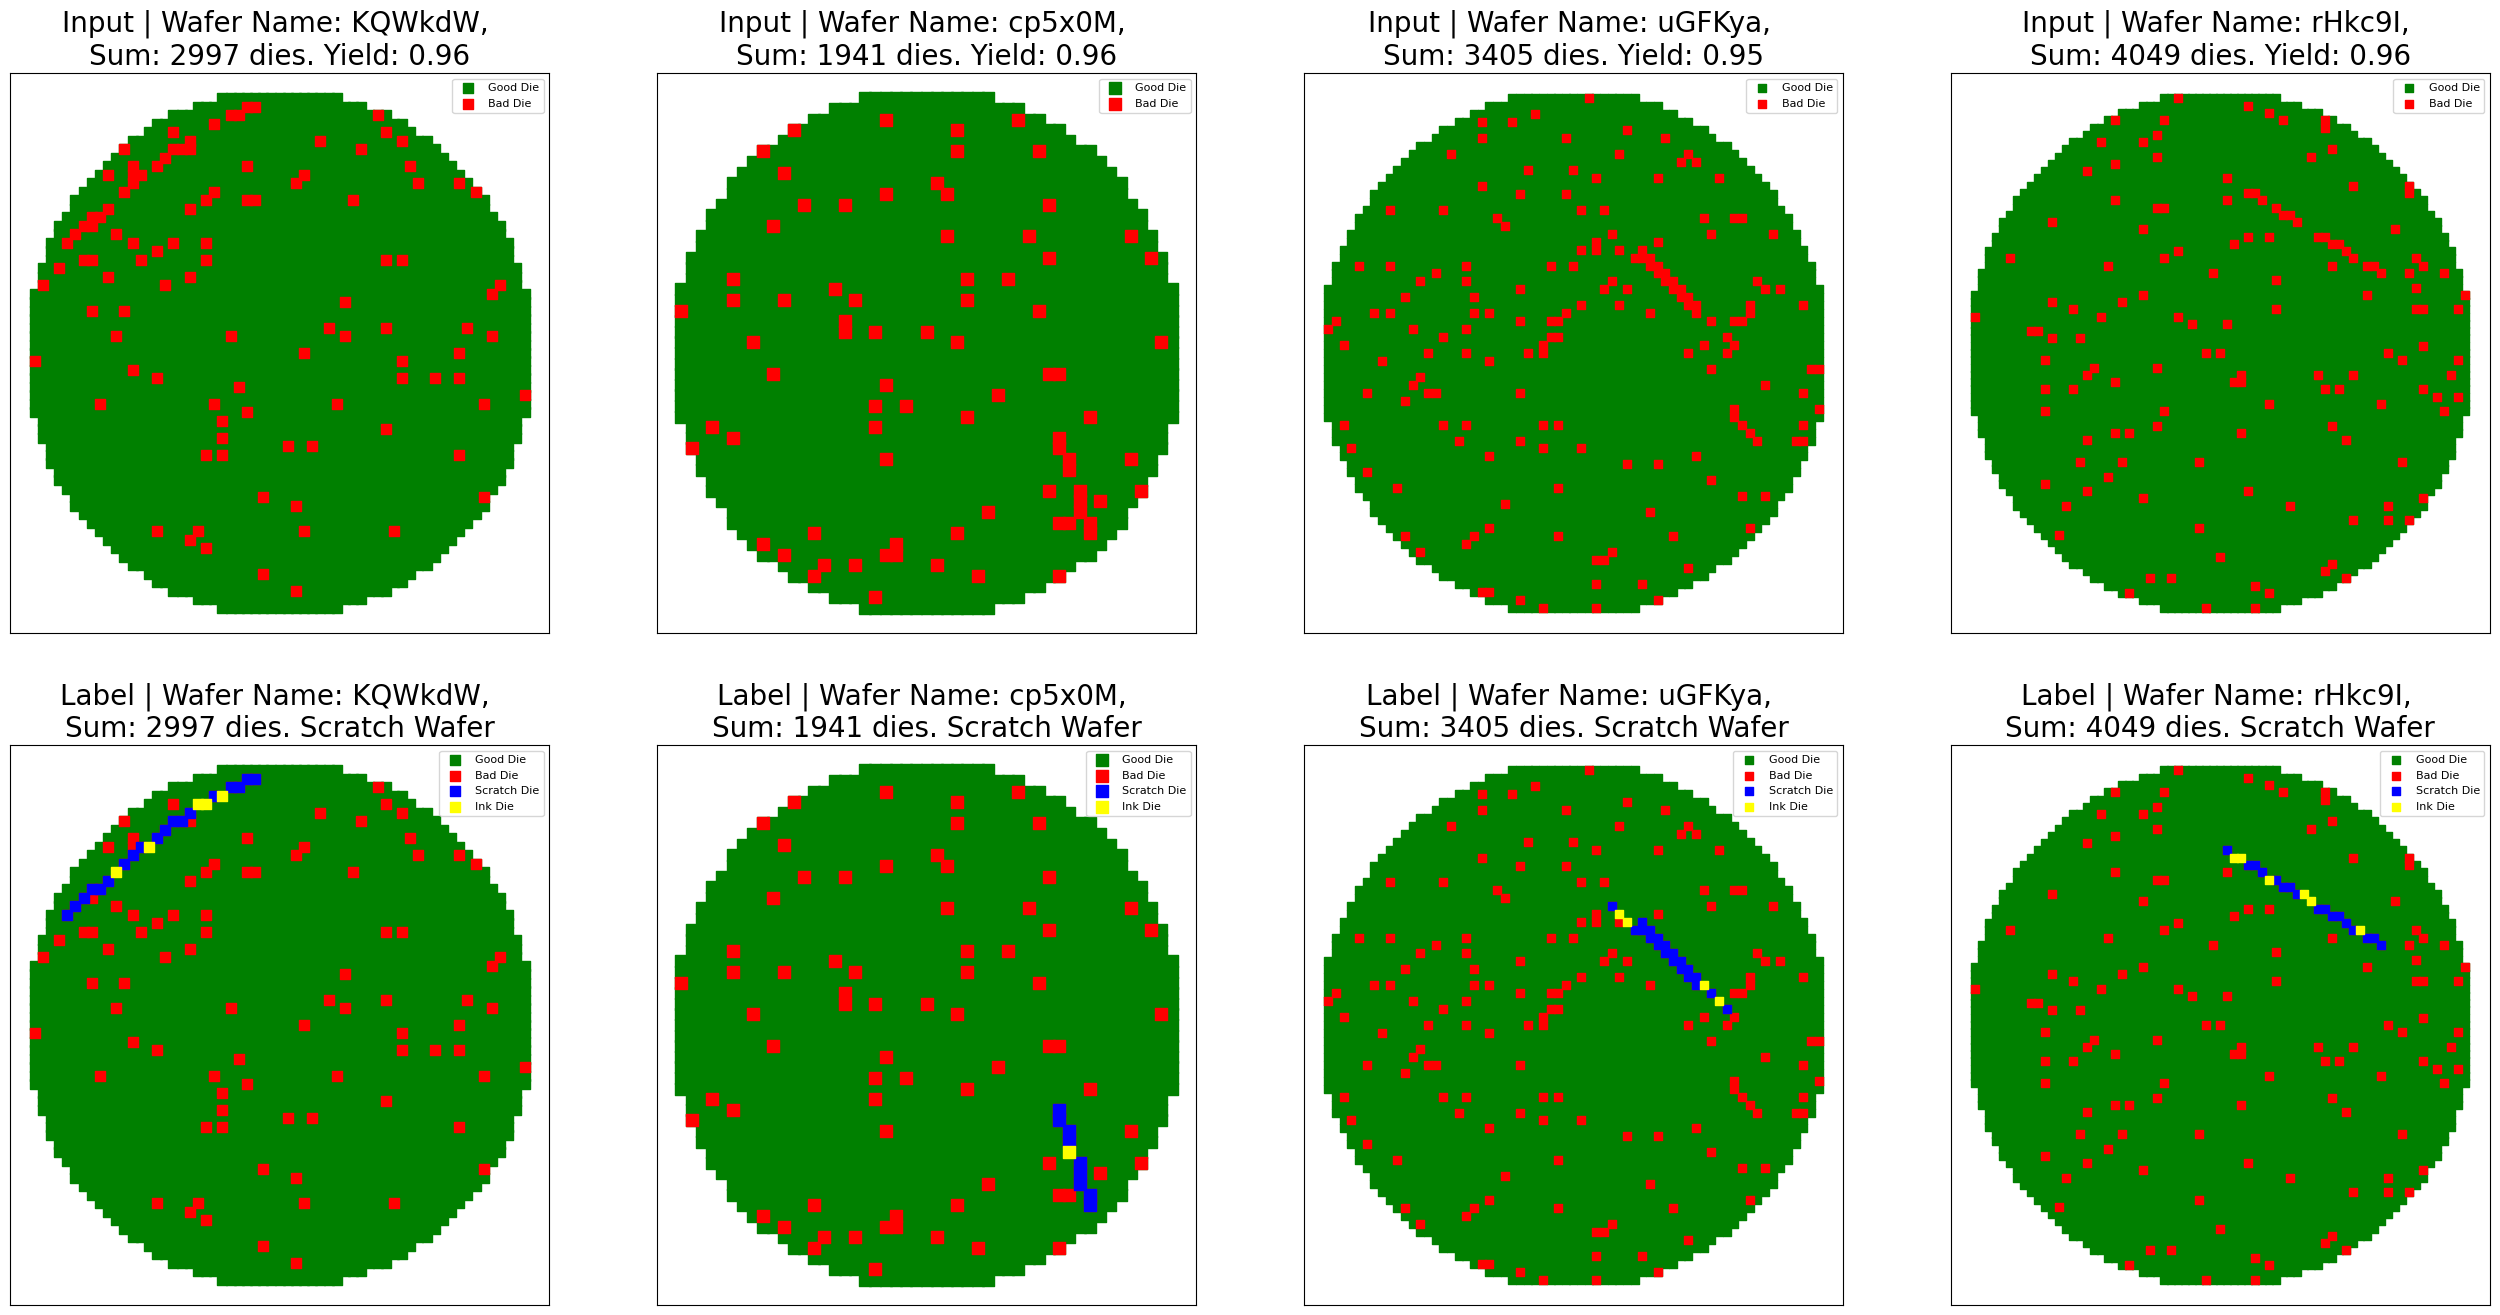

In [17]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

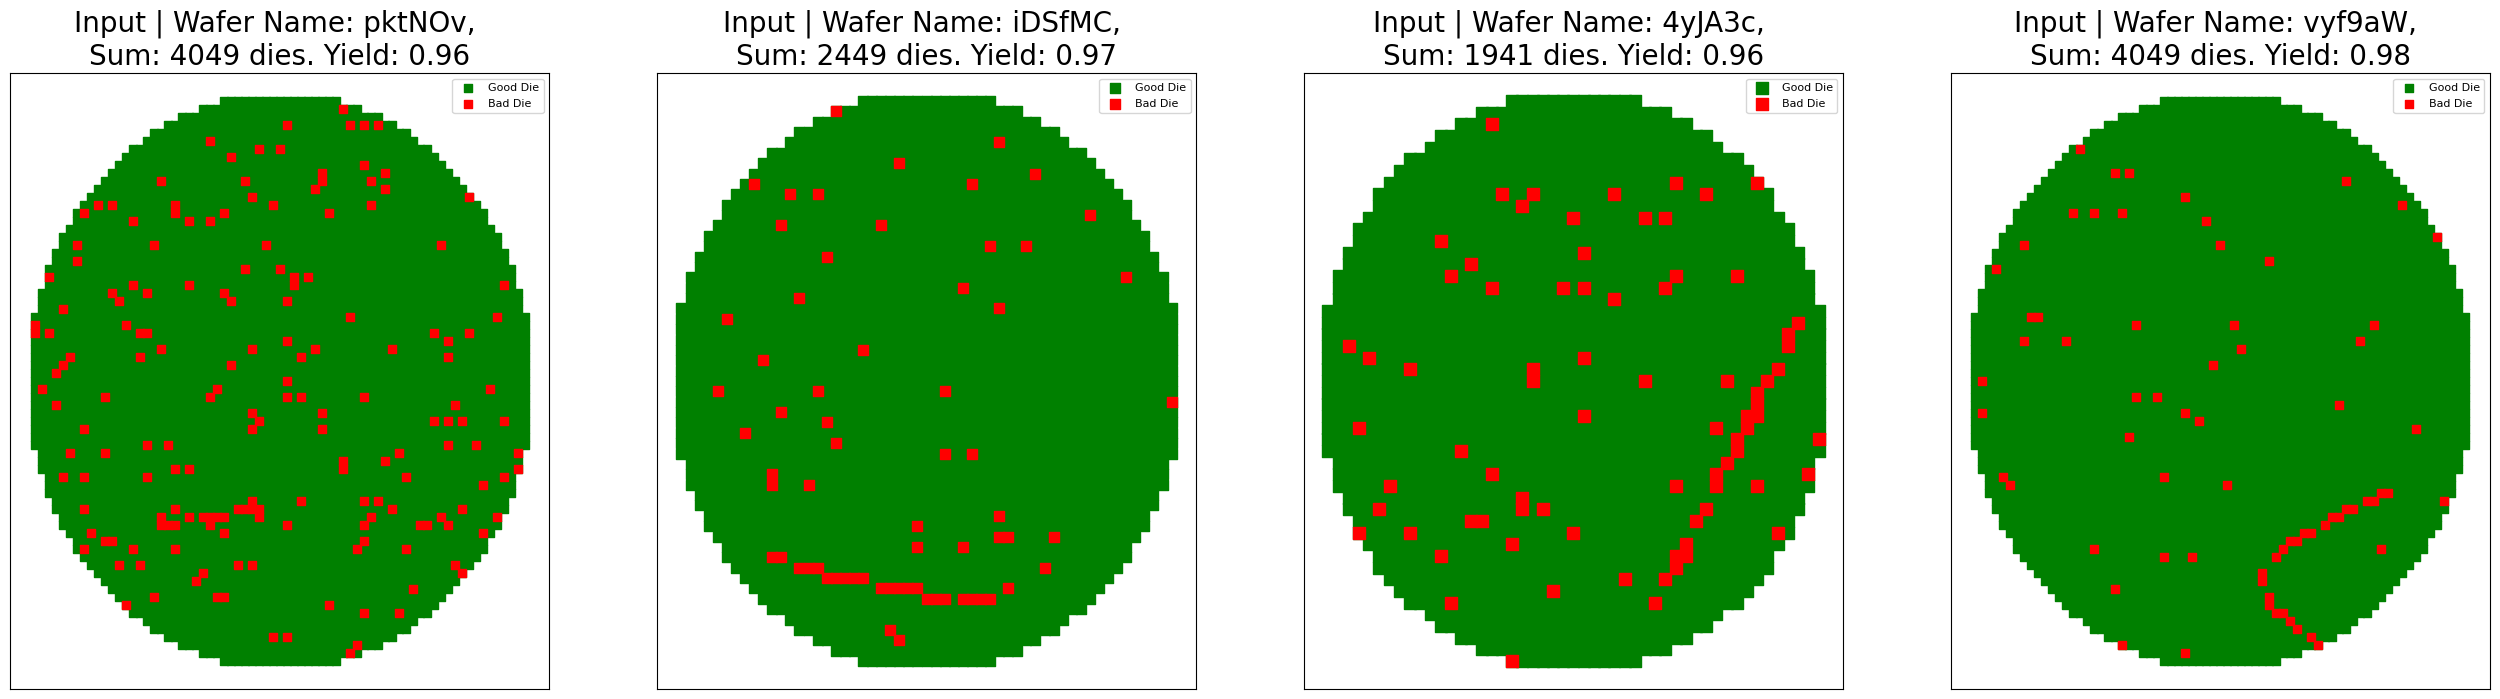

In [18]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

## EDA

The dataset consists of 4,655 wafers in total, with 4,200 wafers in the training set and 455 wafers in the test set.
Both sets have no missing values or duplicates. In the training set, there are 10,036,478 good dies (96.28%) and 378,922 bad dies (3.72%), while the test set contains 1,038,877 good dies (92.07%) and 89,458 bad dies (7.93%).
The training set also includes 4,073 wafers with scratch dies, with 80,319 dies (0.77%) classified as scratch dies. 
The yield rate (percentage of good dies) in the training set averages 96.28%, with values ranging from 90.02% to 98.91%. 
The median yield is 96.30%. The test set shows a slightly lower average yield of 91.97%, with a wider range from 28.71% to 99.07%, suggesting more variability in the test set. 
The distribution graphs confirm these observations, showing that in the first dataset, 96.24% are good dies (non-ink), 2.99% are regular bad dies, 0.65% are scratch dies, and 0.12% are ink dies, while the second dataset has 92.07% good dies and 7.93% bad dies.
1229 wafers have less than 3 scratch dies - wich might indicate that there is an error with the lables ot the definition of a scratch.
There is a tendency of scracthed dies to be in a paricular are of the the die - from the heat map, this might be a sign of a machine out of tune. 

# Actions

* Set therhold for low yield at 0.8 ~92.3% of the test wafer is above this critiria, and also from some reading it looks like 80 - 90 is the indusrty standrd - defends on the type of wafer.  (wafer with less then 0.8 yield will be predicted as false by the model, but will be used in the train data)

* Adressing the imblance of the problem - by trying to upsample the minority class. 

* Chousing metrics - from the business goals - we would like to keep a blance between the true positives and false positives recall, percision and f1 will be used, but also we will pay attention to to the disturt in them beacsue of the imbalnced data. 



In [19]:
# How many wafers are there in the train and test set?
print(f'Train set: {len(df_wafers["WaferName"].unique())} wafers')
print(f'Test set: {len(df_wafers_test["WaferName"].unique())} wafers')
# How many dies are there in the train and test set?
print(f'Total: {len(df_wafers["WaferName"].unique()) + len(df_wafers_test["WaferName"].unique())} wafers')

Train set: 4200 wafers
Test set: 455 wafers
Total: 4655 wafers


In [20]:
# Are there any missing values in the train and test set?
print(f'Train set: {df_wafers.isnull().sum().sum()} missing values')   
print(f'Test set: {df_wafers_test.isnull().sum().sum()} missing values')

Train set: 0 missing values
Test set: 0 missing values


In [34]:
# In how many unique wafers are the scratch dies located?
print(f'Train set: {df_wafers[df_wafers["IsScratchDie"] == True]["WaferName"].nunique()} wafers with scratch dies')


Train set: 4073 wafers with scratch dies


In [22]:
# Are there any duplicates in the train and test set?
print(f'Train set: {df_wafers.duplicated().sum()} duplicates')  
print(f'Test set: {df_wafers_test.duplicated().sum()} duplicates')
print("*"*35)
# How many good and bad dies are there in the train and test set?
print(f'Train set: {df_wafers["IsGoodDie"].value_counts()}')
print(f'Test set: {df_wafers_test["IsGoodDie"].value_counts()}')
print("*"*35)
# How many scratch and non-scratch dies are there in the train and test set?
print(f'Train set: {df_wafers["IsScratchDie"].value_counts()}')


Train set: 0 duplicates
Test set: 0 duplicates
***********************************
Train set: IsGoodDie
True     10036478
False      378922
Name: count, dtype: int64
Test set: IsGoodDie
True     1038877
False      89458
Name: count, dtype: int64
***********************************
Train set: IsScratchDie
False    10335081
True        80319
Name: count, dtype: int64


In [277]:
# what is the distribution of the amount of total dies in each wafer 
df_wafers.groupby('WaferName').size().value_counts()


1941    600
1005    600
2449    600
2997    600
4049    600
1513    600
3405    600
Name: count, dtype: int64

In [278]:
df_wafers_test.groupby('WaferName').size().value_counts()

3405    65
2997    65
4049    65
1005    65
2449    65
1513    65
1941    65
Name: count, dtype: int64

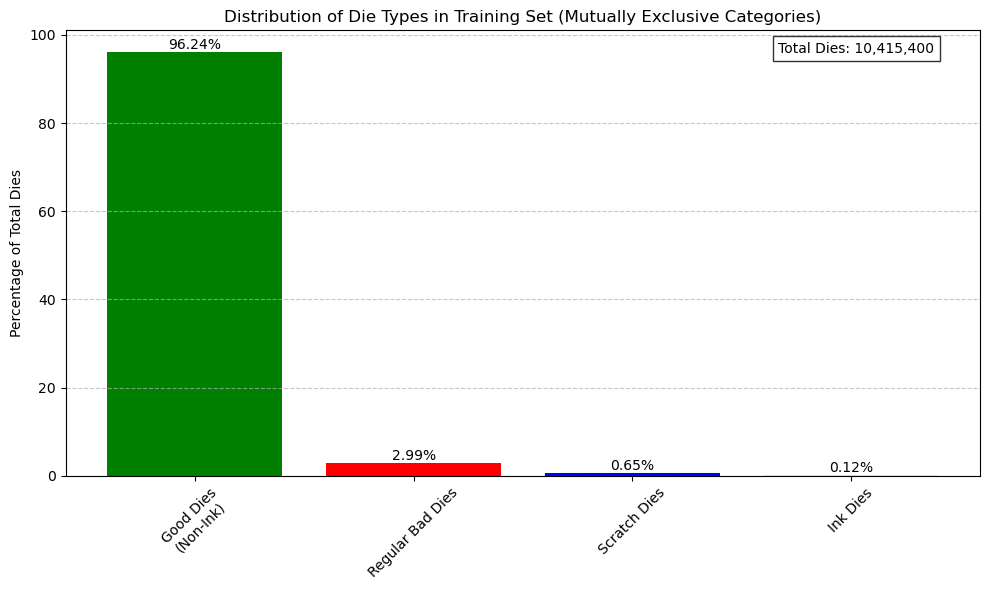

In [23]:
# Calculate all categories with corrected counting
total_dies = len(df_wafers)
good_dies_without_ink = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == False)).sum()
regular_bad_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == False)).sum()
scratch_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == True)).sum()
ink_dies = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == True)).sum()

# Create data for plotting
categories = ['Good Dies\n(Non-Ink)', 'Regular Bad Dies', 'Scratch Dies', 'Ink Dies']
values = [good_dies_without_ink, regular_bad_dies, scratch_dies, ink_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

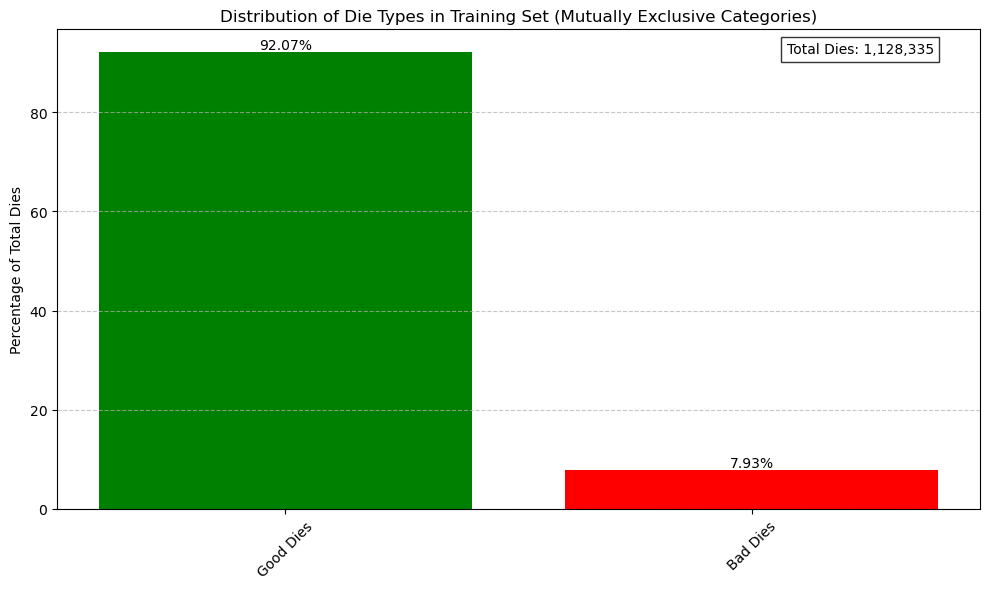

In [32]:
# Calculate all categories with corrected counting
total_dies = len(df_wafers_test)
good_dies_without_ink = ((df_wafers_test['IsGoodDie'] == True)).sum()
regular_bad_dies = ((df_wafers_test['IsGoodDie'] == False)).sum()


# Create data for plotting
categories = ['Good Dies', 'Bad Dies']
values = [good_dies_without_ink, regular_bad_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [24]:
# whats the avrege yield of the wafers?
df_wafers.groupby('WaferName')['IsGoodDie'].mean().describe()

count    4200.000000
mean        0.962850
std         0.011008
min         0.900198
25%         0.955084
50%         0.962963
75%         0.971166
max         0.989055
Name: IsGoodDie, dtype: float64

In [29]:
df_wafers_test.groupby('WaferName')['IsGoodDie'].mean().describe()


count    455.000000
mean       0.919741
std        0.122994
min        0.287056
25%        0.939255
50%        0.959984
75%        0.971664
max        0.990657
Name: IsGoodDie, dtype: float64

Text(0.5, 1.0, 'Distribution of Yield of Wafers')

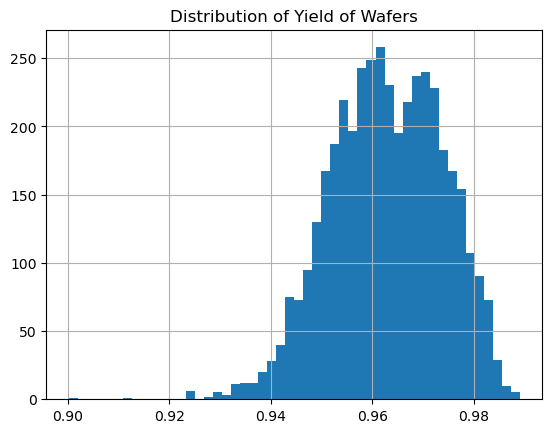

In [28]:
# lets see the distribution of the yield
df_wafers.groupby('WaferName')['IsGoodDie'].mean().hist(bins=50)
plt.title('Distribution of Yield of Wafers')

Train set: 4200 wafers with yield > 0.8
Test set: 420 wafers with yield > 0.8


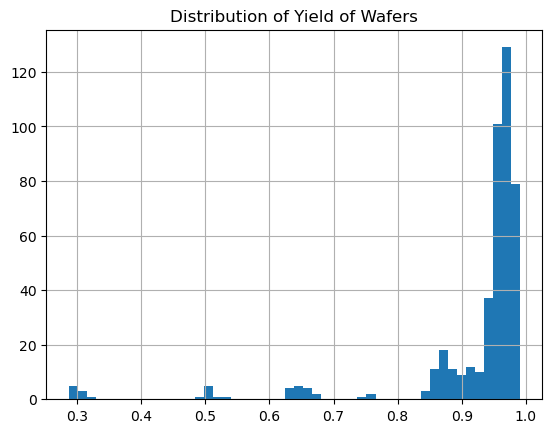

In [194]:
# lets see the distribution of the yield
df_wafers_test.groupby('WaferName')['IsGoodDie'].mean().hist(bins=50)
plt.title('Distribution of Yield of Wafers')
# how many wafers have yield > 0.8
print(f'Train set: {df_wafers[df_wafers.groupby("WaferName")["IsGoodDie"].transform("mean") > 0.8]["WaferName"].nunique()} wafers with yield > 0.8')
print(f'Test set: {df_wafers_test[df_wafers_test.groupby("WaferName")["IsGoodDie"].transform("mean") > 0.8]["WaferName"].nunique()} wafers with yield > 0.8')


Looks like the the two dist are very differnt - and the thershold for low yeild can be placed somewhere around the 0.8 mark.

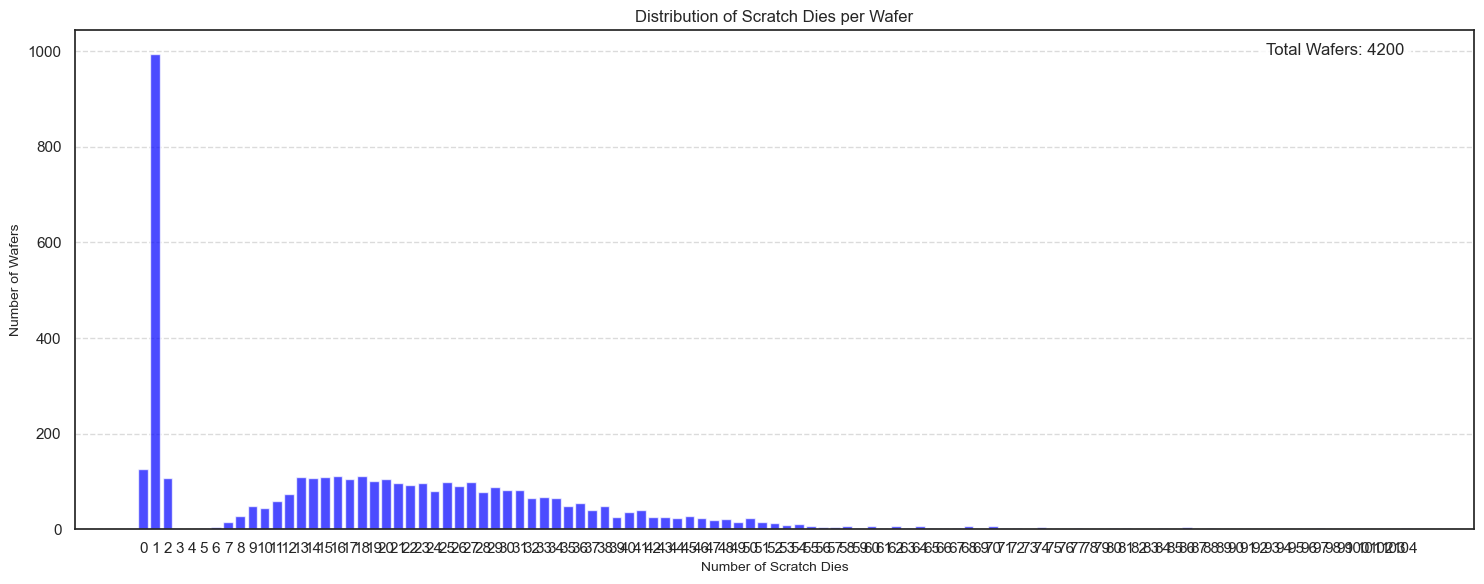


Scratch dies per wafer statistics:
count    4200.000000
mean       19.123571
std        16.216114
min         0.000000
25%         1.000000
50%        18.000000
75%        29.000000
max       104.000000
Name: IsScratchDie, dtype: float64


In [193]:
# Count scratch dies per wafer
scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum()

# Create the histogram
plt.figure(figsize=(15, 6))
plt.hist(scratch_counts, bins=range(int(scratch_counts.max()) + 2), 
         align='left', rwidth=0.8, color='blue', alpha=0.7)

# Customize the plot
plt.title('Distribution of Scratch Dies per Wafer', fontsize=12)
plt.xlabel('Number of Scratch Dies', fontsize=10)
plt.ylabel('Number of Wafers', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks to show every integer
plt.xticks(range(0, int(scratch_counts.max()) + 1))

# Add text showing total number of wafers
plt.text(0.95, 0.95, f'Total Wafers: {len(scratch_counts)}',
         transform=plt.gca().transAxes,
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print some statistics
print("\nScratch dies per wafer statistics:")
print(scratch_counts.describe())

(array([127., 994., 108.,   0.,   0.,   2.,   5.,  15.,  76.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

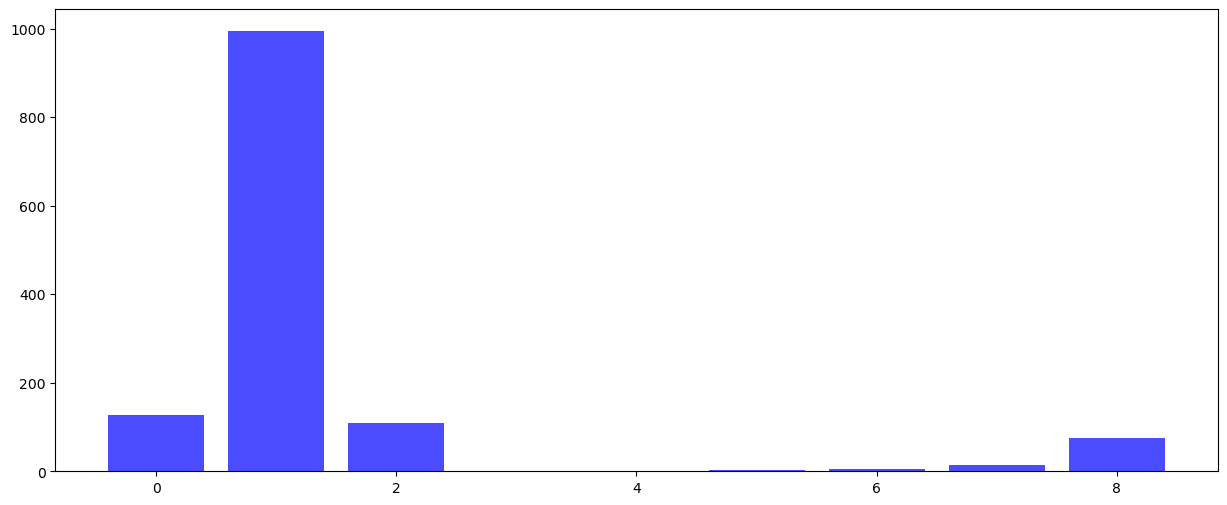

In [53]:
# calcute for each wafer how many dies are scrathced 

scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum()
scratch_counts = scratch_counts.reset_index()

# sort the values
scratch_counts = scratch_counts.sort_values(by='IsScratchDie', ascending=True)
scratch_counts

# lets plot just lowest values in the scratch counts
plt.figure(figsize=(15, 6))
plt.hist(scratch_counts['IsScratchDie'], bins=range(10), 
         align='left', rwidth=0.8, color='blue', alpha=0.7)


In [195]:
# how many wafers have less than 3 scratch dies
print(f'Train set: {scratch_counts[scratch_counts["IsScratchDie"] < 3]["WaferName"].nunique()} wafers with less than 3 scratch dies')

Train set: 1229 wafers with less than 3 scratch dies


over 1229  wafers have what is suspect to be a problem with either the data itself or the definition of what is a scracth.

this is highlty implanced problem ltaer when its time to chouse metrics  this should be taken into considartion

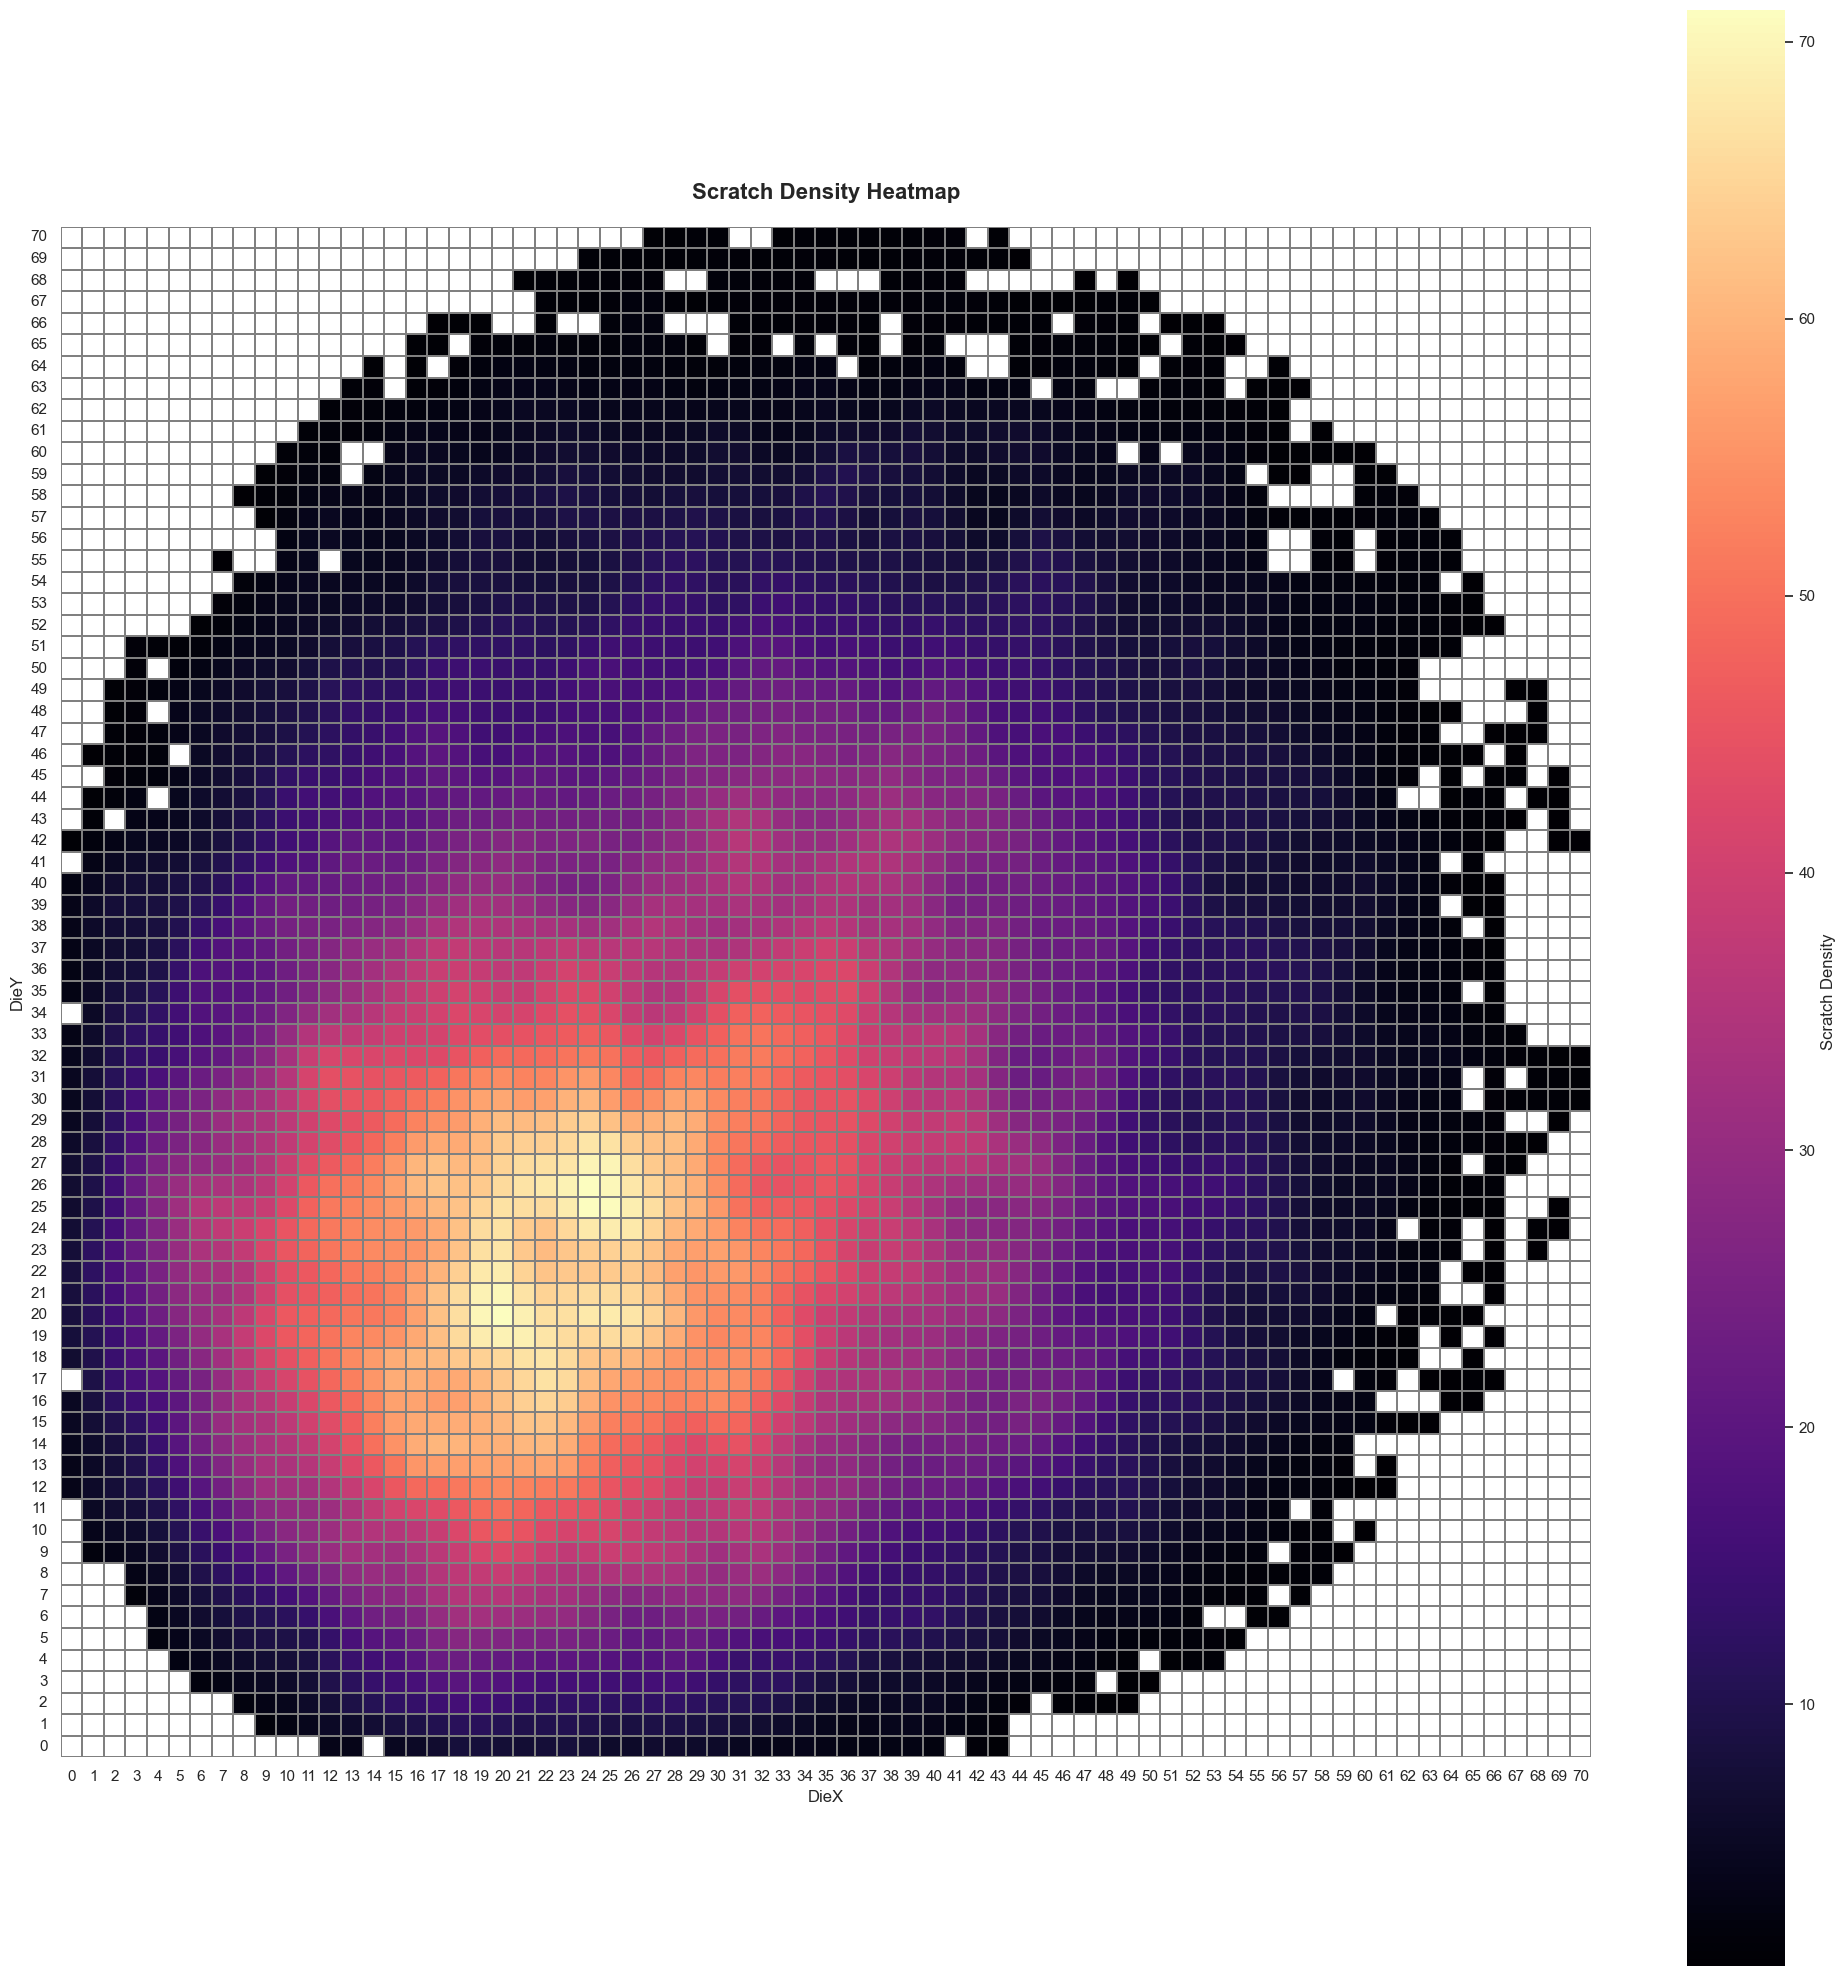

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

# Count scratches
scratch_counts = df_wafers[df_wafers['IsScratchDie']].groupby(['DieX', 'DieY']).size().reset_index(name='ScratchCount')
heatmap_data = scratch_counts.pivot(index='DieY', columns='DieX', values='ScratchCount').fillna(0)

# Smooth the data
blurred_data = gaussian_filter(heatmap_data, sigma=1)

# Mask zeros (will appear white)
mask = heatmap_data == 0

# Create a custom colormap that starts with white
original_cmap = sns.color_palette("magma", as_cmap=True)
colors = original_cmap(np.linspace(0, 1, 256))
colors[0] = np.array([1, 1, 1, 1])  # White for zero
custom_cmap = ListedColormap(colors)

# Plot
plt.figure(figsize=(20,20))
sns.set(style="white")

sns.heatmap(
    blurred_data,
    cmap=custom_cmap,
    mask=mask,
    linewidths=0.2,
    linecolor='gray',
    square=True,
    cbar_kws={'label': 'Scratch Density'},
    xticklabels=True,
    yticklabels=True
)

plt.title('Scratch Density Heatmap', fontsize=16, weight='bold', pad=20)
plt.xlabel('DieX', fontsize=12)
plt.ylabel('DieY', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


it looks like there is a higher consentration of scratches in a particular area of the wafer - this will be the base for our first model. 

# Optional - droping the wafers with no scratches and with one or two scratched dies 

In [58]:
# Optional - droping the wafers with no scratches and with one or two scratched dies 
df_wafers = df_wafers[df_wafers['WaferName'].isin(scratch_counts[scratch_counts['IsScratchDie'] > 2]['WaferName'])].reset_index(drop=True)
df_wafers


WaferName  DieX  DieY  IsGoodDie  IsScratchDie
0          8PFrAN     0    27       True         False
1          8PFrAN     0    28       True         False
2          8PFrAN     0    29       True         False
3          8PFrAN     0    30       True         False
4          8PFrAN     0    31       True         False
...           ...   ...   ...        ...           ...
7368894    CofPVD    64    36       True         False
7368895    CofPVD    64    37       True         False
7368896    CofPVD    64    38       True         False
7368897    CofPVD    64    39       True         False
7368898    CofPVD    64    40       True         False

[7368899 rows x 5 columns]

## First approach - XGBoost with minority class upsampling.


In [59]:
# upsampling the minority class
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# cretae holdout set and train set so that the upsampled model canm be tesetd on the holdout set
df_wafers_to_up, df_holdout = train_test_split(df_wafers, test_size=0.2, random_state=42)

# Check the distribution of the target variable in the training set
print(df_wafers_to_up['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))

# Separate majority and minority classes
majority = df_wafers_to_up[df_wafers_to_up.IsScratchDie == False]
minority = df_wafers_to_up[df_wafers_to_up.IsScratchDie == True]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority, minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# Split the data into features and target variable
X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
y = df_upsampled['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



IsScratchDie
False    0.989258
True     0.010742
Name: proportion, dtype: float64
IsScratchDie
False    0.989291
True     0.010709
Name: proportion, dtype: float64


In [60]:
X_train

DieX  DieY  IsGoodDie
6924211    27     6       True
2049684    37    51       True
5257205    13    34      False
4199076    34    16      False
5283816    41    26      False
...       ...   ...        ...
4300624     9    28       True
5877072    39    56       True
5540893    40    12       True
6846644    47    27       True
4882178    48    25       True

[9330867 rows x 3 columns]

In [61]:
# how many true and flase are there in y
print(f'True: {y_train.sum()}')
print(f'False: {len(y_train) - y_train.sum()}')

True: 4665955
False: 4664912


In [ ]:
# lets use an xgboost classifier to predict the scratch dies
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9057253837477928
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.86      0.97      0.91   1166880
        True       0.97      0.84      0.90   1165837

    accuracy                           0.91   2332717
   macro avg       0.91      0.91      0.91   2332717
weighted avg       0.91      0.91      0.91   2332717

Confusion Matrix upsampled data:
 [[1132385   34495]
 [ 185421  980416]]
Accuracy on holdout set : 0.9691521122555605
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98   1457998
        True       0.24      0.84      0.37     15782

    accuracy                           0.97   1473780
   macro avg       0.62      0.90      0.68   1473780
weighted avg       0.99      0.97      0.98   1473780

Confusion Matrix holdout set:
 [[1415095   42903]
 [   2560   13222]]


overall - this method performs quite well, but the price here of mislabling good dies as scratced is very big  - (0.18 precision) to get a better understanding on what is the cost of each label would help but for the assuamptions that it is cheaper or less profitable to not get a scrathec die then to lose a good one this metric has poor performence

In [103]:
def count_adjacent_scratches(df):
    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()
    
    # Initialize the new column with zeros
    result_df['AdjacentScratchCount'] = 0
    
    # Group by wafer name as we need to process each wafer separately
    for wafer_name, wafer_df in df.groupby('WaferName'):
        print(f"Processing wafer: {wafer_name}")

        # Create a mapping from (DieX, DieY) to row index for quick lookups
        position_to_idx = {(row.DieX, row.DieY): idx for idx, row in wafer_df.iterrows()}
        
        # Iterate through each die in the wafer
        for idx, row in wafer_df.iterrows():
            x, y = row.DieX, row.DieY
            
            # Define the 8 adjacent positions
            adjacent_positions = [
                (x-1, y-1), (x-1, y), (x-1, y+1),
                (x, y-1),             (x, y+1),
                (x+1, y-1), (x+1, y), (x+1, y+1)
            ]
            
            # Count adjacent scratched dies
            scratch_count = 0
            for adj_x, adj_y in adjacent_positions:
                adj_idx = position_to_idx.get((adj_x, adj_y))
                if adj_idx is not None and wafer_df.loc[adj_idx, 'IsScratchDie']:
                    scratch_count += 1
            
            # Update the result dataframe
            result_df.loc[idx, 'AdjacentScratchCount'] = scratch_count
    
    return result_df

# Example usage:
df_wafers_to_up_adj = count_adjacent_scratches(df_wafers_to_up)
df_holdout_adj = count_adjacent_scratches(df_holdout)

Processing wafer: 00Q792
Processing wafer: 01hHtd
Processing wafer: 04XRmn
Processing wafer: 04kats
Processing wafer: 05OItq
Processing wafer: 05OOTD
Processing wafer: 062tv2
Processing wafer: 06s0Nk
Processing wafer: 07bYYB
Processing wafer: 07jCOP
Processing wafer: 0CUjW7
Processing wafer: 0Fbgb0
Processing wafer: 0FqZXx
Processing wafer: 0GBQq4
Processing wafer: 0HiO2r
Processing wafer: 0JqNsU
Processing wafer: 0KW3Y7
Processing wafer: 0MlIpA
Processing wafer: 0OtGpm
Processing wafer: 0PzJB1
Processing wafer: 0Q5ePO
Processing wafer: 0QcTwn
Processing wafer: 0TdiMn
Processing wafer: 0UCmuk
Processing wafer: 0c9XYt
Processing wafer: 0f3QIq
Processing wafer: 0fXrBV
Processing wafer: 0ifUHb
Processing wafer: 0jx2ns
Processing wafer: 0lsAYQ
Processing wafer: 0o5tNu
Processing wafer: 0o7ZNl
Processing wafer: 0q7T2o
Processing wafer: 0qgyWo
Processing wafer: 0rIHNr
Processing wafer: 0u8y1g
Processing wafer: 0ukhdo
Processing wafer: 0v3ePD
Processing wafer: 0wKP2f
Processing wafer: 0wsJGL


<Axes: xlabel='AdjacentScratchCount'>

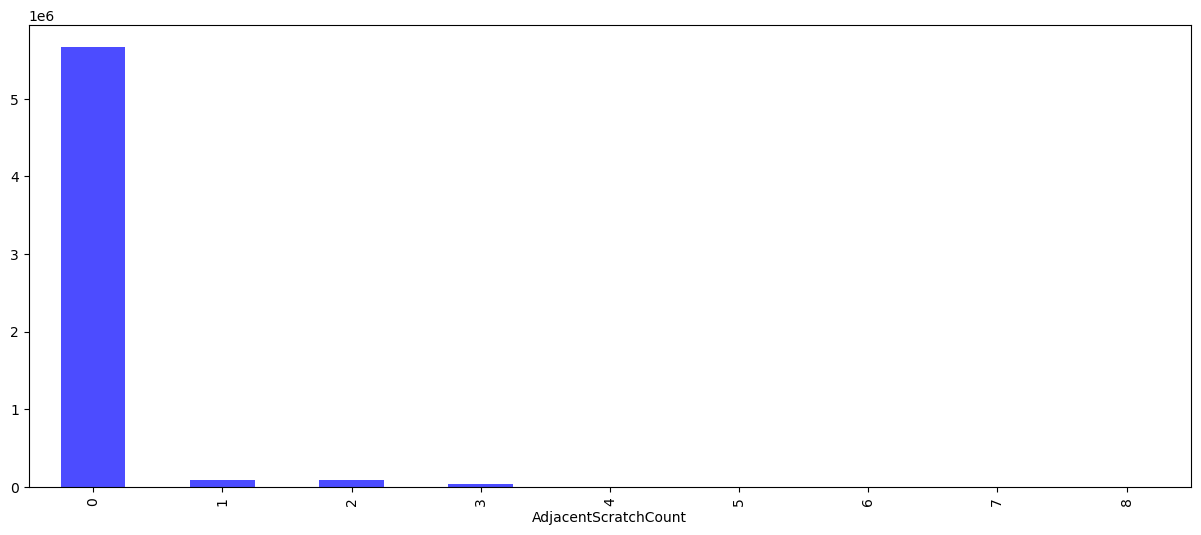

In [104]:
df_wafers_to_up_adj.AdjacentScratchCount.value_counts(normalize=False).sort_index().plot(kind='bar', figsize=(15, 6), color='blue', alpha=0.7)

<Axes: xlabel='AdjacentScratchCount'>

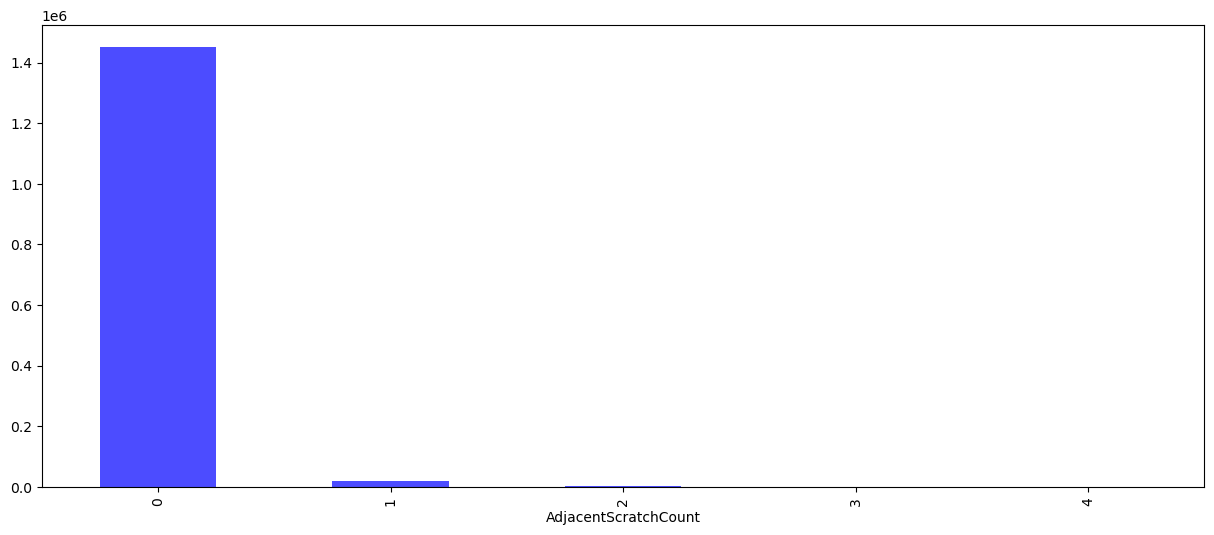

In [105]:
df_holdout_adj.AdjacentScratchCount.value_counts(normalize=False).sort_index().plot(kind='bar', figsize=(15, 6), color='blue', alpha=0.7)

In [169]:

# # Check the distribution of the target variable in the training set
# print(df_wafers_to_up_adj['IsScratchDie'].value_counts(normalize=True))
# print(df_holdout_adj['IsScratchDie'].value_counts(normalize=True))

# # Separate majority and minority classes
# majority = df_wafers_to_up_adj[df_wafers_to_up_adj.IsScratchDie == False]
# minority = df_wafers_to_up_adj[df_wafers_to_up_adj.IsScratchDie == True]

# # Upsample minority class
# minority_upsampled = resample(minority, 
#                               replace=True,     # sample with replacement
#                               n_samples=int(len(majority)*0.25),    # to match majority class
#                               random_state=42) # reproducible results

# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([majority, minority_upsampled])
# df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# #Split the data into features and target variable
# X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
# y = df_upsampled['IsScratchDie']


X = df_wafers_to_up_adj.drop(columns=['IsScratchDie','WaferName'])
y = df_wafers_to_up_adj['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=42)


In [170]:
# Train the model
from sklearn.metrics import average_precision_score
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='aucpr', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))
print("AUC precision :\n", average_precision_score(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))
print("AUC precision :\n", average_precision_score(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9969963857111193
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   1749538
        True       0.91      0.80      0.85     18998

    accuracy                           1.00   1768536
   macro avg       0.96      0.90      0.92   1768536
weighted avg       1.00      1.00      1.00   1768536

Confusion Matrix upsampled data:
 [[1748085    1453]
 [   3859   15139]]
AUC precision :
 0.7292713342289252
Accuracy on holdout set : 0.9923468903092727
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   1457998
        True       0.91      0.32      0.47     15782

    accuracy                           0.99   1473780
   macro avg       0.95      0.66      0.73   1473780
weighted avg       0.99      0.99      0.99   1473780

Confusion Matrix holdout set:
 [[1457514     484]
 [  10795 

<Figure size 1000x800 with 0 Axes>

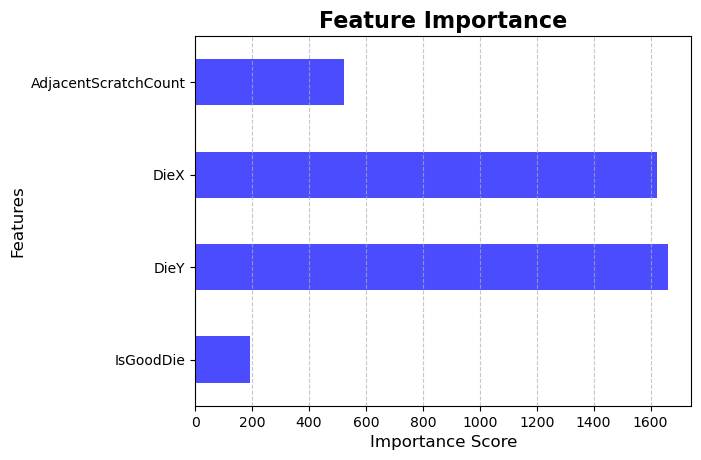

In [131]:
# shoew the feature importance
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance from the model
importance = clf.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

importance_df = importance_df.set_index('Feature')
importance_df = importance_df.sort_index(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance_df.plot(kind='barh', legend=False, color='blue', alpha=0.7)
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [155]:
import xgboost as xgb
import optuna
from sklearn.metrics import recall_score

import numpy as np

def objective(trial, X, y):

    # Suggest hyperparameters
    depth = trial.suggest_int('max_depth', 3, 50)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 10)

    # Build model
    clf = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='aucpr',
        random_state=42,
        n_estimators=n_estimators,
        max_depth=depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        scale_pos_weight=scale_pos_weight,
        verbosity=0
    )

    # Train and evaluate
    clf.fit(X_train, y_train,  eval_set=[(X_test, y_test)], verbose=False)
    y_pred = clf.predict(X_holdout)
    avs = average_precision_score(y_holdout, y_pred, average='weighted')  # or 'macro'/'weighted' if multiclass

    return avs

# Usage example:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X, y), n_trials=50 )


[I 2025-04-23 20:09:30,311] A new study created in memory with name: no-name-d690c12a-c927-4d69-8b10-72764dbd08ef
[I 2025-04-23 20:09:46,705] Trial 0 finished with value: 0.25692249342597334 and parameters: {'max_depth': 11, 'n_estimators': 66, 'learning_rate': 0.2807311073749952, 'subsample': 0.6476631024589552, 'colsample_bytree': 0.8646739619486371, 'gamma': 3.0385262138176667, 'min_child_weight': 7, 'scale_pos_weight': 8.408832615260206}. Best is trial 0 with value: 0.25692249342597334.
[I 2025-04-23 20:10:06,556] Trial 1 finished with value: 0.2953197597741711 and parameters: {'max_depth': 18, 'n_estimators': 94, 'learning_rate': 0.1722194948373631, 'subsample': 0.8917572731879341, 'colsample_bytree': 0.631694516743915, 'gamma': 3.205990194324502, 'min_child_weight': 2, 'scale_pos_weight': 3.4848990263842543}. Best is trial 1 with value: 0.2953197597741711.
[I 2025-04-23 20:10:55,741] Trial 2 finished with value: 0.2760571299851054 and parameters: {'max_depth': 47, 'n_estimators':

In [171]:
# Train the model

from sklearn.metrics import average_precision_score
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='aucpr', random_state=42, max_depth= 22, n_estimators= 200, learning_rate= 0.030021534535775045, subsample= 0.5926057124500902,  colsample_bytree=0.7603905908088893,gamma = 4.299014978801172, min_child_weight= 8, scale_pos_weight= 2.9003149834801936)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))
print("AUC precision :\n", average_precision_score(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))
print("AUC precision :\n", average_precision_score(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:41:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.996997516589993
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   1749538
        True       0.91      0.80      0.85     18998

    accuracy                           1.00   1768536
   macro avg       0.95      0.90      0.92   1768536
weighted avg       1.00      1.00      1.00   1768536

Confusion Matrix upsampled data:
 [[1748067    1471]
 [   3839   15159]]
AUC precision :
 0.7295165856037883
Accuracy on holdout set : 0.9923462117819485
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   1457998
        True       0.91      0.32      0.47     15782

    accuracy                           0.99   1473780
   macro avg       0.95      0.66      0.73   1473780
weighted avg       0.99      0.99      0.99   1473780

Confusion Matrix holdout set:
 [[1457512     486]
 [  10794  

## Secound approch - connected components in graphs 

In [165]:
import networkx as nx
from collections import defaultdict
import numpy as np

def create_wafer_graph(wafer_df):
    """
    Convert wafer data into a graph where nodes are dies and edges connect adjacent dies
    Only bad dies are included as nodes to find connected components of defects
    """
    # Create graph
    G = nx.Graph()
    
    # Get bad dies coordinates
    bad_dies = wafer_df[wafer_df['IsGoodDie'] == False][['DieX', 'DieY']].values
    
    # Add nodes for bad dies
    for x, y in bad_dies:
        G.add_node((x, y))
    
    # Add edges between adjacent bad dies (including diagonals)
    for i, (x1, y1) in enumerate(bad_dies):
        for x2, y2 in bad_dies[i+1:]:
            if abs(x1-x2) <= 1 and abs(y1-y2) <= 1:  # Adjacent dies
                G.add_edge((x1, y1), (x2, y2))
                
    return G

def find_scratch_candidates(G, min_size=3, min_aspect_ratio=2):
    """
    Find connected components that could be scratches based on size and shape
    """
    components = list(nx.connected_components(G))
    scratch_candidates = []
    
    for component in components:
        if len(component) >= min_size:
            scratch_candidates.append(set(component))
                
    return scratch_candidates

def evaluate_scratch_detection(wafer_df, scratch_candidates):
    """
    Compare detected scratch candidates with actual scratch dies
    """
    # Get actual scratch dies
    actual_scratch_coords = set(map(tuple, 
        wafer_df[wafer_df['IsScratchDie'] == True][['DieX', 'DieY']].values))
    
    # Combine all detected scratch candidates
    detected_scratch_coords = set().union(*scratch_candidates) if scratch_candidates else set()
    
    # Calculate metrics
    true_positives = len(actual_scratch_coords & detected_scratch_coords)
    false_positives = len(detected_scratch_coords - actual_scratch_coords)
    false_negatives = len(actual_scratch_coords - detected_scratch_coords)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

def analyze_all_wafers(df_wafers):
    """
    Analyze all wafers and aggregate results
    """
    total_metrics = defaultdict(float)
    wafer_results = {}
    
    for wafer_name in df_wafers['WaferName'].unique():
        wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name]
        
        # Skip wafers with very low yield as mentioned in requirements
        yield_rate = wafer_df['IsGoodDie'].mean()
        if yield_rate < 0.7:  # Threshold can be adjusted
            continue
        
        # print progress bar and how many wafers was processed
        processed_wafers = len(wafer_results) + 1
        print(f'Analyzing wafer: {wafer_name} | Yield Rate: {yield_rate:.2f}')
        print(f'Processed {processed_wafers}/{len(df_wafers["WaferName"].unique())} wafers')
        
            
        # Create graph and find scratch candidates
        G = create_wafer_graph(wafer_df)
        scratch_candidates = find_scratch_candidates(G)
        
        # Evaluate results for this wafer
        metrics = evaluate_scratch_detection(wafer_df, scratch_candidates)
        wafer_results[wafer_name] = metrics
        
        # Aggregate metrics
        for k, v in metrics.items():
            total_metrics[k] += v
            
    # Calculate average metrics
    n_wafers = len(wafer_results)
    avg_metrics = {k: v/n_wafers for k, v in total_metrics.items()}
    
    return avg_metrics, wafer_results

# Example usage
avg_metrics, wafer_results = analyze_all_wafers(df_wafers)
print("Average metrics across all wafers:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.3f}")

Analyzing wafer: 8PFrAN | Yield Rate: 0.95
Processed 1/4200 wafers
Analyzing wafer: X35KWx | Yield Rate: 0.97
Processed 2/4200 wafers
Analyzing wafer: hpKllm | Yield Rate: 0.97
Processed 3/4200 wafers
Analyzing wafer: gwjgvf | Yield Rate: 0.98
Processed 4/4200 wafers
Analyzing wafer: EAmFHC | Yield Rate: 0.97
Processed 5/4200 wafers
Analyzing wafer: xHMg06 | Yield Rate: 0.96
Processed 6/4200 wafers
Analyzing wafer: U6YFFh | Yield Rate: 0.97
Processed 7/4200 wafers
Analyzing wafer: ih2CbI | Yield Rate: 0.97
Processed 8/4200 wafers
Analyzing wafer: GHlqOp | Yield Rate: 0.96
Processed 9/4200 wafers
Analyzing wafer: oF6oN1 | Yield Rate: 0.96
Processed 10/4200 wafers
Analyzing wafer: dXjYqm | Yield Rate: 0.96
Processed 11/4200 wafers
Analyzing wafer: vuYAxE | Yield Rate: 0.95
Processed 12/4200 wafers
Analyzing wafer: JXy6ur | Yield Rate: 0.97
Processed 13/4200 wafers
Analyzing wafer: oJJWk4 | Yield Rate: 0.96
Processed 14/4200 wafers
Analyzing wafer: 27jJvL | Yield Rate: 0.97
Processed 15/4

In [166]:
wafer_results

{'8PFrAN': {'precision': 0.6521739130434783,
  'recall': 0.7692307692307693,
  'f1': 0.7058823529411764,
  'true_positives': 30,
  'false_positives': 16,
  'false_negatives': 9},
 'X35KWx': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 7,
  'false_negatives': 1},
 'hpKllm': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 8,
  'false_negatives': 1},
 'gwjgvf': {'precision': 0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 0,
  'false_negatives': 1},
 'EAmFHC': {'precision': 0.9,
  'recall': 0.8181818181818182,
  'f1': 0.8571428571428572,
  'true_positives': 18,
  'false_positives': 2,
  'false_negatives': 4},
 'xHMg06': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 6,
  'false_negatives': 1},
 'U6YFFh': {'precision': 0.0,
  'recall': 0.0,
  'f1': 0,
  'true_positives': 0,
  'false_positives': 3,
  'false_negatives': 1},
 'ih2CbI':

In [167]:
# convert the results to a dataframe
wafer_results_df = pd.DataFrame(wafer_results).T.reset_index()

In [168]:
wafer_results_df.sort_values(by='true_positives', ascending=False, inplace=True)
wafer_results_df

index  precision    recall        f1  true_positives  false_positives  \
210   sNyWi7   0.900000  0.927835  0.913706            90.0             10.0   
1743  5PdCzd   0.825688  0.937500  0.878049            90.0             19.0   
3034  CDa57R   0.904255  0.913978  0.909091            85.0              9.0   
150   SlGk2E   0.988235  0.865979  0.923077            84.0              1.0   
2056  eqLGHG   0.943182  0.805825  0.869110            83.0              5.0   
...      ...        ...       ...       ...             ...              ...   
373   pPI7bj   0.000000  0.000000  0.000000             0.0             16.0   
2887  rD04wG   0.000000  0.000000  0.000000             0.0              0.0   
2883  2H5kL7   0.000000  0.000000  0.000000             0.0              0.0   
376   bqDUY2   0.000000  0.000000  0.000000             0.0              0.0   
944   sW6Vzo   0.000000  0.000000  0.000000             0.0              7.0   

      false_negatives  
210               7.0  
1743              6.0  
3034              8.0  
150              13.0  
2056             20.0  
...               ...  
373               1.0  
2887              1.0  
2883              1.0  
376               1.0  
944               1.0  

[4200 rows x 7 columns]

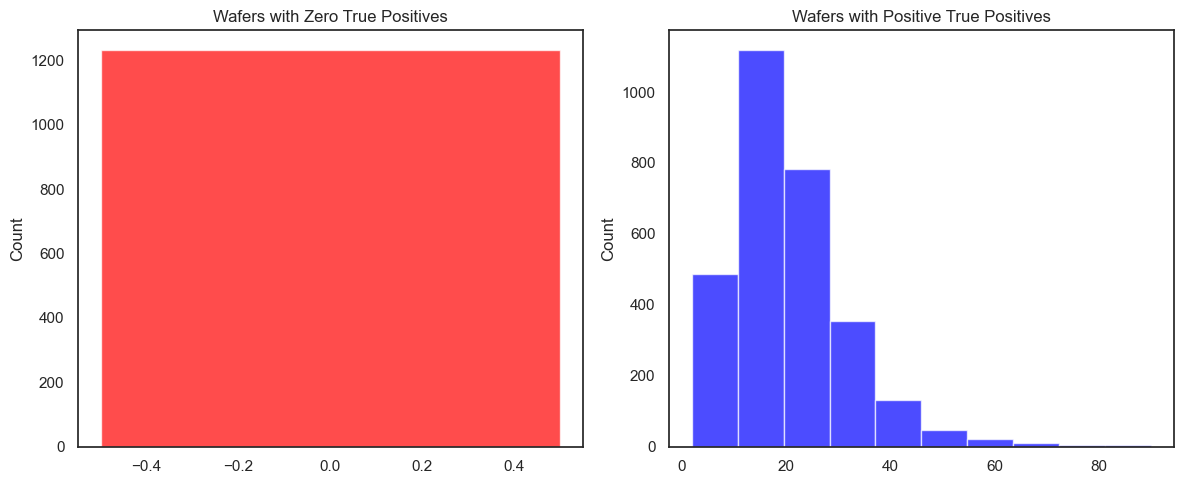

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot zeros
zeros = wafer_results_df[wafer_results_df['true_positives'] == 0]['true_positives']
ax1.hist(zeros, bins=1, color='red', alpha=0.7)
ax1.set_title('Wafers with Zero True Positives')
ax1.set_ylabel('Count')

# Plot positive values
positives = wafer_results_df[wafer_results_df['true_positives'] > 0]['true_positives']
ax2.hist(positives, bins=10, color='blue', alpha=0.7)
ax2.set_title('Wafers with Positive True Positives')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram of Fasle Positives')

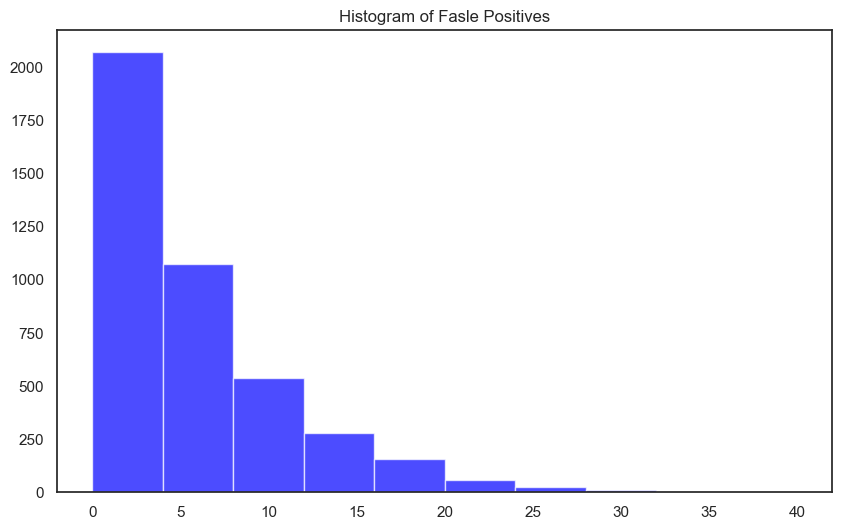

In [170]:
# plot - histogram of the  false_positives 
plt.figure(figsize=(10, 6))
plt.hist(wafer_results_df['false_positives'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fasle Positives')

Text(0.5, 1.0, 'Histogram of false negatives')

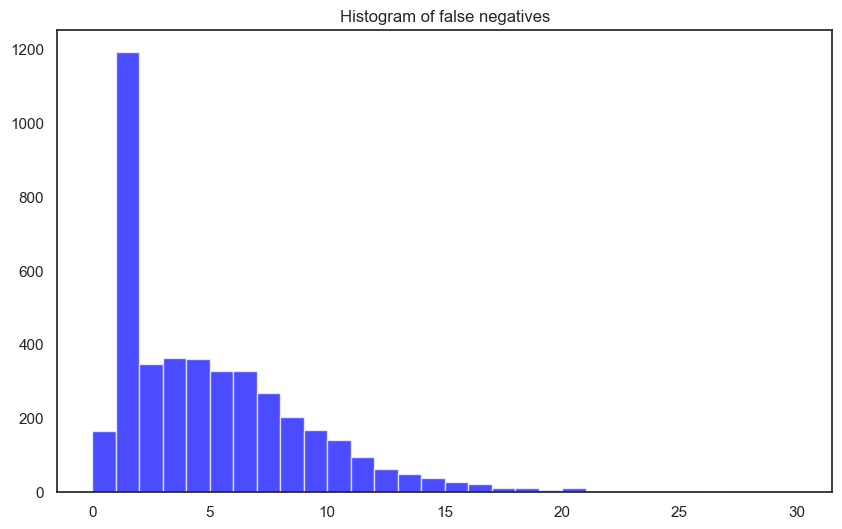

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(wafer_results_df['false_negatives'], bins=30
, color='blue', alpha=0.7)
plt.title('Histogram of false negatives')

In [172]:
wafer

WaferName  DieX  DieY  IsGoodDie  IsScratchDie
1169862    f3P9Pj     0    27       True         False
1169863    f3P9Pj     0    28       True         False
1169864    f3P9Pj     0    29       True         False
1169865    f3P9Pj     0    30       True         False
1169866    f3P9Pj     0    31       True         False
...           ...   ...   ...        ...           ...
1173906    f3P9Pj    70    39       True         False
1173907    f3P9Pj    70    40       True         False
1173908    f3P9Pj    70    41       True         False
1173909    f3P9Pj    70    42       True         False
1173910    f3P9Pj    70    43       True         False

[4049 rows x 5 columns]

In [173]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**16/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        if len(wafer_df_list) == 1:
            fig, ax = plt.subplots(2, 1, figsize=(figsize, figsize*2))
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df_list[0], ax[idx2], map_type)
        else:
            fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
            for idx1, wafer_df in enumerate(wafer_df_list):
                for idx2, map_type in enumerate(['Input', 'Label']):
                    plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        if len(wafer_df_list) == 1:
            fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))
            plot_wafer_map(wafer_df_list[0], ax, 'Input')
        else:
            fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
            for idx, wafer_df in enumerate(wafer_df_list):
                plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

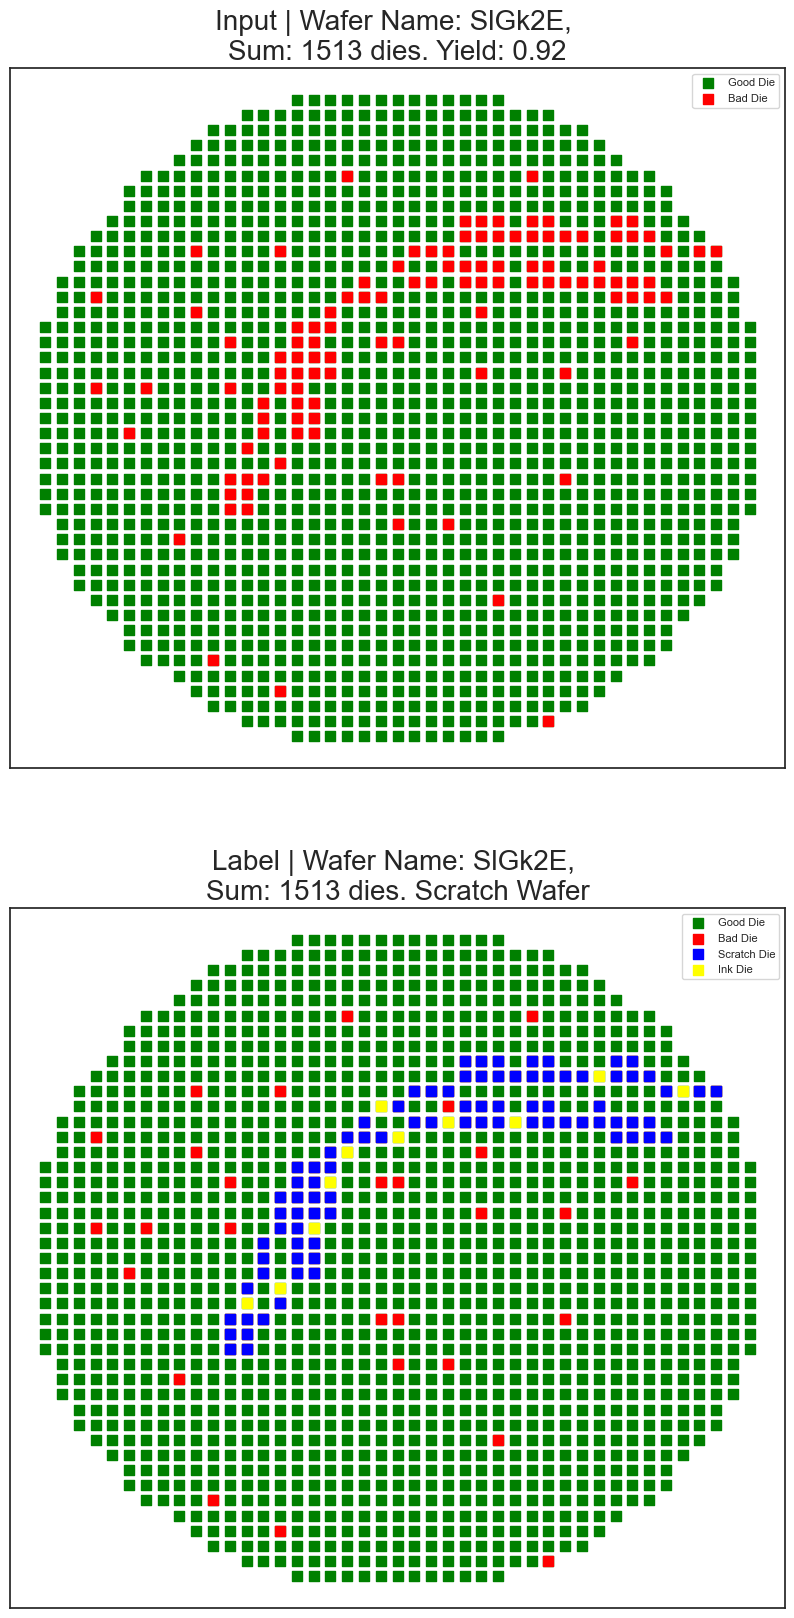

In [197]:
wafer = df_wafers[df_wafers['WaferName'] == 'SlGk2E']
plot_wafer_maps([wafer], figsize=10, labels=True)

In [198]:
print(f"Wafer Name: {wafer['WaferName'].iloc[0]}")
print(f"Yield Rate: {wafer['IsGoodDie'].mean():.2f}")   
print(f"Total Dies: {len(wafer)}")
print(f"Good Dies: {wafer['IsGoodDie'].sum()}")
print(f"Bad Dies: {len(wafer) - wafer['IsGoodDie'].sum()}")     
print(f"Scratch Dies: {wafer['IsScratchDie'].sum()}")
#sepcipic psicic metrixc per wafer from wafer_results_df
print(f"True Positives: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['true_positives'].values[0]}")
print(f"False Positives: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['false_positives'].values[0]}")
print(f"False Negatives: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['false_negatives'].values[0]}")
print(f"Precision: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['precision'].values[0]}")
print(f"Recall: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['recall'].values[0]}")
print(f"F1 Score: {wafer_results_df[wafer_results_df['index'] == wafer['WaferName'].iloc[0]]['f1'].values[0]}")



Wafer Name: SlGk2E
Yield Rate: 0.92
Total Dies: 1513
Good Dies: 1399
Bad Dies: 114
Scratch Dies: 97
True Positives: 84.0
False Positives: 1.0
False Negatives: 13.0
Precision: 0.9882352941176471
Recall: 0.865979381443299
F1 Score: 0.9230769230769231


this soultion is much more computaionly intese, it has the potainl to do a better job detecting scratches and and the ink dies.

one way to omprove the process is to create an algorythem that does the inking - in its base inking is taking good dies as scrathed becasue there in the trajectory of the scrath - we can find such dies by finding what dies would connect close by connected components.

In [199]:
import networkx as nx
import numpy as np
import pandas as pd
from collections import defaultdict
from numba import cuda, float32, int32, boolean

def create_wafer_graph(wafer_df):
    """
    Convert wafer data into a graph where nodes are dies and edges connect adjacent dies
    Only bad dies are included as nodes to find connected components of defects
    """
    # Create graph
    G = nx.Graph()
    
    # Get bad dies coordinates
    bad_dies = wafer_df[wafer_df['IsGoodDie'] == False][['DieX', 'DieY']].values
    
    # Add nodes for bad dies
    for x, y in bad_dies:
        G.add_node((x, y))
    
    # Add edges between adjacent bad dies (including diagonals)
    for i, (x1, y1) in enumerate(bad_dies):
        for x2, y2 in bad_dies[i+1:]:
            if abs(x1-x2) <= 1 and abs(y1-y2) <= 1:  # Adjacent dies
                G.add_edge((x1, y1), (x2, y2))
                
    return G

def find_scratch_candidates(G, min_size=3, min_aspect_ratio=2):
    """
    Find connected components that could be scratches based on size and shape
    """
    components = list(nx.connected_components(G))
    scratch_candidates = []
    
    for component in components:
        if len(component) >= min_size:
            scratch_candidates.append(set(component))
                
    return scratch_candidates

@cuda.jit
def check_adjacency_kernel(coords_x, coords_y, adjacency_matrix, n):
    """
    CUDA kernel to check adjacency between pairs of coordinates
    """
    i, j = cuda.grid(2)
    
    if i < n and j < n and i < j:  # Only compute upper triangle to avoid duplicates
        if abs(coords_x[i] - coords_x[j]) <= 1 and abs(coords_y[i] - coords_y[j]) <= 1:
            adjacency_matrix[i, j] = 1
            adjacency_matrix[j, i] = 1  # Make symmetric

@cuda.jit
def mark_scratch_dies_kernel(die_x, die_y, scratch_x, scratch_y, scratch_count, results):
    """
    CUDA kernel to mark dies that are part of scratches
    """
    i = cuda.grid(1)
    if i < len(die_x):
        for j in range(scratch_count):
            if die_x[i] == scratch_x[j] and die_y[i] == scratch_y[j]:
                results[i] = True
                break

def create_wafer_graph_gpu(wafer_df):
    """
    Create a graph using GPU for adjacency computation, then convert to NetworkX
    """
    # Get bad dies coordinates
    bad_dies = wafer_df[wafer_df['IsGoodDie'] == False][['DieX', 'DieY']].values
    
    if len(bad_dies) == 0:
        return nx.Graph()
    
    n = len(bad_dies)
    coords_x = bad_dies[:, 0].astype(np.int32)
    coords_y = bad_dies[:, 1].astype(np.int32)
    
    print(coords_x.shape, coords_x.dtype)
    print(coords_y.shape, coords_y.dtype)


    # Create adjacency matrix on GPU
    adjacency_matrix = np.zeros((n, n), dtype=np.int32)
    d_adjacency_matrix = cuda.to_device(adjacency_matrix)
    d_coords_x = cuda.to_device(coords_x)
    d_coords_y = cuda.to_device(coords_y)
    
    # Define grid and block dimensions
    threads_per_block = (16, 16)
    blocks_per_grid_x = (n + threads_per_block[0] - 1) // threads_per_block[0]
    blocks_per_grid_y = (n + threads_per_block[1] - 1) // threads_per_block[1]
    blocks_per_grid = (blocks_per_grid_x, blocks_per_grid_y)
    
    # Launch kernel
    check_adjacency_kernel[blocks_per_grid, threads_per_block](
        d_coords_x, d_coords_y, d_adjacency_matrix, n
    )
    
    # Copy result back to host
    adjacency_matrix = d_adjacency_matrix.copy_to_host()
    
    # Create NetworkX graph from adjacency matrix
    G = nx.Graph()
    
    # Add nodes with original coordinates
    for i, (x, y) in enumerate(bad_dies):
        G.add_node(i, coords=(x, y))
    
    # Add edges where adjacency is indicated
    for i in range(n):
        for j in range(i+1, n):
            if adjacency_matrix[i, j] == 1:
                G.add_edge(i, j)
    
    return G, bad_dies

def convert_index_components_to_coords(components, bad_dies):
    """
    Convert components with node indices to coordinates
    """
    coord_components = []
    for component in components:
        coords = set()
        for node_idx in component:
            coords.add(tuple(bad_dies[node_idx]))
        coord_components.append(coords)
    return coord_components

def apply_scratch_predictions_gpu(wafer_df, scratch_candidates):
    """
    Apply scratch predictions using GPU acceleration for the matching
    """
    # Create a new column initialized to False
    wafer_df['IsScratchDie_Predicted'] = False
    
    # If no scratch candidates, return the DataFrame as is
    if not scratch_candidates:
        return wafer_df
    
    # Combine all scratch candidates into a single set of coordinates
    all_scratch_coords = set().union(*scratch_candidates)
    
    # Convert to numpy arrays for GPU processing
    scratch_x = np.array([coord[0] for coord in all_scratch_coords], dtype=np.int32)
    scratch_y = np.array([coord[1] for coord in all_scratch_coords], dtype=np.int32)
    
    die_x = wafer_df['DieX'].values.astype(np.int32)
    die_y = wafer_df['DieY'].values.astype(np.int32)
    
    # Prepare output array
    results = np.zeros(len(wafer_df), dtype=np.bool_)
    
    # Configure GPU kernel
    threads_per_block = 256
    blocks_per_grid = (len(wafer_df) + threads_per_block - 1) // threads_per_block
    
    # Launch kernel
    d_die_x = cuda.to_device(die_x)
    d_die_y = cuda.to_device(die_y)
    d_scratch_x = cuda.to_device(scratch_x)
    d_scratch_y = cuda.to_device(scratch_y)
    d_results = cuda.to_device(results)
    
    mark_scratch_dies_kernel[blocks_per_grid, threads_per_block](
        d_die_x, d_die_y, d_scratch_x, d_scratch_y, len(scratch_x), d_results
    )
    
    # Copy results back to host
    results = d_results.copy_to_host()
    
    # Update DataFrame with results
    wafer_df['IsScratchDie_Predicted'] = results
    
    return wafer_df

def evaluate_scratch_detection(wafer_df, scratch_candidates):
    """
    Compare detected scratch candidates with actual scratch dies
    """
    # Get actual scratch dies
    actual_scratch_coords = set(map(tuple, 
        wafer_df[wafer_df['IsScratchDie'] == True][['DieX', 'DieY']].values))
    
    # Combine all detected scratch candidates
    detected_scratch_coords = set().union(*scratch_candidates) if scratch_candidates else set()
    
    # Calculate metrics
    true_positives = len(actual_scratch_coords & detected_scratch_coords)
    false_positives = len(detected_scratch_coords - actual_scratch_coords)
    false_negatives = len(actual_scratch_coords - detected_scratch_coords)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

def analyze_all_wafers_gpu(df_wafers,use_gpu=True):
    """
    Analyze all wafers using GPU acceleration for the most intensive parts
    """
    total_metrics = defaultdict(float)
    wafer_results = {}
    
    # Make a copy of the original DataFrame to store predictions
    df_wafers_with_predictions = df_wafers.copy()
    
    # Check if GPU is available
    if use_gpu is True:
        try:
            cuda.detect()
            print("CUDA GPU detected. Using GPU acceleration.")
        except:
            use_gpu = False
            print("No CUDA GPU detected. Falling back to CPU.")
    else:
        use_gpu = False
        print("GPU usage is forced to be False. Falling back to CPU.")



    # Force GPU usage for testing
    
    wafer_names = df_wafers['WaferName'].unique()
    total_wafers = len(wafer_names)
    
    for idx, wafer_name in enumerate(wafer_names):
        wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name]
        
        # Skip wafers with very low yield
        yield_rate = wafer_df['IsGoodDie'].mean()
        if yield_rate < 0.8:
            continue
        
        # Print progress
        print(f'Analyzing wafer: {wafer_name} | Yield Rate: {yield_rate:.2f}')
        print(f'Processed {idx+1}/{total_wafers} wafers')
        
        # Create graph and find scratch candidates
        if use_gpu:
            G, bad_dies = create_wafer_graph_gpu(wafer_df)
            # Use NetworkX to find connected components
            components = list(nx.connected_components(G))
            # Convert index-based components to coordinate-based components
            scratch_candidates = []
            for component in components:
                if len(component) >= 3:  # min_size
                    coords = set()
                    for node_idx in component:
                        x, y = G.nodes[node_idx]['coords']
                        coords.add((x, y))
                    scratch_candidates.append(coords)
            
            # Apply predictions using GPU
            wafer_df = apply_scratch_predictions_gpu(wafer_df, scratch_candidates)
        else:
            # Fall back to CPU implementation
            G = create_wafer_graph(wafer_df)
            scratch_candidates = find_scratch_candidates(G)
            wafer_df = apply_scratch_predictions(wafer_df, scratch_candidates)
        
        # Update the predictions in the complete DataFrame
        mask = df_wafers_with_predictions['WaferName'] == wafer_name
        df_wafers_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
        
        # Evaluate results
        metrics = evaluate_scratch_detection(wafer_df, scratch_candidates)
        wafer_results[wafer_name] = metrics
        
        # Aggregate metrics
        for k, v in metrics.items():
            total_metrics[k] += v
    
    # Calculate average metrics
    n_wafers = len(wafer_results)
    avg_metrics = {k: v/n_wafers for k, v in total_metrics.items()} if n_wafers > 0 else {}
    
    return avg_metrics, wafer_results, df_wafers_with_predictions

def apply_scratch_predictions(wafer_df, scratch_candidates):
    """
    Add a column to the DataFrame indicating whether each die is part of a detected scratch
    """
    # Create a new column initialized to False
    wafer_df['IsScratchDie_Predicted'] = False
    
    # If no scratch candidates, return the DataFrame as is
    if not scratch_candidates:
        return wafer_df
    
    # Combine all scratch candidates into a single set of coordinates
    all_scratch_coords = set().union(*scratch_candidates)
    
    # Update the DataFrame with True values for detected scratch coordinates
    for x, y in all_scratch_coords:
        mask = (wafer_df['DieX'] == x) & (wafer_df['DieY'] == y)
        wafer_df.loc[mask, 'IsScratchDie_Predicted'] = True
    
    return wafer_df

def predict_scratches_gpu(df_wafers_test):
    """
    Apply scratch detection to test data using GPU acceleration
    """
    # Check if GPU is available
    try:
        cuda.detect()
        use_gpu = True
    except:
        use_gpu = False
        print("No CUDA GPU detected. Falling back to CPU.")
    
    # Make a copy for predictions
    df_wafers_test_with_predictions = df_wafers_test.copy()
    df_wafers_test_with_predictions['IsScratchDie_Predicted'] = False
    
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]
        
        # Create graph and find scratch candidates
        if use_gpu:
            G, bad_dies = create_wafer_graph_gpu(wafer_df)
            # Use NetworkX to find connected components
            components = list(nx.connected_components(G))
            # Convert index-based components to coordinate-based components
            scratch_candidates = []
            for component in components:
                if len(component) >= 3:  # min_size
                    coords = set()
                    for node_idx in component:
                        x, y = G.nodes[node_idx]['coords']
                        coords.add((x, y))
                    scratch_candidates.append(coords)
            
            # Apply predictions using GPU
            wafer_df = apply_scratch_predictions_gpu(wafer_df, scratch_candidates)
        else:
            G = create_wafer_graph(wafer_df)
            scratch_candidates = find_scratch_candidates(G)
            wafer_df = apply_scratch_predictions(wafer_df, scratch_candidates)
        
        # Update the predictions in the complete DataFrame
        mask = df_wafers_test_with_predictions['WaferName'] == wafer_name
        df_wafers_test_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
    
    return df_wafers_test_with_predictions['IsScratchDie_Predicted'].values

# Example usage
if __name__ == "__main__":
    # Load your data
    # df_wafers = pd.read_csv('your_wafer_data.csv')
    
    # Run analysis using GPU-accelerated version
    avg_metrics, wafer_results, df_wafers_with_predictions = analyze_all_wafers_gpu(df_wafers, use_gpu=False)
    
    print("\nAverage metrics across all wafers:")
    for metric, value in avg_metrics.items():
        print(f"{metric}: {value:.3f}")
    
    # For prediction on new test data
    # df_wafers_test = pd.read_csv('your_test_data.csv')
    # IsScratchDie = predict_scratches_gpu(df_wafers_test)
    # df_wafers_test['IsScratchDie'] = IsScratchDie

GPU usage is forced to be False. Falling back to CPU.
Analyzing wafer: 8PFrAN | Yield Rate: 0.95
Processed 1/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X35KWx | Yield Rate: 0.97
Processed 2/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hpKllm | Yield Rate: 0.97
Processed 3/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gwjgvf | Yield Rate: 0.98
Processed 4/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EAmFHC | Yield Rate: 0.97
Processed 5/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xHMg06 | Yield Rate: 0.96
Processed 6/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: U6YFFh | Yield Rate: 0.97
Processed 7/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ih2CbI | Yield Rate: 0.97
Processed 8/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GHlqOp | Yield Rate: 0.96
Processed 9/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oF6oN1 | Yield Rate: 0.96
Processed 10/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dXjYqm | Yield Rate: 0.96
Processed 11/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vuYAxE | Yield Rate: 0.95
Processed 12/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JXy6ur | Yield Rate: 0.97
Processed 13/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oJJWk4 | Yield Rate: 0.96
Processed 14/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 27jJvL | Yield Rate: 0.97
Processed 15/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l7n46l | Yield Rate: 0.97
Processed 16/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LtGS0N | Yield Rate: 0.96
Processed 17/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EaC79F | Yield Rate: 0.95
Processed 18/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SiPPbo | Yield Rate: 0.97
Processed 19/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: anpwRT | Yield Rate: 0.98
Processed 20/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y9tKHj | Yield Rate: 0.97
Processed 21/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jNSNSN | Yield Rate: 0.98
Processed 22/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UpdgZR | Yield Rate: 0.95
Processed 23/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x5emnH | Yield Rate: 0.97
Processed 24/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VChyJL | Yield Rate: 0.96
Processed 25/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QLTgHn | Yield Rate: 0.94
Processed 26/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fHmbu6 | Yield Rate: 0.94
Processed 27/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NPOXim | Yield Rate: 0.94
Processed 28/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IhkAx7 | Yield Rate: 0.97
Processed 29/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cXx0Me | Yield Rate: 0.94
Processed 30/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: opKvR2 | Yield Rate: 0.97
Processed 31/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SYrUp2 | Yield Rate: 0.96
Processed 32/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lFL7CI | Yield Rate: 0.97
Processed 33/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rHkc9I | Yield Rate: 0.96
Processed 34/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wvu5VK | Yield Rate: 0.97
Processed 35/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JlxwjD | Yield Rate: 0.96
Processed 36/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aqPB5H | Yield Rate: 0.96
Processed 37/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0lsAYQ | Yield Rate: 0.95
Processed 38/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hc40fa | Yield Rate: 0.95
Processed 39/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5ANCVA | Yield Rate: 0.95
Processed 40/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b9DG7u | Yield Rate: 0.96
Processed 41/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yrg3GH | Yield Rate: 0.98
Processed 42/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7sACE9 | Yield Rate: 0.95
Processed 43/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 44pjTk | Yield Rate: 0.97
Processed 44/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eVj5rp | Yield Rate: 0.95
Processed 45/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1XHrDt | Yield Rate: 0.97
Processed 46/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TjVK98 | Yield Rate: 0.98
Processed 47/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ef1Ztr | Yield Rate: 0.96
Processed 48/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0TdiMn | Yield Rate: 0.97
Processed 49/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gpbHWT | Yield Rate: 0.96
Processed 50/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xNWmgg | Yield Rate: 0.95
Processed 51/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PBA5ly | Yield Rate: 0.96
Processed 52/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XO66oU | Yield Rate: 0.97
Processed 53/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i07aqx | Yield Rate: 0.97
Processed 54/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5q7vd3 | Yield Rate: 0.96
Processed 55/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eCicvZ | Yield Rate: 0.95
Processed 56/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6biFn6 | Yield Rate: 0.97
Processed 57/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YwACva | Yield Rate: 0.96
Processed 58/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0wsJGL | Yield Rate: 0.97
Processed 59/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vR2QRJ | Yield Rate: 0.97
Processed 60/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SHgE1K | Yield Rate: 0.95
Processed 61/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w4ycA3 | Yield Rate: 0.97
Processed 62/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W1ke1K | Yield Rate: 0.96
Processed 63/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9eGsim | Yield Rate: 0.96
Processed 64/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y8UGyX | Yield Rate: 0.97
Processed 65/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oQP2EU | Yield Rate: 0.95
Processed 66/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EjexY7 | Yield Rate: 0.95
Processed 67/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hUDhi9 | Yield Rate: 0.96
Processed 68/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y0ddoS | Yield Rate: 0.96
Processed 69/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DxOr5p | Yield Rate: 0.96
Processed 70/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CCwmDW | Yield Rate: 0.97
Processed 71/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RUyueV | Yield Rate: 0.98
Processed 72/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YUCjjp | Yield Rate: 0.96
Processed 73/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8lDKGR | Yield Rate: 0.96
Processed 74/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PbhcX1 | Yield Rate: 0.96
Processed 75/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MVJ1Qa | Yield Rate: 0.96
Processed 76/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7b7WQi | Yield Rate: 0.94
Processed 77/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bWWURv | Yield Rate: 0.95
Processed 78/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: czTTKN | Yield Rate: 0.97
Processed 79/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UO7nHy | Yield Rate: 0.95
Processed 80/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4RLb7I | Yield Rate: 0.96
Processed 81/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ro6Cjk | Yield Rate: 0.96
Processed 82/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fzsAar | Yield Rate: 0.97
Processed 83/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P9eNXG | Yield Rate: 0.96
Processed 84/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Qc3He | Yield Rate: 0.97
Processed 85/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YGaW4d | Yield Rate: 0.97
Processed 86/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6qbiCk | Yield Rate: 0.95
Processed 87/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qpvohQ | Yield Rate: 0.98
Processed 88/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: recgUW | Yield Rate: 0.96
Processed 89/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sQl8iS | Yield Rate: 0.96
Processed 90/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CAo8Pp | Yield Rate: 0.95
Processed 91/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KycfUv | Yield Rate: 0.97
Processed 92/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gJ8UIB | Yield Rate: 0.97
Processed 93/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f2zPFL | Yield Rate: 0.95
Processed 94/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BP8fAa | Yield Rate: 0.95
Processed 95/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s2UBXR | Yield Rate: 0.98
Processed 96/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1h3QPx | Yield Rate: 0.97
Processed 97/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9F30qx | Yield Rate: 0.96
Processed 98/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l8qyNe | Yield Rate: 0.95
Processed 99/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oNTCjr | Yield Rate: 0.94
Processed 100/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iVTWyn | Yield Rate: 0.93
Processed 101/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LOFcUj | Yield Rate: 0.95
Processed 102/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1bOH0d | Yield Rate: 0.95
Processed 103/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QWox05 | Yield Rate: 0.95
Processed 104/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OHtRmv | Yield Rate: 0.96
Processed 105/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RJqjsr | Yield Rate: 0.96
Processed 106/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zRb51O | Yield Rate: 0.96
Processed 107/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R0zezd | Yield Rate: 0.94
Processed 108/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c5QMUs | Yield Rate: 0.96
Processed 109/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5SZC37 | Yield Rate: 0.97
Processed 110/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zNXbo3 | Yield Rate: 0.94
Processed 111/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RWdqMG | Yield Rate: 0.95
Processed 112/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dczEyX | Yield Rate: 0.98
Processed 113/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 85da01 | Yield Rate: 0.94
Processed 114/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vE8WGI | Yield Rate: 0.97
Processed 115/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CBGZxH | Yield Rate: 0.96
Processed 116/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NWjMHJ | Yield Rate: 0.96
Processed 117/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V6R0by | Yield Rate: 0.96
Processed 118/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JMsDTf | Yield Rate: 0.96
Processed 119/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vLKt8H | Yield Rate: 0.96
Processed 120/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i4EABb | Yield Rate: 0.96
Processed 121/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iDVYhj | Yield Rate: 0.96
Processed 122/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xau4wc | Yield Rate: 0.94
Processed 123/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: az7Pbb | Yield Rate: 0.97
Processed 124/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HalyoF | Yield Rate: 0.95
Processed 125/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hx6UlU | Yield Rate: 0.97
Processed 126/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: d8alQd | Yield Rate: 0.98
Processed 127/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J6I7xw | Yield Rate: 0.96
Processed 128/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ESEQ09 | Yield Rate: 0.95
Processed 129/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hyEmDs | Yield Rate: 0.96
Processed 130/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gQJejy | Yield Rate: 0.96
Processed 131/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PZejXh | Yield Rate: 0.97
Processed 132/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t5qFkB | Yield Rate: 0.94
Processed 133/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g6El7Q | Yield Rate: 0.96
Processed 134/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: phA6DF | Yield Rate: 0.95
Processed 135/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rUFgDH | Yield Rate: 0.98
Processed 136/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5dUMJu | Yield Rate: 0.96
Processed 137/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0q7T2o | Yield Rate: 0.96
Processed 138/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uxFGVs | Yield Rate: 0.97
Processed 139/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hAeAk6 | Yield Rate: 0.97
Processed 140/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YW2j3c | Yield Rate: 0.95
Processed 141/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lXYpqX | Yield Rate: 0.97
Processed 142/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7lzPKf | Yield Rate: 0.99
Processed 143/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eg5YrZ | Yield Rate: 0.95
Processed 144/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gSsBoo | Yield Rate: 0.97
Processed 145/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WJvVu8 | Yield Rate: 0.97
Processed 146/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R61KaD | Yield Rate: 0.97
Processed 147/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VxjZjD | Yield Rate: 0.95
Processed 148/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ePwx38 | Yield Rate: 0.96
Processed 149/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ikZAAt | Yield Rate: 0.96
Processed 150/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SlGk2E | Yield Rate: 0.92
Processed 151/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yreCqm | Yield Rate: 0.95
Processed 152/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TNEn7r | Yield Rate: 0.95
Processed 153/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kzTzFL | Yield Rate: 0.94
Processed 154/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4nOZLa | Yield Rate: 0.97
Processed 155/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NW8gxG | Yield Rate: 0.96
Processed 156/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2FOdX9 | Yield Rate: 0.97
Processed 157/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GKZyYV | Yield Rate: 0.95
Processed 158/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fIalQh | Yield Rate: 0.96
Processed 159/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UZsk8u | Yield Rate: 0.96
Processed 160/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LBOsbT | Yield Rate: 0.99
Processed 161/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KkKWwe | Yield Rate: 0.95
Processed 162/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8B6fLG | Yield Rate: 0.96
Processed 163/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vxCs2y | Yield Rate: 0.97
Processed 164/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7HYfYU | Yield Rate: 0.97
Processed 165/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: paiQun | Yield Rate: 0.97
Processed 166/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OF17gU | Yield Rate: 0.93
Processed 167/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RUax2f | Yield Rate: 0.97
Processed 168/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aUJQde | Yield Rate: 0.94
Processed 169/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6Y3jZe | Yield Rate: 0.97
Processed 170/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J815Z5 | Yield Rate: 0.95
Processed 171/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T8at5A | Yield Rate: 0.96
Processed 172/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DERvhV | Yield Rate: 0.95
Processed 173/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X9ZoG5 | Yield Rate: 0.95
Processed 174/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zJcag1 | Yield Rate: 0.97
Processed 175/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zk1jNP | Yield Rate: 0.95
Processed 176/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QB1nIu | Yield Rate: 0.97
Processed 177/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fScwcB | Yield Rate: 0.94
Processed 178/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZAsemj | Yield Rate: 0.96
Processed 179/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tQjM4F | Yield Rate: 0.96
Processed 180/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8NMIoa | Yield Rate: 0.95
Processed 181/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lZqCdB | Yield Rate: 0.97
Processed 182/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uPK2Fl | Yield Rate: 0.96
Processed 183/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kybgaP | Yield Rate: 0.97
Processed 184/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: One5gL | Yield Rate: 0.97
Processed 185/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bcvwlv | Yield Rate: 0.95
Processed 186/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ErOEFE | Yield Rate: 0.95
Processed 187/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DNGJLQ | Yield Rate: 0.96
Processed 188/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C9WxSK | Yield Rate: 0.98
Processed 189/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ePTTQP | Yield Rate: 0.98
Processed 190/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vbmXUI | Yield Rate: 0.97
Processed 191/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0jx2ns | Yield Rate: 0.96
Processed 192/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7xI2Am | Yield Rate: 0.98
Processed 193/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yReYMD | Yield Rate: 0.95
Processed 194/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4reUZR | Yield Rate: 0.95
Processed 195/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Um09bb | Yield Rate: 0.96
Processed 196/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f5rTgM | Yield Rate: 0.97
Processed 197/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gGmXN7 | Yield Rate: 0.96
Processed 198/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hTjsdY | Yield Rate: 0.98
Processed 199/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YDU4E7 | Yield Rate: 0.98
Processed 200/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wdYbgs | Yield Rate: 0.97
Processed 201/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8Mq4ce | Yield Rate: 0.96
Processed 202/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6SrpzX | Yield Rate: 0.96
Processed 203/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RsPzi8 | Yield Rate: 0.95
Processed 204/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MWThd2 | Yield Rate: 0.96
Processed 205/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pjiKEo | Yield Rate: 0.95
Processed 206/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lbltUY | Yield Rate: 0.97
Processed 207/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cVIgF2 | Yield Rate: 0.96
Processed 208/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hQoffl | Yield Rate: 0.97
Processed 209/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kaBeHt | Yield Rate: 0.98
Processed 210/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sNyWi7 | Yield Rate: 0.90
Processed 211/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6toPkF | Yield Rate: 0.96
Processed 212/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K3xDdZ | Yield Rate: 0.94
Processed 213/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RB5KAT | Yield Rate: 0.96
Processed 214/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rmyz9Q | Yield Rate: 0.95
Processed 215/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i6lQ6E | Yield Rate: 0.97
Processed 216/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iDmmNo | Yield Rate: 0.96
Processed 217/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sA3YPF | Yield Rate: 0.96
Processed 218/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xWkMZU | Yield Rate: 0.97
Processed 219/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mbHA0l | Yield Rate: 0.97
Processed 220/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KOTxEH | Yield Rate: 0.96
Processed 221/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 06yPzs | Yield Rate: 0.97
Processed 222/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SL17bS | Yield Rate: 0.97
Processed 223/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aSrIN6 | Yield Rate: 0.95
Processed 224/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bXo7gj | Yield Rate: 0.95
Processed 225/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PoohKN | Yield Rate: 0.96
Processed 226/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qn8A1x | Yield Rate: 0.96
Processed 227/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ce2Tps | Yield Rate: 0.96
Processed 228/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: grRP1j | Yield Rate: 0.95
Processed 229/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IL1si7 | Yield Rate: 0.95
Processed 230/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0o7ZNl | Yield Rate: 0.96
Processed 231/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G5WLMW | Yield Rate: 0.96
Processed 232/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qBRnF6 | Yield Rate: 0.97
Processed 233/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cz2LFW | Yield Rate: 0.98
Processed 234/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V6jcVf | Yield Rate: 0.98
Processed 235/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JRO8od | Yield Rate: 0.97
Processed 236/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: udLzGN | Yield Rate: 0.97
Processed 237/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Br0G7f | Yield Rate: 0.97
Processed 238/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TnszTJ | Yield Rate: 0.97
Processed 239/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mT1Acr | Yield Rate: 0.96
Processed 240/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9YhYzY | Yield Rate: 0.95
Processed 241/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gj4H8P | Yield Rate: 0.98
Processed 242/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZWPaoB | Yield Rate: 0.97
Processed 243/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wywdqj | Yield Rate: 0.96
Processed 244/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ps5fwu | Yield Rate: 0.96
Processed 245/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FR67is | Yield Rate: 0.95
Processed 246/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hGRqj2 | Yield Rate: 0.97
Processed 247/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8554Pj | Yield Rate: 0.95
Processed 248/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2fbuZV | Yield Rate: 0.95
Processed 249/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xg7qpV | Yield Rate: 0.95
Processed 250/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: En1ovW | Yield Rate: 0.97
Processed 251/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ef4vHc | Yield Rate: 0.95
Processed 252/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m2RDZ1 | Yield Rate: 0.95
Processed 253/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RWov4i | Yield Rate: 0.97
Processed 254/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RC8gAI | Yield Rate: 0.94
Processed 255/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MaK7FP | Yield Rate: 0.97
Processed 256/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZQkfSQ | Yield Rate: 0.97
Processed 257/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SZhBx6 | Yield Rate: 0.97
Processed 258/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X3hkiS | Yield Rate: 0.95
Processed 259/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CPsNmr | Yield Rate: 0.98
Processed 260/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c8UHs0 | Yield Rate: 0.96
Processed 261/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2a37BX | Yield Rate: 0.95
Processed 262/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0wKP2f | Yield Rate: 0.97
Processed 263/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b49oNX | Yield Rate: 0.96
Processed 264/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tz6SKq | Yield Rate: 0.97
Processed 265/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EUbMVO | Yield Rate: 0.95
Processed 266/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6GRucx | Yield Rate: 0.96
Processed 267/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 30IEia | Yield Rate: 0.97
Processed 268/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zHFlbc | Yield Rate: 0.97
Processed 269/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zM6f5H | Yield Rate: 0.94
Processed 270/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6Tn8Vp | Yield Rate: 0.96
Processed 271/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z8qFdb | Yield Rate: 0.97
Processed 272/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: riE9sV | Yield Rate: 0.98
Processed 273/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 14VcBi | Yield Rate: 0.98
Processed 274/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jgp4lw | Yield Rate: 0.95
Processed 275/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q1ru7s | Yield Rate: 0.94
Processed 276/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PjAttf | Yield Rate: 0.96
Processed 277/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RgVJUz | Yield Rate: 0.96
Processed 278/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cVAWjv | Yield Rate: 0.96
Processed 279/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wMJp6Q | Yield Rate: 0.94
Processed 280/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t5vJGu | Yield Rate: 0.96
Processed 281/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7fRtl7 | Yield Rate: 0.95
Processed 282/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hhw6y5 | Yield Rate: 0.96
Processed 283/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wCnrxk | Yield Rate: 0.96
Processed 284/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dEUUlg | Yield Rate: 0.97
Processed 285/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yvfJis | Yield Rate: 0.97
Processed 286/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UZRlQd | Yield Rate: 0.96
Processed 287/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wOJoOa | Yield Rate: 0.97
Processed 288/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KSRtIS | Yield Rate: 0.94
Processed 289/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: z5eJ4W | Yield Rate: 0.96
Processed 290/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BmbTvn | Yield Rate: 0.98
Processed 291/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X3HNP3 | Yield Rate: 0.96
Processed 292/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ic1L8a | Yield Rate: 0.97
Processed 293/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xANc9d | Yield Rate: 0.96
Processed 294/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zNHg9A | Yield Rate: 0.97
Processed 295/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 06s0Nk | Yield Rate: 0.96
Processed 296/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iv1ySs | Yield Rate: 0.95
Processed 297/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PS6aik | Yield Rate: 0.96
Processed 298/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZpNYCM | Yield Rate: 0.94
Processed 299/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3XLzdz | Yield Rate: 0.96
Processed 300/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X1ESqf | Yield Rate: 0.95
Processed 301/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bj050d | Yield Rate: 0.95
Processed 302/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RdQwEj | Yield Rate: 0.97
Processed 303/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nxXvlR | Yield Rate: 0.96
Processed 304/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qWCUra | Yield Rate: 0.98
Processed 305/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 21zW8l | Yield Rate: 0.95
Processed 306/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 32oGuI | Yield Rate: 0.95
Processed 307/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H710AE | Yield Rate: 0.97
Processed 308/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SWVDpS | Yield Rate: 0.98
Processed 309/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GaO9dt | Yield Rate: 0.95
Processed 310/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OM8pr1 | Yield Rate: 0.97
Processed 311/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TL3k61 | Yield Rate: 0.97
Processed 312/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: leUZgt | Yield Rate: 0.97
Processed 313/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4YmGZO | Yield Rate: 0.97
Processed 314/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h5KIYo | Yield Rate: 0.94
Processed 315/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FkZ21I | Yield Rate: 0.96
Processed 316/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yXHyP1 | Yield Rate: 0.97
Processed 317/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XC7mLj | Yield Rate: 0.96
Processed 318/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xlkggJ | Yield Rate: 0.97
Processed 319/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zceKs6 | Yield Rate: 0.96
Processed 320/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M1ttNE | Yield Rate: 0.97
Processed 321/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8dO0XU | Yield Rate: 0.98
Processed 322/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lCPZFX | Yield Rate: 0.96
Processed 323/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2iBsrA | Yield Rate: 0.95
Processed 324/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tKUpp2 | Yield Rate: 0.95
Processed 325/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0qgyWo | Yield Rate: 0.96
Processed 326/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DaqR8q | Yield Rate: 0.98
Processed 327/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hPA3yb | Yield Rate: 0.95
Processed 328/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: peeEiP | Yield Rate: 0.96
Processed 329/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lBhf1m | Yield Rate: 0.98
Processed 330/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ykbzga | Yield Rate: 0.96
Processed 331/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HW4j3F | Yield Rate: 0.96
Processed 332/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qe4IqD | Yield Rate: 0.97
Processed 333/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kdV3sZ | Yield Rate: 0.96
Processed 334/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DYynKb | Yield Rate: 0.96
Processed 335/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KdSuA8 | Yield Rate: 0.96
Processed 336/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iyAUD7 | Yield Rate: 0.97
Processed 337/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WS2r5n | Yield Rate: 0.97
Processed 338/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HWBU1r | Yield Rate: 0.96
Processed 339/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PqU6MB | Yield Rate: 0.98
Processed 340/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RaJUfa | Yield Rate: 0.96
Processed 341/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 69dcto | Yield Rate: 0.96
Processed 342/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 61TEj9 | Yield Rate: 0.98
Processed 343/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NYP1Df | Yield Rate: 0.96
Processed 344/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tLuiTx | Yield Rate: 0.96
Processed 345/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L2q1jB | Yield Rate: 0.96
Processed 346/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XEzhIL | Yield Rate: 0.96
Processed 347/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b0MDFX | Yield Rate: 0.97
Processed 348/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EMYCJ4 | Yield Rate: 0.95
Processed 349/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ljv8jh | Yield Rate: 0.95
Processed 350/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OAZ9es | Yield Rate: 0.96
Processed 351/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sLgx9U | Yield Rate: 0.96
Processed 352/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RIpgmh | Yield Rate: 0.96
Processed 353/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yUEi3d | Yield Rate: 0.97
Processed 354/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ansZt1 | Yield Rate: 0.95
Processed 355/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ur7nFa | Yield Rate: 0.95
Processed 356/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xRst8A | Yield Rate: 0.96
Processed 357/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mci6Gz | Yield Rate: 0.97
Processed 358/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ButDbm | Yield Rate: 0.98
Processed 359/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pksb2a | Yield Rate: 0.98
Processed 360/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ssCvkJ | Yield Rate: 0.98
Processed 361/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: awXDZC | Yield Rate: 0.95
Processed 362/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gOYa9o | Yield Rate: 0.96
Processed 363/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: njCHjF | Yield Rate: 0.96
Processed 364/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uQYngZ | Yield Rate: 0.95
Processed 365/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mDG4Kt | Yield Rate: 0.97
Processed 366/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ImWto3 | Yield Rate: 0.98
Processed 367/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FOTSye | Yield Rate: 0.95
Processed 368/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sOlfWs | Yield Rate: 0.96
Processed 369/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jBhMDY | Yield Rate: 0.97
Processed 370/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: leB7wH | Yield Rate: 0.96
Processed 371/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x7BL67 | Yield Rate: 0.95
Processed 372/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 91SQXw | Yield Rate: 0.96
Processed 373/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pPI7bj | Yield Rate: 0.95
Processed 374/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rl2fib | Yield Rate: 0.95
Processed 375/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zaH8k2 | Yield Rate: 0.96
Processed 376/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bqDUY2 | Yield Rate: 0.97
Processed 377/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t7t8fz | Yield Rate: 0.98
Processed 378/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AFCOQN | Yield Rate: 0.97
Processed 379/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bu9zZB | Yield Rate: 0.96
Processed 380/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rMBvYZ | Yield Rate: 0.98
Processed 381/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dkYJ1w | Yield Rate: 0.95
Processed 382/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6CdKfj | Yield Rate: 0.96
Processed 383/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: al3Gu3 | Yield Rate: 0.95
Processed 384/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sFqMiP | Yield Rate: 0.97
Processed 385/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3KFyY4 | Yield Rate: 0.96
Processed 386/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oppHhS | Yield Rate: 0.95
Processed 387/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fIv7E8 | Yield Rate: 0.98
Processed 388/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4luL3X | Yield Rate: 0.97
Processed 389/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eRh5Z0 | Yield Rate: 0.94
Processed 390/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ieqa1P | Yield Rate: 0.97
Processed 391/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zbEhgk | Yield Rate: 0.97
Processed 392/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h7k8GR | Yield Rate: 0.98
Processed 393/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dYRBa1 | Yield Rate: 0.96
Processed 394/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vw77MW | Yield Rate: 0.97
Processed 395/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KjH6Oy | Yield Rate: 0.97
Processed 396/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6BBPt9 | Yield Rate: 0.98
Processed 397/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZcNFlB | Yield Rate: 0.97
Processed 398/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iVb1SU | Yield Rate: 0.97
Processed 399/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MjIEYA | Yield Rate: 0.96
Processed 400/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EAxj77 | Yield Rate: 0.97
Processed 401/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c5xXr2 | Yield Rate: 0.95
Processed 402/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Krumlz | Yield Rate: 0.98
Processed 403/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ESaGcm | Yield Rate: 0.96
Processed 404/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MrSXj7 | Yield Rate: 0.97
Processed 405/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IdUNCE | Yield Rate: 0.95
Processed 406/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jJauPZ | Yield Rate: 0.96
Processed 407/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dcnPsx | Yield Rate: 0.98
Processed 408/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mbsHt9 | Yield Rate: 0.95
Processed 409/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8fa4T0 | Yield Rate: 0.96
Processed 410/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D6ARxG | Yield Rate: 0.95
Processed 411/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YT1cRJ | Yield Rate: 0.98
Processed 412/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: htNDes | Yield Rate: 0.97
Processed 413/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r1uHgz | Yield Rate: 0.94
Processed 414/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6lVWMF | Yield Rate: 0.97
Processed 415/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WyloVz | Yield Rate: 0.95
Processed 416/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NOLVlq | Yield Rate: 0.96
Processed 417/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gKfA5A | Yield Rate: 0.96
Processed 418/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wlnrz7 | Yield Rate: 0.98
Processed 419/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v9sE2N | Yield Rate: 0.97
Processed 420/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zfsXeE | Yield Rate: 0.95
Processed 421/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xgfvBa | Yield Rate: 0.95
Processed 422/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B9jOda | Yield Rate: 0.97
Processed 423/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8L41w8 | Yield Rate: 0.95
Processed 424/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wYsci0 | Yield Rate: 0.97
Processed 425/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iqVtRd | Yield Rate: 0.98
Processed 426/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tTHLZg | Yield Rate: 0.96
Processed 427/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0RGYQG | Yield Rate: 0.96
Processed 428/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jw9rJs | Yield Rate: 0.97
Processed 429/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W99Ets | Yield Rate: 0.95
Processed 430/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YH7jpL | Yield Rate: 0.95
Processed 431/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZWzP4m | Yield Rate: 0.96
Processed 432/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hi1KKP | Yield Rate: 0.96
Processed 433/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CwCqsj | Yield Rate: 0.95
Processed 434/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TJwgsR | Yield Rate: 0.98
Processed 435/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: phXdoD | Yield Rate: 0.97
Processed 436/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j3vRWw | Yield Rate: 0.96
Processed 437/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: feU1OY | Yield Rate: 0.95
Processed 438/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ltCD7L | Yield Rate: 0.97
Processed 439/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5n3Ad1 | Yield Rate: 0.95
Processed 440/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CbAjIL | Yield Rate: 0.98
Processed 441/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BjPFIw | Yield Rate: 0.96
Processed 442/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9tRR1B | Yield Rate: 0.96
Processed 443/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O3ELSf | Yield Rate: 0.97
Processed 444/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lCVJQX | Yield Rate: 0.96
Processed 445/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4QD8R8 | Yield Rate: 0.96
Processed 446/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tmcXNF | Yield Rate: 0.96
Processed 447/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2JpzdT | Yield Rate: 0.96
Processed 448/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZaLHZT | Yield Rate: 0.98
Processed 449/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oLXhd9 | Yield Rate: 0.96
Processed 450/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TGsgyH | Yield Rate: 0.97
Processed 451/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ofHTyo | Yield Rate: 0.96
Processed 452/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jdrEMP | Yield Rate: 0.97
Processed 453/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hdnshh | Yield Rate: 0.96
Processed 454/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5xeFNC | Yield Rate: 0.97
Processed 455/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2fSMdm | Yield Rate: 0.95
Processed 456/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mlaA3B | Yield Rate: 0.98
Processed 457/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EHAbuX | Yield Rate: 0.96
Processed 458/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DpTm6E | Yield Rate: 0.98
Processed 459/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nOixIz | Yield Rate: 0.97
Processed 460/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NvquiU | Yield Rate: 0.95
Processed 461/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MkmM4P | Yield Rate: 0.96
Processed 462/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k7Ce5c | Yield Rate: 0.98
Processed 463/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RiacBu | Yield Rate: 0.97
Processed 464/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OQ3KgE | Yield Rate: 0.95
Processed 465/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n9HqwP | Yield Rate: 0.96
Processed 466/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lp2shp | Yield Rate: 0.95
Processed 467/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T5jyof | Yield Rate: 0.96
Processed 468/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bJRsju | Yield Rate: 0.95
Processed 469/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jeRIMy | Yield Rate: 0.98
Processed 470/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9ay1Jn | Yield Rate: 0.95
Processed 471/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s4zU5o | Yield Rate: 0.96
Processed 472/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KOLgvv | Yield Rate: 0.96
Processed 473/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nwUYok | Yield Rate: 0.96
Processed 474/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bp18vt | Yield Rate: 0.95
Processed 475/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DmhnhG | Yield Rate: 0.95
Processed 476/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u6zU8S | Yield Rate: 0.97
Processed 477/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qiH0Lt | Yield Rate: 0.93
Processed 478/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f3P9Pj | Yield Rate: 0.95
Processed 479/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aHzDgD | Yield Rate: 0.95
Processed 480/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yNAI43 | Yield Rate: 0.96
Processed 481/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H0ajOK | Yield Rate: 0.98
Processed 482/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SIEhNJ | Yield Rate: 0.94
Processed 483/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eH8hBa | Yield Rate: 0.96
Processed 484/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LYlREt | Yield Rate: 0.98
Processed 485/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q0e0Cq | Yield Rate: 0.94
Processed 486/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FRXYhy | Yield Rate: 0.96
Processed 487/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ccx4nJ | Yield Rate: 0.97
Processed 488/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BKGJ4p | Yield Rate: 0.96
Processed 489/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: suJpH6 | Yield Rate: 0.97
Processed 490/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EE718T | Yield Rate: 0.97
Processed 491/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Plar8 | Yield Rate: 0.97
Processed 492/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0b4Mao | Yield Rate: 0.97
Processed 493/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6KToKG | Yield Rate: 0.96
Processed 494/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uZCL2T | Yield Rate: 0.94
Processed 495/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OsV9z4 | Yield Rate: 0.97
Processed 496/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iD1Roh | Yield Rate: 0.97
Processed 497/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QfIHVK | Yield Rate: 0.98
Processed 498/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x2xKWS | Yield Rate: 0.96
Processed 499/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jj1bPR | Yield Rate: 0.96
Processed 500/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pF7iHe | Yield Rate: 0.95
Processed 501/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KCBqt9 | Yield Rate: 0.95
Processed 502/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cKOwav | Yield Rate: 0.96
Processed 503/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OOqN57 | Yield Rate: 0.95
Processed 504/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L89GO9 | Yield Rate: 0.95
Processed 505/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uKz9ZQ | Yield Rate: 0.98
Processed 506/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: okgAXm | Yield Rate: 0.97
Processed 507/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lFGlJX | Yield Rate: 0.97
Processed 508/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cjn5i5 | Yield Rate: 0.97
Processed 509/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5lRUkW | Yield Rate: 0.97
Processed 510/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZTEbnI | Yield Rate: 0.97
Processed 511/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yCk9eg | Yield Rate: 0.95
Processed 512/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xr59mr | Yield Rate: 0.95
Processed 513/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gh3vTc | Yield Rate: 0.97
Processed 514/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JdWmRH | Yield Rate: 0.96
Processed 515/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2LteGE | Yield Rate: 0.96
Processed 516/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a7MWOu | Yield Rate: 0.97
Processed 517/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dvzwdj | Yield Rate: 0.94
Processed 518/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J9xsRh | Yield Rate: 0.95
Processed 519/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sOFJUh | Yield Rate: 0.98
Processed 520/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 99UdCN | Yield Rate: 0.97
Processed 521/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ESf5mP | Yield Rate: 0.96
Processed 522/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S9CtyQ | Yield Rate: 0.96
Processed 523/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vUGz7V | Yield Rate: 0.96
Processed 524/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QidnRn | Yield Rate: 0.98
Processed 525/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gKAWsb | Yield Rate: 0.96
Processed 526/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bbmoCF | Yield Rate: 0.97
Processed 527/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N2I3fx | Yield Rate: 0.95
Processed 528/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L3vJFa | Yield Rate: 0.96
Processed 529/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vmnc00 | Yield Rate: 0.97
Processed 530/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MShA0b | Yield Rate: 0.97
Processed 531/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F61UEL | Yield Rate: 0.96
Processed 532/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DHDjjI | Yield Rate: 0.96
Processed 533/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mc8asE | Yield Rate: 0.96
Processed 534/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ftZ7ZM | Yield Rate: 0.98
Processed 535/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sl4367 | Yield Rate: 0.95
Processed 536/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2Y6woD | Yield Rate: 0.96
Processed 537/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FwN4Y7 | Yield Rate: 0.95
Processed 538/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Il0ctD | Yield Rate: 0.97
Processed 539/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vLaIh2 | Yield Rate: 0.94
Processed 540/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dVMJGh | Yield Rate: 0.98
Processed 541/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sYL2j8 | Yield Rate: 0.98
Processed 542/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qi6eyz | Yield Rate: 0.95
Processed 543/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KKhTPC | Yield Rate: 0.97
Processed 544/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uCS6mX | Yield Rate: 0.96
Processed 545/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6UTuHz | Yield Rate: 0.97
Processed 546/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fLtOik | Yield Rate: 0.94
Processed 547/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BAtEjJ | Yield Rate: 0.97
Processed 548/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zFQoVY | Yield Rate: 0.97
Processed 549/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2K1V7P | Yield Rate: 0.96
Processed 550/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E56yJH | Yield Rate: 0.95
Processed 551/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4BDRbB | Yield Rate: 0.97
Processed 552/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sAzBgb | Yield Rate: 0.97
Processed 553/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EYriSf | Yield Rate: 0.95
Processed 554/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LyvGh4 | Yield Rate: 0.96
Processed 555/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OycGMD | Yield Rate: 0.97
Processed 556/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0GBQq4 | Yield Rate: 0.97
Processed 557/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CRW8G9 | Yield Rate: 0.96
Processed 558/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sHZHlw | Yield Rate: 0.96
Processed 559/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y8MGma | Yield Rate: 0.96
Processed 560/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P0UMXB | Yield Rate: 0.97
Processed 561/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Skd2xU | Yield Rate: 0.96
Processed 562/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lM1fHj | Yield Rate: 0.95
Processed 563/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hcAGe4 | Yield Rate: 0.96
Processed 564/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s9S78Y | Yield Rate: 0.96
Processed 565/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LxUpQc | Yield Rate: 0.97
Processed 566/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tMhS9z | Yield Rate: 0.96
Processed 567/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EeKVSb | Yield Rate: 0.95
Processed 568/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J4i6On | Yield Rate: 0.96
Processed 569/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LjVUx5 | Yield Rate: 0.95
Processed 570/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hkiwod | Yield Rate: 0.96
Processed 571/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CB1u0G | Yield Rate: 0.97
Processed 572/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sFUv3N | Yield Rate: 0.96
Processed 573/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Np63Ln | Yield Rate: 0.97
Processed 574/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BilFll | Yield Rate: 0.96
Processed 575/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: beiGA1 | Yield Rate: 0.96
Processed 576/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sMMY9Z | Yield Rate: 0.96
Processed 577/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MxS1wp | Yield Rate: 0.98
Processed 578/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iLmLEX | Yield Rate: 0.96
Processed 579/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gS7nzB | Yield Rate: 0.96
Processed 580/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TC6BdE | Yield Rate: 0.95
Processed 581/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bgcu1M | Yield Rate: 0.96
Processed 582/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K63zaG | Yield Rate: 0.97
Processed 583/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HN7PNr | Yield Rate: 0.96
Processed 584/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X2n57q | Yield Rate: 0.96
Processed 585/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6WzGzg | Yield Rate: 0.97
Processed 586/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xOEGvS | Yield Rate: 0.96
Processed 587/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2sncaY | Yield Rate: 0.97
Processed 588/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HBy3ZB | Yield Rate: 0.97
Processed 589/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QK7H8b | Yield Rate: 0.96
Processed 590/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bzGuA8 | Yield Rate: 0.97
Processed 591/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lr1jkI | Yield Rate: 0.98
Processed 592/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YOMPjP | Yield Rate: 0.96
Processed 593/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9ticCf | Yield Rate: 0.96
Processed 594/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ET2t3r | Yield Rate: 0.96
Processed 595/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1VXwKc | Yield Rate: 0.97
Processed 596/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g3aX4y | Yield Rate: 0.96
Processed 597/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a3kUjq | Yield Rate: 0.95
Processed 598/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JUixNa | Yield Rate: 0.96
Processed 599/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mPkWAV | Yield Rate: 0.94
Processed 600/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cAySvv | Yield Rate: 0.98
Processed 601/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fswnb5 | Yield Rate: 0.96
Processed 602/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iif5bN | Yield Rate: 0.98
Processed 603/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Htumyc | Yield Rate: 0.98
Processed 604/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HBwcau | Yield Rate: 0.96
Processed 605/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8iD7hn | Yield Rate: 0.97
Processed 606/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QfnfVj | Yield Rate: 0.96
Processed 607/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: avSrQK | Yield Rate: 0.97
Processed 608/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AWc5s5 | Yield Rate: 0.98
Processed 609/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vvbAo5 | Yield Rate: 0.97
Processed 610/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pRhnjU | Yield Rate: 0.95
Processed 611/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BzvSVA | Yield Rate: 0.96
Processed 612/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Csqnxn | Yield Rate: 0.96
Processed 613/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 131V99 | Yield Rate: 0.97
Processed 614/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yTBVIw | Yield Rate: 0.99
Processed 615/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5m8KdE | Yield Rate: 0.95
Processed 616/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WjsaiI | Yield Rate: 0.98
Processed 617/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PHvWRi | Yield Rate: 0.96
Processed 618/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OVMiRr | Yield Rate: 0.97
Processed 619/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iUCZ75 | Yield Rate: 0.97
Processed 620/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8VHtZe | Yield Rate: 0.97
Processed 621/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gy1180 | Yield Rate: 0.97
Processed 622/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y0aFk0 | Yield Rate: 0.97
Processed 623/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gZfL8j | Yield Rate: 0.94
Processed 624/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aO6Ikd | Yield Rate: 0.97
Processed 625/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DcAg2G | Yield Rate: 0.97
Processed 626/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: z39bkZ | Yield Rate: 0.95
Processed 627/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7GuvXD | Yield Rate: 0.97
Processed 628/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: caKTnw | Yield Rate: 0.96
Processed 629/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8zYuRc | Yield Rate: 0.97
Processed 630/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AvcoSI | Yield Rate: 0.97
Processed 631/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mu3U5m | Yield Rate: 0.96
Processed 632/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X0TaTp | Yield Rate: 0.96
Processed 633/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x5zKk2 | Yield Rate: 0.96
Processed 634/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vBTZRd | Yield Rate: 0.98
Processed 635/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lVReUM | Yield Rate: 0.96
Processed 636/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qb1mxw | Yield Rate: 0.97
Processed 637/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qRLcuu | Yield Rate: 0.97
Processed 638/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kY1hnW | Yield Rate: 0.98
Processed 639/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ol7Inq | Yield Rate: 0.95
Processed 640/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BuGlse | Yield Rate: 0.96
Processed 641/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4NR42G | Yield Rate: 0.97
Processed 642/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uw35r5 | Yield Rate: 0.96
Processed 643/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mm1Zwj | Yield Rate: 0.98
Processed 644/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vuiuPo | Yield Rate: 0.97
Processed 645/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cR2C3d | Yield Rate: 0.97
Processed 646/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yUlqeY | Yield Rate: 0.97
Processed 647/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IvwNEo | Yield Rate: 0.98
Processed 648/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tCqbxB | Yield Rate: 0.98
Processed 649/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q0PCJf | Yield Rate: 0.97
Processed 650/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 76XOtS | Yield Rate: 0.97
Processed 651/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Iei7sM | Yield Rate: 0.95
Processed 652/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PcXZT0 | Yield Rate: 0.92
Processed 653/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IJrLhy | Yield Rate: 0.98
Processed 654/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: unZAYn | Yield Rate: 0.96
Processed 655/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ALZypq | Yield Rate: 0.96
Processed 656/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ySlAjc | Yield Rate: 0.96
Processed 657/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WKBv7A | Yield Rate: 0.95
Processed 658/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y9tU7T | Yield Rate: 0.97
Processed 659/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wuWrHc | Yield Rate: 0.95
Processed 660/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YqgVW8 | Yield Rate: 0.96
Processed 661/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T1PMRl | Yield Rate: 0.98
Processed 662/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JnkIqP | Yield Rate: 0.96
Processed 663/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UEsRNN | Yield Rate: 0.96
Processed 664/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1YK2rc | Yield Rate: 0.97
Processed 665/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g4g0lY | Yield Rate: 0.95
Processed 666/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VVqBCL | Yield Rate: 0.95
Processed 667/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8fy8xy | Yield Rate: 0.95
Processed 668/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 236tuD | Yield Rate: 0.98
Processed 669/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lvyl7v | Yield Rate: 0.96
Processed 670/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1PGx3f | Yield Rate: 0.95
Processed 671/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8csEw8 | Yield Rate: 0.98
Processed 672/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: USKqWg | Yield Rate: 0.97
Processed 673/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DfPpus | Yield Rate: 0.95
Processed 674/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PApY79 | Yield Rate: 0.97
Processed 675/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XRxjYJ | Yield Rate: 0.97
Processed 676/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZI16e6 | Yield Rate: 0.95
Processed 677/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oivgBL | Yield Rate: 0.97
Processed 678/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NS8La6 | Yield Rate: 0.97
Processed 679/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dXZt0b | Yield Rate: 0.98
Processed 680/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G5MNnn | Yield Rate: 0.95
Processed 681/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CjFm8A | Yield Rate: 0.95
Processed 682/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: d0HQBE | Yield Rate: 0.95
Processed 683/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J97B67 | Yield Rate: 0.97
Processed 684/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: la81BF | Yield Rate: 0.95
Processed 685/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xC13Wp | Yield Rate: 0.97
Processed 686/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rL78Vz | Yield Rate: 0.96
Processed 687/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AkLI8c | Yield Rate: 0.96
Processed 688/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W8qAjp | Yield Rate: 0.98
Processed 689/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pz7Av8 | Yield Rate: 0.96
Processed 690/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5gbZnj | Yield Rate: 0.97
Processed 691/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3N2G43 | Yield Rate: 0.97
Processed 692/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MwwkkC | Yield Rate: 0.94
Processed 693/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FUbNpy | Yield Rate: 0.93
Processed 694/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oSEF1x | Yield Rate: 0.96
Processed 695/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZCU9SY | Yield Rate: 0.94
Processed 696/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nivwFd | Yield Rate: 0.94
Processed 697/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TBQ1CI | Yield Rate: 0.96
Processed 698/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: piOitM | Yield Rate: 0.98
Processed 699/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xK2PzM | Yield Rate: 0.98
Processed 700/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EllwNZ | Yield Rate: 0.98
Processed 701/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nz9txd | Yield Rate: 0.96
Processed 702/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: z4uQor | Yield Rate: 0.95
Processed 703/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5WkRL3 | Yield Rate: 0.95
Processed 704/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y4eRFL | Yield Rate: 0.96
Processed 705/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YKaez4 | Yield Rate: 0.95
Processed 706/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IQ5kXs | Yield Rate: 0.96
Processed 707/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BYP254 | Yield Rate: 0.96
Processed 708/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bLQW9w | Yield Rate: 0.98
Processed 709/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JiOjKD | Yield Rate: 0.96
Processed 710/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IRyEe7 | Yield Rate: 0.97
Processed 711/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vcwSjx | Yield Rate: 0.97
Processed 712/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hVdkg1 | Yield Rate: 0.95
Processed 713/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ePtDOq | Yield Rate: 0.96
Processed 714/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3SC8Nj | Yield Rate: 0.94
Processed 715/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MPXDWU | Yield Rate: 0.95
Processed 716/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 488d9u | Yield Rate: 0.97
Processed 717/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G71yMq | Yield Rate: 0.97
Processed 718/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EQ4jKB | Yield Rate: 0.96
Processed 719/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k1wivM | Yield Rate: 0.97
Processed 720/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kahS7l | Yield Rate: 0.98
Processed 721/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hd5PGA | Yield Rate: 0.95
Processed 722/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 68c9Im | Yield Rate: 0.95
Processed 723/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5wG8hg | Yield Rate: 0.96
Processed 724/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MS73bj | Yield Rate: 0.98
Processed 725/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vYT1PE | Yield Rate: 0.95
Processed 726/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3aRUb0 | Yield Rate: 0.97
Processed 727/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Rxmi6 | Yield Rate: 0.96
Processed 728/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xPHAKj | Yield Rate: 0.96
Processed 729/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AwoWqU | Yield Rate: 0.95
Processed 730/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dQLbmD | Yield Rate: 0.95
Processed 731/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pfZbMl | Yield Rate: 0.96
Processed 732/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cmhNcd | Yield Rate: 0.95
Processed 733/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xl34iC | Yield Rate: 0.98
Processed 734/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YeVfQY | Yield Rate: 0.98
Processed 735/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LwY2Xk | Yield Rate: 0.96
Processed 736/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iXxOAg | Yield Rate: 0.97
Processed 737/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZVQOze | Yield Rate: 0.96
Processed 738/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UuG1Jj | Yield Rate: 0.98
Processed 739/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ThVVSY | Yield Rate: 0.97
Processed 740/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RhZ2wx | Yield Rate: 0.98
Processed 741/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZswqD4 | Yield Rate: 0.95
Processed 742/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HbOqB3 | Yield Rate: 0.96
Processed 743/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tfb5Ti | Yield Rate: 0.97
Processed 744/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qn2QVK | Yield Rate: 0.96
Processed 745/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UjFT8A | Yield Rate: 0.96
Processed 746/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZeYO2f | Yield Rate: 0.95
Processed 747/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R1g7ca | Yield Rate: 0.97
Processed 748/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OilJH3 | Yield Rate: 0.96
Processed 749/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9GwV7K | Yield Rate: 0.95
Processed 750/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ATxmZe | Yield Rate: 0.96
Processed 751/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GRRlrO | Yield Rate: 0.96
Processed 752/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: At3AP7 | Yield Rate: 0.96
Processed 753/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bKDqoU | Yield Rate: 0.95
Processed 754/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WiJVJc | Yield Rate: 0.95
Processed 755/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yQlEbQ | Yield Rate: 0.96
Processed 756/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fg1JtP | Yield Rate: 0.96
Processed 757/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TkuOb3 | Yield Rate: 0.96
Processed 758/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NYDZH8 | Yield Rate: 0.96
Processed 759/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9fPMfQ | Yield Rate: 0.96
Processed 760/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zIlr6r | Yield Rate: 0.95
Processed 761/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 83csQj | Yield Rate: 0.95
Processed 762/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dYrwNp | Yield Rate: 0.94
Processed 763/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xTUf7z | Yield Rate: 0.95
Processed 764/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N6TduT | Yield Rate: 0.95
Processed 765/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5GBtEJ | Yield Rate: 0.95
Processed 766/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZA1pF4 | Yield Rate: 0.97
Processed 767/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mmAlml | Yield Rate: 0.96
Processed 768/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eRajFQ | Yield Rate: 0.96
Processed 769/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yH5Wi9 | Yield Rate: 0.97
Processed 770/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B32txU | Yield Rate: 0.96
Processed 771/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uYqPWS | Yield Rate: 0.98
Processed 772/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0HiO2r | Yield Rate: 0.97
Processed 773/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KPo0RS | Yield Rate: 0.96
Processed 774/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B4BkRO | Yield Rate: 0.94
Processed 775/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GemyK0 | Yield Rate: 0.96
Processed 776/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5WyVAQ | Yield Rate: 0.95
Processed 777/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dRZ2NH | Yield Rate: 0.96
Processed 778/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2j12w7 | Yield Rate: 0.97
Processed 779/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AwdbFE | Yield Rate: 0.96
Processed 780/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lJuzAG | Yield Rate: 0.95
Processed 781/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: imEaCU | Yield Rate: 0.96
Processed 782/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3XbIdR | Yield Rate: 0.97
Processed 783/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hEO7SA | Yield Rate: 0.98
Processed 784/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Byt6lf | Yield Rate: 0.98
Processed 785/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p12hA4 | Yield Rate: 0.97
Processed 786/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KpKmGl | Yield Rate: 0.97
Processed 787/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m70xB5 | Yield Rate: 0.96
Processed 788/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WdYIUT | Yield Rate: 0.95
Processed 789/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NhtjVu | Yield Rate: 0.96
Processed 790/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gLL5cI | Yield Rate: 0.97
Processed 791/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lm8c0N | Yield Rate: 0.96
Processed 792/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VzqY2W | Yield Rate: 0.96
Processed 793/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gAnw0N | Yield Rate: 0.96
Processed 794/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KoZCDZ | Yield Rate: 0.98
Processed 795/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PzMSvK | Yield Rate: 0.95
Processed 796/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vGfRbC | Yield Rate: 0.98
Processed 797/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q9x2Wl | Yield Rate: 0.96
Processed 798/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: goZtMW | Yield Rate: 0.96
Processed 799/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Dtnba | Yield Rate: 0.96
Processed 800/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VIgPDQ | Yield Rate: 0.95
Processed 801/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zS7lPb | Yield Rate: 0.96
Processed 802/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HXH1qz | Yield Rate: 0.97
Processed 803/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MnRZVc | Yield Rate: 0.98
Processed 804/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 48RsFM | Yield Rate: 0.96
Processed 805/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8nZJkJ | Yield Rate: 0.95
Processed 806/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IHg5e3 | Yield Rate: 0.97
Processed 807/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tcWg4B | Yield Rate: 0.97
Processed 808/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Pjh7Ne | Yield Rate: 0.96
Processed 809/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y9Z84w | Yield Rate: 0.96
Processed 810/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CRDTLP | Yield Rate: 0.95
Processed 811/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Y2h3R | Yield Rate: 0.96
Processed 812/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ohbGVn | Yield Rate: 0.97
Processed 813/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5EALoj | Yield Rate: 0.95
Processed 814/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4pGfPm | Yield Rate: 0.96
Processed 815/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4tVKRj | Yield Rate: 0.96
Processed 816/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bwgRzI | Yield Rate: 0.96
Processed 817/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QwRzc6 | Yield Rate: 0.95
Processed 818/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5rsuaL | Yield Rate: 0.98
Processed 819/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yI7Ihl | Yield Rate: 0.97
Processed 820/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MEG6nU | Yield Rate: 0.95
Processed 821/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y9SKqI | Yield Rate: 0.98
Processed 822/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i35ZjE | Yield Rate: 0.96
Processed 823/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Pz9zc | Yield Rate: 0.95
Processed 824/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cIOvWk | Yield Rate: 0.97
Processed 825/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QRX43K | Yield Rate: 0.96
Processed 826/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mHVdQr | Yield Rate: 0.97
Processed 827/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6sNokk | Yield Rate: 0.94
Processed 828/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BfG5sd | Yield Rate: 0.96
Processed 829/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9B2oRv | Yield Rate: 0.96
Processed 830/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZeYy2t | Yield Rate: 0.95
Processed 831/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7vbLWL | Yield Rate: 0.96
Processed 832/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MlAKd5 | Yield Rate: 0.96
Processed 833/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AAtodO | Yield Rate: 0.95
Processed 834/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ejJQoB | Yield Rate: 0.96
Processed 835/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l9QDff | Yield Rate: 0.98
Processed 836/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VW8EU0 | Yield Rate: 0.97
Processed 837/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BWzxoq | Yield Rate: 0.98
Processed 838/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: orfLlj | Yield Rate: 0.94
Processed 839/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: neWdWh | Yield Rate: 0.95
Processed 840/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6WQWfO | Yield Rate: 0.96
Processed 841/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tL0gQu | Yield Rate: 0.98
Processed 842/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FekCYC | Yield Rate: 0.97
Processed 843/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UrNes5 | Yield Rate: 0.96
Processed 844/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DjE18w | Yield Rate: 0.95
Processed 845/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sBLklL | Yield Rate: 0.95
Processed 846/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7IuXgO | Yield Rate: 0.96
Processed 847/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oJpYUd | Yield Rate: 0.96
Processed 848/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5UTToq | Yield Rate: 0.98
Processed 849/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GKmgTc | Yield Rate: 0.96
Processed 850/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: syKDDf | Yield Rate: 0.95
Processed 851/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DJgO6L | Yield Rate: 0.96
Processed 852/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XVqRcW | Yield Rate: 0.96
Processed 853/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rMdKfL | Yield Rate: 0.95
Processed 854/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UaUbeB | Yield Rate: 0.94
Processed 855/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A3VMX4 | Yield Rate: 0.97
Processed 856/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3I5Sm1 | Yield Rate: 0.96
Processed 857/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LRW1XB | Yield Rate: 0.96
Processed 858/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: etFojk | Yield Rate: 0.96
Processed 859/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2vWaCL | Yield Rate: 0.96
Processed 860/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G1ae9L | Yield Rate: 0.97
Processed 861/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bilHaC | Yield Rate: 0.97
Processed 862/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G1DIEx | Yield Rate: 0.98
Processed 863/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kNEqmk | Yield Rate: 0.96
Processed 864/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RRw21w | Yield Rate: 0.97
Processed 865/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L67nDL | Yield Rate: 0.96
Processed 866/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uUY5M9 | Yield Rate: 0.97
Processed 867/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s7gslw | Yield Rate: 0.97
Processed 868/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L6mBrM | Yield Rate: 0.96
Processed 869/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iI9kxD | Yield Rate: 0.97
Processed 870/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tcu1N0 | Yield Rate: 0.97
Processed 871/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uinnQB | Yield Rate: 0.96
Processed 872/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6r23pi | Yield Rate: 0.98
Processed 873/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kvqY7r | Yield Rate: 0.96
Processed 874/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MREWS3 | Yield Rate: 0.95
Processed 875/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zVmKEK | Yield Rate: 0.97
Processed 876/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lAbZXi | Yield Rate: 0.96
Processed 877/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aGjrnV | Yield Rate: 0.97
Processed 878/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WSjHlb | Yield Rate: 0.97
Processed 879/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WfHJpT | Yield Rate: 0.96
Processed 880/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ka8Nc9 | Yield Rate: 0.96
Processed 881/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kZ4MRc | Yield Rate: 0.96
Processed 882/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4mNnUc | Yield Rate: 0.97
Processed 883/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bpJek0 | Yield Rate: 0.96
Processed 884/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4ddSe3 | Yield Rate: 0.96
Processed 885/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qw0bkh | Yield Rate: 0.97
Processed 886/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DxDOuD | Yield Rate: 0.96
Processed 887/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Uc0zl7 | Yield Rate: 0.96
Processed 888/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UoIGfd | Yield Rate: 0.96
Processed 889/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6fvIKP | Yield Rate: 0.96
Processed 890/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5cNOKh | Yield Rate: 0.96
Processed 891/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j4Yaxc | Yield Rate: 0.97
Processed 892/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KXlLGy | Yield Rate: 0.97
Processed 893/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RyaoKh | Yield Rate: 0.96
Processed 894/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lOFFhh | Yield Rate: 0.96
Processed 895/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vpxGTU | Yield Rate: 0.96
Processed 896/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HtHShP | Yield Rate: 0.96
Processed 897/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J4jqUV | Yield Rate: 0.97
Processed 898/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sspdKj | Yield Rate: 0.97
Processed 899/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5RqxGh | Yield Rate: 0.95
Processed 900/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pTPnR6 | Yield Rate: 0.97
Processed 901/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: It4b4Z | Yield Rate: 0.95
Processed 902/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lmsqmB | Yield Rate: 0.95
Processed 903/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zSjxaT | Yield Rate: 0.97
Processed 904/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X7mvtV | Yield Rate: 0.96
Processed 905/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0QcTwn | Yield Rate: 0.94
Processed 906/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2lc5jK | Yield Rate: 0.97
Processed 907/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 05OItq | Yield Rate: 0.96
Processed 908/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lbj1n5 | Yield Rate: 0.96
Processed 909/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kvIol8 | Yield Rate: 0.98
Processed 910/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z75jg0 | Yield Rate: 0.98
Processed 911/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UbxpoC | Yield Rate: 0.97
Processed 912/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8y9nyX | Yield Rate: 0.95
Processed 913/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JFzZaQ | Yield Rate: 0.97
Processed 914/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0Fbgb0 | Yield Rate: 0.97
Processed 915/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Dd2tXd | Yield Rate: 0.98
Processed 916/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PVbQug | Yield Rate: 0.96
Processed 917/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4mn7Zb | Yield Rate: 0.97
Processed 918/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lE6gln | Yield Rate: 0.98
Processed 919/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v2NK8p | Yield Rate: 0.98
Processed 920/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sRkExm | Yield Rate: 0.98
Processed 921/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b9qrbh | Yield Rate: 0.97
Processed 922/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1JG75Y | Yield Rate: 0.97
Processed 923/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2esGDe | Yield Rate: 0.97
Processed 924/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K31xcr | Yield Rate: 0.95
Processed 925/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fNNubb | Yield Rate: 0.96
Processed 926/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rJwNjv | Yield Rate: 0.96
Processed 927/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kSxdAv | Yield Rate: 0.98
Processed 928/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xCvIo1 | Yield Rate: 0.95
Processed 929/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CeCU56 | Yield Rate: 0.95
Processed 930/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HNOMN5 | Yield Rate: 0.96
Processed 931/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ea5xGG | Yield Rate: 0.96
Processed 932/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LrOv9c | Yield Rate: 0.96
Processed 933/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jD8QLZ | Yield Rate: 0.96
Processed 934/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2ZBJ9O | Yield Rate: 0.96
Processed 935/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xegyUK | Yield Rate: 0.97
Processed 936/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1THFbl | Yield Rate: 0.97
Processed 937/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mri2b5 | Yield Rate: 0.95
Processed 938/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oaYtlq | Yield Rate: 0.97
Processed 939/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oujfVg | Yield Rate: 0.96
Processed 940/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UsD4cP | Yield Rate: 0.98
Processed 941/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QRboSe | Yield Rate: 0.97
Processed 942/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rv2SPo | Yield Rate: 0.97
Processed 943/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Neohnm | Yield Rate: 0.97
Processed 944/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sW6Vzo | Yield Rate: 0.96
Processed 945/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GX448Z | Yield Rate: 0.96
Processed 946/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1akvSo | Yield Rate: 0.97
Processed 947/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Globu4 | Yield Rate: 0.96
Processed 948/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MrcYse | Yield Rate: 0.98
Processed 949/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tBCOem | Yield Rate: 0.95
Processed 950/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZTvbeG | Yield Rate: 0.96
Processed 951/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t9PKcP | Yield Rate: 0.96
Processed 952/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 99pa5g | Yield Rate: 0.97
Processed 953/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MessZv | Yield Rate: 0.96
Processed 954/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iadUqH | Yield Rate: 0.97
Processed 955/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A8u7b7 | Yield Rate: 0.97
Processed 956/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wV6lul | Yield Rate: 0.97
Processed 957/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rWxUkn | Yield Rate: 0.96
Processed 958/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lQdtUw | Yield Rate: 0.96
Processed 959/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zdTfsX | Yield Rate: 0.98
Processed 960/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vs41Au | Yield Rate: 0.97
Processed 961/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ERorTL | Yield Rate: 0.95
Processed 962/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DhAeE5 | Yield Rate: 0.96
Processed 963/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eOLktF | Yield Rate: 0.98
Processed 964/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gOsEzA | Yield Rate: 0.97
Processed 965/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w5KgtH | Yield Rate: 0.97
Processed 966/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C0hXPK | Yield Rate: 0.95
Processed 967/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rISjGa | Yield Rate: 0.97
Processed 968/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0MlIpA | Yield Rate: 0.98
Processed 969/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TY0B43 | Yield Rate: 0.94
Processed 970/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: djxDyq | Yield Rate: 0.97
Processed 971/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JzdMYk | Yield Rate: 0.96
Processed 972/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D5rj4W | Yield Rate: 0.97
Processed 973/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aEVSuI | Yield Rate: 0.97
Processed 974/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O2qNkw | Yield Rate: 0.95
Processed 975/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fGgDhy | Yield Rate: 0.98
Processed 976/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2Hzl58 | Yield Rate: 0.96
Processed 977/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B1qfpt | Yield Rate: 0.96
Processed 978/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8NnNLG | Yield Rate: 0.97
Processed 979/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vda49j | Yield Rate: 0.96
Processed 980/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wDBtOv | Yield Rate: 0.95
Processed 981/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4r4D8b | Yield Rate: 0.94
Processed 982/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WqnACP | Yield Rate: 0.97
Processed 983/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FAU1gy | Yield Rate: 0.96
Processed 984/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BYsQKO | Yield Rate: 0.97
Processed 985/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qY7QCu | Yield Rate: 0.96
Processed 986/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8ik5rg | Yield Rate: 0.97
Processed 987/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5P2eLP | Yield Rate: 0.95
Processed 988/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OFcXPO | Yield Rate: 0.94
Processed 989/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LDmXgo | Yield Rate: 0.97
Processed 990/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PL9CKW | Yield Rate: 0.97
Processed 991/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oSlULm | Yield Rate: 0.97
Processed 992/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZaoYXr | Yield Rate: 0.96
Processed 993/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X7as1I | Yield Rate: 0.97
Processed 994/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DgHq7M | Yield Rate: 0.97
Processed 995/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PsqSVx | Yield Rate: 0.95
Processed 996/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hKK3gt | Yield Rate: 0.96
Processed 997/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GTqXjH | Yield Rate: 0.95
Processed 998/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tuZFl5 | Yield Rate: 0.97
Processed 999/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F304ow | Yield Rate: 0.96
Processed 1000/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jroHeb | Yield Rate: 0.96
Processed 1001/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BosCRl | Yield Rate: 0.96
Processed 1002/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TeoA0w | Yield Rate: 0.96
Processed 1003/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fUzAGG | Yield Rate: 0.97
Processed 1004/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7i3ff1 | Yield Rate: 0.93
Processed 1005/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gL5Avu | Yield Rate: 0.98
Processed 1006/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zK4OHU | Yield Rate: 0.97
Processed 1007/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3hWaF6 | Yield Rate: 0.96
Processed 1008/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H9Krae | Yield Rate: 0.97
Processed 1009/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WktalV | Yield Rate: 0.98
Processed 1010/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZUpXwU | Yield Rate: 0.93
Processed 1011/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NIP36l | Yield Rate: 0.96
Processed 1012/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m8bInU | Yield Rate: 0.97
Processed 1013/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jiw7Rh | Yield Rate: 0.97
Processed 1014/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rvZv9r | Yield Rate: 0.95
Processed 1015/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NzFBrA | Yield Rate: 0.97
Processed 1016/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: naQBZZ | Yield Rate: 0.97
Processed 1017/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 99JFVm | Yield Rate: 0.97
Processed 1018/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 38pVdh | Yield Rate: 0.97
Processed 1019/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OcqEAK | Yield Rate: 0.94
Processed 1020/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hcX6Bi | Yield Rate: 0.96
Processed 1021/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5IwIod | Yield Rate: 0.98
Processed 1022/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0o5tNu | Yield Rate: 0.95
Processed 1023/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IwPlSl | Yield Rate: 0.98
Processed 1024/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KVCUh2 | Yield Rate: 0.97
Processed 1025/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hm8lou | Yield Rate: 0.97
Processed 1026/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1iaWAH | Yield Rate: 0.97
Processed 1027/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: obDxh4 | Yield Rate: 0.96
Processed 1028/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: llNWe7 | Yield Rate: 0.96
Processed 1029/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PxZKEY | Yield Rate: 0.97
Processed 1030/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SCUmtI | Yield Rate: 0.96
Processed 1031/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JN1t9Q | Yield Rate: 0.97
Processed 1032/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sYK2Jp | Yield Rate: 0.95
Processed 1033/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fQwrD3 | Yield Rate: 0.95
Processed 1034/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cGXYxW | Yield Rate: 0.95
Processed 1035/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ASI1tW | Yield Rate: 0.95
Processed 1036/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 30Q4FE | Yield Rate: 0.98
Processed 1037/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yZO4Ff | Yield Rate: 0.98
Processed 1038/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pYGpTv | Yield Rate: 0.97
Processed 1039/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DtC4lo | Yield Rate: 0.96
Processed 1040/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5ULo3e | Yield Rate: 0.97
Processed 1041/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hUo7Gv | Yield Rate: 0.94
Processed 1042/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZKOkki | Yield Rate: 0.98
Processed 1043/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LOTlUJ | Yield Rate: 0.94
Processed 1044/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Br802s | Yield Rate: 0.98
Processed 1045/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m64AVp | Yield Rate: 0.96
Processed 1046/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CahPvU | Yield Rate: 0.97
Processed 1047/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RmMKnA | Yield Rate: 0.96
Processed 1048/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FKf5b0 | Yield Rate: 0.94
Processed 1049/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KsypsM | Yield Rate: 0.97
Processed 1050/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m7p2kt | Yield Rate: 0.97
Processed 1051/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MaO0Yl | Yield Rate: 0.97
Processed 1052/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T1R1EF | Yield Rate: 0.95
Processed 1053/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tLAijU | Yield Rate: 0.98
Processed 1054/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UOhaHU | Yield Rate: 0.97
Processed 1055/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7j6fIN | Yield Rate: 0.97
Processed 1056/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4u9tHC | Yield Rate: 0.96
Processed 1057/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: anY9lb | Yield Rate: 0.94
Processed 1058/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3fC6dg | Yield Rate: 0.95
Processed 1059/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: liXdEu | Yield Rate: 0.97
Processed 1060/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s7OL1c | Yield Rate: 0.97
Processed 1061/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IVk66a | Yield Rate: 0.95
Processed 1062/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9AqxQH | Yield Rate: 0.95
Processed 1063/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jCkMiZ | Yield Rate: 0.97
Processed 1064/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wyJ7YA | Yield Rate: 0.96
Processed 1065/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Knbq9h | Yield Rate: 0.97
Processed 1066/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gfd5ub | Yield Rate: 0.96
Processed 1067/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VpY8Uy | Yield Rate: 0.96
Processed 1068/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bYxOTq | Yield Rate: 0.96
Processed 1069/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rPRwur | Yield Rate: 0.95
Processed 1070/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9lklT3 | Yield Rate: 0.95
Processed 1071/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lQWsdb | Yield Rate: 0.98
Processed 1072/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZeIT0F | Yield Rate: 0.97
Processed 1073/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nCItWc | Yield Rate: 0.95
Processed 1074/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XBBYFs | Yield Rate: 0.95
Processed 1075/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H1KTcn | Yield Rate: 0.97
Processed 1076/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0CUjW7 | Yield Rate: 0.95
Processed 1077/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TrESXr | Yield Rate: 0.97
Processed 1078/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8Skq3R | Yield Rate: 0.96
Processed 1079/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xYEfmb | Yield Rate: 0.96
Processed 1080/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hKyiRr | Yield Rate: 0.95
Processed 1081/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dWfLzK | Yield Rate: 0.97
Processed 1082/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nitQUu | Yield Rate: 0.96
Processed 1083/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EHcodT | Yield Rate: 0.96
Processed 1084/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V3YIy6 | Yield Rate: 0.98
Processed 1085/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f8fVgY | Yield Rate: 0.98
Processed 1086/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1gOmdj | Yield Rate: 0.98
Processed 1087/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TUO9sp | Yield Rate: 0.97
Processed 1088/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 83oDJM | Yield Rate: 0.95
Processed 1089/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GZRT6H | Yield Rate: 0.96
Processed 1090/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 61Swu3 | Yield Rate: 0.96
Processed 1091/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H4VkdV | Yield Rate: 0.98
Processed 1092/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xAp9B9 | Yield Rate: 0.98
Processed 1093/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hrt5Sn | Yield Rate: 0.97
Processed 1094/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c5nkqe | Yield Rate: 0.96
Processed 1095/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 25eznq | Yield Rate: 0.98
Processed 1096/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: djwBZD | Yield Rate: 0.94
Processed 1097/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ElAwVC | Yield Rate: 0.96
Processed 1098/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GNdyeD | Yield Rate: 0.96
Processed 1099/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IhvH0B | Yield Rate: 0.96
Processed 1100/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WjxukP | Yield Rate: 0.98
Processed 1101/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mDumzM | Yield Rate: 0.97
Processed 1102/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3Jvae9 | Yield Rate: 0.96
Processed 1103/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zNLl52 | Yield Rate: 0.98
Processed 1104/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q7q2fF | Yield Rate: 0.95
Processed 1105/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TXN4XB | Yield Rate: 0.97
Processed 1106/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LZ8Tot | Yield Rate: 0.98
Processed 1107/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HTMwKV | Yield Rate: 0.96
Processed 1108/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 39NZ8Z | Yield Rate: 0.96
Processed 1109/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QdDtqD | Yield Rate: 0.97
Processed 1110/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IwTInC | Yield Rate: 0.96
Processed 1111/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ha3TvN | Yield Rate: 0.98
Processed 1112/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xz637U | Yield Rate: 0.96
Processed 1113/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ku8f2c | Yield Rate: 0.95
Processed 1114/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VHEzyy | Yield Rate: 0.97
Processed 1115/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LrAYcT | Yield Rate: 0.95
Processed 1116/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vbFBSa | Yield Rate: 0.95
Processed 1117/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SYmwVp | Yield Rate: 0.97
Processed 1118/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lF6Ram | Yield Rate: 0.97
Processed 1119/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j754IX | Yield Rate: 0.97
Processed 1120/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xdEGF5 | Yield Rate: 0.94
Processed 1121/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rwj07a | Yield Rate: 0.98
Processed 1122/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uxwF8i | Yield Rate: 0.98
Processed 1123/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3xdeLU | Yield Rate: 0.97
Processed 1124/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2alSdF | Yield Rate: 0.97
Processed 1125/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FqEC7N | Yield Rate: 0.96
Processed 1126/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RpXPrs | Yield Rate: 0.97
Processed 1127/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jEWah0 | Yield Rate: 0.95
Processed 1128/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oniM8J | Yield Rate: 0.96
Processed 1129/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tKfupJ | Yield Rate: 0.95
Processed 1130/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T9Fzqa | Yield Rate: 0.97
Processed 1131/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FrCuuu | Yield Rate: 0.96
Processed 1132/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zGF3Im | Yield Rate: 0.96
Processed 1133/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cz3g40 | Yield Rate: 0.96
Processed 1134/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DtxrmL | Yield Rate: 0.97
Processed 1135/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dQTuyD | Yield Rate: 0.96
Processed 1136/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LNFYVY | Yield Rate: 0.95
Processed 1137/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6wPLOU | Yield Rate: 0.95
Processed 1138/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5AEYIg | Yield Rate: 0.96
Processed 1139/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0fXrBV | Yield Rate: 0.95
Processed 1140/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EIBIXK | Yield Rate: 0.98
Processed 1141/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HgjwUd | Yield Rate: 0.98
Processed 1142/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mePLU9 | Yield Rate: 0.95
Processed 1143/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4NvllH | Yield Rate: 0.98
Processed 1144/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wVjWOB | Yield Rate: 0.97
Processed 1145/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mPfru7 | Yield Rate: 0.96
Processed 1146/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9wL9dt | Yield Rate: 0.95
Processed 1147/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K9Aqnp | Yield Rate: 0.97
Processed 1148/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rywznR | Yield Rate: 0.97
Processed 1149/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p0fR6H | Yield Rate: 0.95
Processed 1150/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WFFcVd | Yield Rate: 0.95
Processed 1151/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0UCmuk | Yield Rate: 0.96
Processed 1152/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xH0taB | Yield Rate: 0.97
Processed 1153/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: auG311 | Yield Rate: 0.96
Processed 1154/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8DQbUQ | Yield Rate: 0.96
Processed 1155/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eNJJt9 | Yield Rate: 0.95
Processed 1156/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z8ThjX | Yield Rate: 0.96
Processed 1157/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8hFNXh | Yield Rate: 0.95
Processed 1158/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JOX1Dr | Yield Rate: 0.96
Processed 1159/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2bAz0R | Yield Rate: 0.96
Processed 1160/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UUICiY | Yield Rate: 0.95
Processed 1161/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rt9L1y | Yield Rate: 0.95
Processed 1162/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TPuw7T | Yield Rate: 0.95
Processed 1163/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pPOocv | Yield Rate: 0.96
Processed 1164/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: enfN8X | Yield Rate: 0.97
Processed 1165/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Wyyyj | Yield Rate: 0.96
Processed 1166/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UXJUkS | Yield Rate: 0.97
Processed 1167/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dOcsa9 | Yield Rate: 0.95
Processed 1168/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CnOibJ | Yield Rate: 0.97
Processed 1169/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eqGDqW | Yield Rate: 0.96
Processed 1170/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yCuhpN | Yield Rate: 0.97
Processed 1171/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zuMuaC | Yield Rate: 0.97
Processed 1172/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aPthWs | Yield Rate: 0.98
Processed 1173/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9AguRw | Yield Rate: 0.95
Processed 1174/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T1XPGP | Yield Rate: 0.95
Processed 1175/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZDWA97 | Yield Rate: 0.95
Processed 1176/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7P71CZ | Yield Rate: 0.95
Processed 1177/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5sqfU2 | Yield Rate: 0.97
Processed 1178/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2iALlN | Yield Rate: 0.95
Processed 1179/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t8ScRG | Yield Rate: 0.96
Processed 1180/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: z1mI3P | Yield Rate: 0.98
Processed 1181/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 36w3Jm | Yield Rate: 0.95
Processed 1182/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V8DmM6 | Yield Rate: 0.97
Processed 1183/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: quicRu | Yield Rate: 0.96
Processed 1184/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h8cfPf | Yield Rate: 0.94
Processed 1185/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZGJrWm | Yield Rate: 0.98
Processed 1186/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dyMYP9 | Yield Rate: 0.97
Processed 1187/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p0TwYi | Yield Rate: 0.98
Processed 1188/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C9kSk0 | Yield Rate: 0.96
Processed 1189/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 88ZIGz | Yield Rate: 0.97
Processed 1190/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L6PgaY | Yield Rate: 0.97
Processed 1191/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rf7ezx | Yield Rate: 0.95
Processed 1192/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JPlQDl | Yield Rate: 0.98
Processed 1193/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VEDDPq | Yield Rate: 0.95
Processed 1194/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 07bYYB | Yield Rate: 0.97
Processed 1195/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iFZpjW | Yield Rate: 0.95
Processed 1196/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: prwhMQ | Yield Rate: 0.98
Processed 1197/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JJdzmK | Yield Rate: 0.94
Processed 1198/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B0IQ0N | Yield Rate: 0.97
Processed 1199/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rDXLfj | Yield Rate: 0.95
Processed 1200/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D3iJ1D | Yield Rate: 0.97
Processed 1201/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bIkS5J | Yield Rate: 0.95
Processed 1202/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pjX0Xg | Yield Rate: 0.97
Processed 1203/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NR90PY | Yield Rate: 0.95
Processed 1204/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mf3zuu | Yield Rate: 0.97
Processed 1205/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n7Ri1t | Yield Rate: 0.97
Processed 1206/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MIvdMN | Yield Rate: 0.95
Processed 1207/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4nlBUG | Yield Rate: 0.92
Processed 1208/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5F16Qq | Yield Rate: 0.97
Processed 1209/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CA8iOy | Yield Rate: 0.94
Processed 1210/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2T9Shb | Yield Rate: 0.97
Processed 1211/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eiIDr6 | Yield Rate: 0.96
Processed 1212/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9dTJUU | Yield Rate: 0.97
Processed 1213/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e6rI8U | Yield Rate: 0.96
Processed 1214/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K0xzFw | Yield Rate: 0.98
Processed 1215/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z1rcja | Yield Rate: 0.98
Processed 1216/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xjovhE | Yield Rate: 0.98
Processed 1217/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mSvnfZ | Yield Rate: 0.97
Processed 1218/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xALPH7 | Yield Rate: 0.96
Processed 1219/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JYzAXp | Yield Rate: 0.96
Processed 1220/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bVpn6D | Yield Rate: 0.98
Processed 1221/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WowXzv | Yield Rate: 0.98
Processed 1222/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9L5FNa | Yield Rate: 0.98
Processed 1223/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Of51XP | Yield Rate: 0.98
Processed 1224/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GoSd5E | Yield Rate: 0.95
Processed 1225/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4czAK7 | Yield Rate: 0.96
Processed 1226/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tGsJzC | Yield Rate: 0.96
Processed 1227/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HaWWzK | Yield Rate: 0.97
Processed 1228/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t9A66I | Yield Rate: 0.97
Processed 1229/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S58vfD | Yield Rate: 0.96
Processed 1230/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g1IS2D | Yield Rate: 0.96
Processed 1231/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3Is1m0 | Yield Rate: 0.96
Processed 1232/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iHfKwi | Yield Rate: 0.98
Processed 1233/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pIUvKU | Yield Rate: 0.94
Processed 1234/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2XSxln | Yield Rate: 0.96
Processed 1235/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JLC31K | Yield Rate: 0.94
Processed 1236/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CB01Jd | Yield Rate: 0.97
Processed 1237/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WNKp3w | Yield Rate: 0.95
Processed 1238/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6U2e4r | Yield Rate: 0.95
Processed 1239/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cwPNcu | Yield Rate: 0.96
Processed 1240/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yvwo4L | Yield Rate: 0.98
Processed 1241/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ws9orS | Yield Rate: 0.96
Processed 1242/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 061shK | Yield Rate: 0.98
Processed 1243/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iMKJ9R | Yield Rate: 0.97
Processed 1244/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3wp7mx | Yield Rate: 0.95
Processed 1245/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9jfCKm | Yield Rate: 0.98
Processed 1246/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FPYIxH | Yield Rate: 0.97
Processed 1247/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9BrmmT | Yield Rate: 0.96
Processed 1248/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FRlQHx | Yield Rate: 0.97
Processed 1249/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o9esGO | Yield Rate: 0.94
Processed 1250/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gcu4P7 | Yield Rate: 0.96
Processed 1251/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oSvZ34 | Yield Rate: 0.96
Processed 1252/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Wi1Jje | Yield Rate: 0.98
Processed 1253/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x17YZo | Yield Rate: 0.97
Processed 1254/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BWCVy8 | Yield Rate: 0.97
Processed 1255/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: amNT29 | Yield Rate: 0.98
Processed 1256/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rp9uSo | Yield Rate: 0.97
Processed 1257/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V8IgRj | Yield Rate: 0.95
Processed 1258/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: orVq5O | Yield Rate: 0.96
Processed 1259/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aYR9rC | Yield Rate: 0.96
Processed 1260/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nGrMK8 | Yield Rate: 0.96
Processed 1261/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P3hJlQ | Yield Rate: 0.97
Processed 1262/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PVm56k | Yield Rate: 0.97
Processed 1263/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1F9j3y | Yield Rate: 0.98
Processed 1264/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 84Rb69 | Yield Rate: 0.98
Processed 1265/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eELB7f | Yield Rate: 0.96
Processed 1266/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FiJLRC | Yield Rate: 0.97
Processed 1267/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ritmlf | Yield Rate: 0.97
Processed 1268/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CaOXOI | Yield Rate: 0.95
Processed 1269/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xbgBTK | Yield Rate: 0.98
Processed 1270/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lwhJgm | Yield Rate: 0.97
Processed 1271/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V7LRAC | Yield Rate: 0.95
Processed 1272/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gTnE1m | Yield Rate: 0.96
Processed 1273/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K2tCs0 | Yield Rate: 0.96
Processed 1274/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3x1c1x | Yield Rate: 0.97
Processed 1275/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pzHlrt | Yield Rate: 0.92
Processed 1276/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nOuPUi | Yield Rate: 0.97
Processed 1277/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gkjiUQ | Yield Rate: 0.97
Processed 1278/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a9x2s4 | Yield Rate: 0.97
Processed 1279/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q9DmTc | Yield Rate: 0.95
Processed 1280/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QR1xPR | Yield Rate: 0.97
Processed 1281/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aru3GI | Yield Rate: 0.97
Processed 1282/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E2PZtL | Yield Rate: 0.96
Processed 1283/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ziyePv | Yield Rate: 0.96
Processed 1284/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EuPd1D | Yield Rate: 0.95
Processed 1285/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lGpzJh | Yield Rate: 0.96
Processed 1286/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AF4P7R | Yield Rate: 0.96
Processed 1287/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W0wOkE | Yield Rate: 0.95
Processed 1288/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DZUxmF | Yield Rate: 0.97
Processed 1289/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NOEPjD | Yield Rate: 0.96
Processed 1290/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FUZnOU | Yield Rate: 0.98
Processed 1291/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lAj9Jw | Yield Rate: 0.97
Processed 1292/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ob0bz0 | Yield Rate: 0.96
Processed 1293/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eQY1py | Yield Rate: 0.96
Processed 1294/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PPEgbS | Yield Rate: 0.96
Processed 1295/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s5cLV0 | Yield Rate: 0.95
Processed 1296/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6Sue1W | Yield Rate: 0.98
Processed 1297/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9IPyjm | Yield Rate: 0.96
Processed 1298/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h5O6e5 | Yield Rate: 0.98
Processed 1299/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WRWrNp | Yield Rate: 0.97
Processed 1300/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TCq3B9 | Yield Rate: 0.98
Processed 1301/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9LazMP | Yield Rate: 0.96
Processed 1302/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JFSfSE | Yield Rate: 0.98
Processed 1303/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jTCcpY | Yield Rate: 0.96
Processed 1304/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fZmU4t | Yield Rate: 0.95
Processed 1305/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tztg5I | Yield Rate: 0.94
Processed 1306/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eXxNwY | Yield Rate: 0.95
Processed 1307/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j8gS7F | Yield Rate: 0.98
Processed 1308/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BMCWtY | Yield Rate: 0.97
Processed 1309/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vo8tRG | Yield Rate: 0.97
Processed 1310/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wjQOUb | Yield Rate: 0.95
Processed 1311/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BiMhIK | Yield Rate: 0.95
Processed 1312/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XjsJkM | Yield Rate: 0.97
Processed 1313/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iyecaE | Yield Rate: 0.96
Processed 1314/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dod7D9 | Yield Rate: 0.97
Processed 1315/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T81KW2 | Yield Rate: 0.98
Processed 1316/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X1Nup3 | Yield Rate: 0.96
Processed 1317/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bRnohs | Yield Rate: 0.96
Processed 1318/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ya5fkj | Yield Rate: 0.97
Processed 1319/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GEBr6z | Yield Rate: 0.97
Processed 1320/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RrmfnF | Yield Rate: 0.96
Processed 1321/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PrkDLW | Yield Rate: 0.97
Processed 1322/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jkVv2a | Yield Rate: 0.97
Processed 1323/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JmTwkx | Yield Rate: 0.98
Processed 1324/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7pP5BE | Yield Rate: 0.97
Processed 1325/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Nvd0KA | Yield Rate: 0.95
Processed 1326/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aL9dXb | Yield Rate: 0.96
Processed 1327/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c0IXdC | Yield Rate: 0.97
Processed 1328/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 324Rd0 | Yield Rate: 0.95
Processed 1329/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bxXdat | Yield Rate: 0.96
Processed 1330/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hphPRc | Yield Rate: 0.98
Processed 1331/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rxva59 | Yield Rate: 0.95
Processed 1332/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sT5owp | Yield Rate: 0.97
Processed 1333/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PWSth1 | Yield Rate: 0.97
Processed 1334/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TBGjcw | Yield Rate: 0.97
Processed 1335/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jYVVPG | Yield Rate: 0.97
Processed 1336/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VOrR4W | Yield Rate: 0.98
Processed 1337/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: itVBNm | Yield Rate: 0.98
Processed 1338/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6YM8HF | Yield Rate: 0.95
Processed 1339/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HquVTz | Yield Rate: 0.94
Processed 1340/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rSCVGu | Yield Rate: 0.95
Processed 1341/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b2mMYj | Yield Rate: 0.95
Processed 1342/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MXl1z3 | Yield Rate: 0.99
Processed 1343/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bsrsBa | Yield Rate: 0.97
Processed 1344/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JBbZr1 | Yield Rate: 0.95
Processed 1345/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wlytZX | Yield Rate: 0.98
Processed 1346/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n4QBOO | Yield Rate: 0.95
Processed 1347/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fo57nF | Yield Rate: 0.96
Processed 1348/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pwbiZs | Yield Rate: 0.95
Processed 1349/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OKJLwR | Yield Rate: 0.96
Processed 1350/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yb6tWJ | Yield Rate: 0.97
Processed 1351/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o5G9Vd | Yield Rate: 0.97
Processed 1352/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M73W2i | Yield Rate: 0.98
Processed 1353/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a9moAS | Yield Rate: 0.96
Processed 1354/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QUWBXt | Yield Rate: 0.95
Processed 1355/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nmpNFz | Yield Rate: 0.96
Processed 1356/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C31iN4 | Yield Rate: 0.96
Processed 1357/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jWN0zj | Yield Rate: 0.96
Processed 1358/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xaw24x | Yield Rate: 0.95
Processed 1359/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BN3MiC | Yield Rate: 0.95
Processed 1360/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yMOtEV | Yield Rate: 0.98
Processed 1361/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bJtLcI | Yield Rate: 0.98
Processed 1362/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qpvH7R | Yield Rate: 0.96
Processed 1363/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8yIfCI | Yield Rate: 0.98
Processed 1364/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1SPfmy | Yield Rate: 0.95
Processed 1365/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OzMEvC | Yield Rate: 0.98
Processed 1366/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3sU8X5 | Yield Rate: 0.95
Processed 1367/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hiWH3Q | Yield Rate: 0.95
Processed 1368/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pXhixA | Yield Rate: 0.98
Processed 1369/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AUDiIl | Yield Rate: 0.97
Processed 1370/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hobO4I | Yield Rate: 0.94
Processed 1371/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9UxuRZ | Yield Rate: 0.97
Processed 1372/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hH1iin | Yield Rate: 0.97
Processed 1373/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K9bPqP | Yield Rate: 0.96
Processed 1374/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NehCbd | Yield Rate: 0.98
Processed 1375/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HKeeE8 | Yield Rate: 0.95
Processed 1376/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 60wVQc | Yield Rate: 0.97
Processed 1377/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qy5tWC | Yield Rate: 0.98
Processed 1378/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wqv7xh | Yield Rate: 0.96
Processed 1379/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qih9C5 | Yield Rate: 0.95
Processed 1380/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oB54q7 | Yield Rate: 0.96
Processed 1381/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LT88AZ | Yield Rate: 0.96
Processed 1382/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jkn1tx | Yield Rate: 0.98
Processed 1383/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TX3De9 | Yield Rate: 0.96
Processed 1384/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: frpRZe | Yield Rate: 0.96
Processed 1385/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a3kYT9 | Yield Rate: 0.97
Processed 1386/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c2v5SY | Yield Rate: 0.97
Processed 1387/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kGQFhb | Yield Rate: 0.95
Processed 1388/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z9CqvM | Yield Rate: 0.96
Processed 1389/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lqlSP8 | Yield Rate: 0.95
Processed 1390/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IXJE4p | Yield Rate: 0.95
Processed 1391/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CbMacc | Yield Rate: 0.96
Processed 1392/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yCp4XG | Yield Rate: 0.96
Processed 1393/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hw7W3F | Yield Rate: 0.96
Processed 1394/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3TICf4 | Yield Rate: 0.96
Processed 1395/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PwSt2A | Yield Rate: 0.97
Processed 1396/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 178uPn | Yield Rate: 0.96
Processed 1397/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qyW1Js | Yield Rate: 0.97
Processed 1398/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vPmBcb | Yield Rate: 0.98
Processed 1399/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 67Wi5v | Yield Rate: 0.96
Processed 1400/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lCyzgL | Yield Rate: 0.96
Processed 1401/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ncIKUl | Yield Rate: 0.94
Processed 1402/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iYzSj6 | Yield Rate: 0.95
Processed 1403/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wTrz8i | Yield Rate: 0.97
Processed 1404/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R5LiWe | Yield Rate: 0.98
Processed 1405/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: StBTsD | Yield Rate: 0.98
Processed 1406/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3msUsH | Yield Rate: 0.93
Processed 1407/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: utdNXj | Yield Rate: 0.95
Processed 1408/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SNZylR | Yield Rate: 0.95
Processed 1409/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: su72n5 | Yield Rate: 0.95
Processed 1410/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6m8uqI | Yield Rate: 0.96
Processed 1411/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QI3zki | Yield Rate: 0.96
Processed 1412/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NWFwL2 | Yield Rate: 0.96
Processed 1413/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lhxjqx | Yield Rate: 0.98
Processed 1414/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qEBD01 | Yield Rate: 0.98
Processed 1415/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YHLebw | Yield Rate: 0.97
Processed 1416/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: inIe9M | Yield Rate: 0.97
Processed 1417/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dICtxV | Yield Rate: 0.96
Processed 1418/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rnyo5T | Yield Rate: 0.94
Processed 1419/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0FqZXx | Yield Rate: 0.97
Processed 1420/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gv9q2I | Yield Rate: 0.97
Processed 1421/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NSCWL7 | Yield Rate: 0.96
Processed 1422/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qiGawV | Yield Rate: 0.98
Processed 1423/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7ghKRt | Yield Rate: 0.94
Processed 1424/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MNr40f | Yield Rate: 0.94
Processed 1425/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9i7gOL | Yield Rate: 0.96
Processed 1426/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ya98kO | Yield Rate: 0.97
Processed 1427/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Irugt2 | Yield Rate: 0.97
Processed 1428/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NPRvzk | Yield Rate: 0.96
Processed 1429/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hdu1q5 | Yield Rate: 0.97
Processed 1430/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YCffzz | Yield Rate: 0.96
Processed 1431/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6Wshju | Yield Rate: 0.96
Processed 1432/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dlIMUv | Yield Rate: 0.95
Processed 1433/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rd3ZAL | Yield Rate: 0.98
Processed 1434/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0eOMyR | Yield Rate: 0.97
Processed 1435/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rXcDhf | Yield Rate: 0.95
Processed 1436/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EgZwtk | Yield Rate: 0.98
Processed 1437/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gRk1hj | Yield Rate: 0.95
Processed 1438/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zi5URY | Yield Rate: 0.97
Processed 1439/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0v3ePD | Yield Rate: 0.96
Processed 1440/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tA92Hi | Yield Rate: 0.94
Processed 1441/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: er58uN | Yield Rate: 0.97
Processed 1442/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2Kk8uo | Yield Rate: 0.96
Processed 1443/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uGp2le | Yield Rate: 0.95
Processed 1444/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dgqCJ4 | Yield Rate: 0.98
Processed 1445/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z8YIjw | Yield Rate: 0.97
Processed 1446/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4bbTvX | Yield Rate: 0.98
Processed 1447/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FBHfZW | Yield Rate: 0.96
Processed 1448/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 29CX8H | Yield Rate: 0.96
Processed 1449/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4tbs67 | Yield Rate: 0.96
Processed 1450/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J06j46 | Yield Rate: 0.96
Processed 1451/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7XghLo | Yield Rate: 0.97
Processed 1452/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AtGpKh | Yield Rate: 0.98
Processed 1453/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZBzS4l | Yield Rate: 0.96
Processed 1454/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RPUJPw | Yield Rate: 0.96
Processed 1455/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zayQ3A | Yield Rate: 0.96
Processed 1456/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Brnx49 | Yield Rate: 0.95
Processed 1457/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zPZaEs | Yield Rate: 0.96
Processed 1458/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 47HMfI | Yield Rate: 0.96
Processed 1459/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Pukd83 | Yield Rate: 0.97
Processed 1460/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cxvp8h | Yield Rate: 0.95
Processed 1461/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OVVt8W | Yield Rate: 0.97
Processed 1462/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xpGSZG | Yield Rate: 0.98
Processed 1463/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5V6YTC | Yield Rate: 0.97
Processed 1464/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: drHFoh | Yield Rate: 0.98
Processed 1465/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I7BpEu | Yield Rate: 0.97
Processed 1466/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8H5owO | Yield Rate: 0.98
Processed 1467/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2PhA96 | Yield Rate: 0.97
Processed 1468/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QKrN0j | Yield Rate: 0.95
Processed 1469/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G6TTqo | Yield Rate: 0.96
Processed 1470/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hdw6nd | Yield Rate: 0.98
Processed 1471/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vq7ium | Yield Rate: 0.97
Processed 1472/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tMtDL7 | Yield Rate: 0.96
Processed 1473/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DCMyzk | Yield Rate: 0.96
Processed 1474/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HvkBna | Yield Rate: 0.97
Processed 1475/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8pbmCg | Yield Rate: 0.96
Processed 1476/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nBZAPE | Yield Rate: 0.96
Processed 1477/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V20N4L | Yield Rate: 0.96
Processed 1478/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lNtgWB | Yield Rate: 0.96
Processed 1479/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vUgm9W | Yield Rate: 0.96
Processed 1480/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eSN4tm | Yield Rate: 0.97
Processed 1481/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ClrkLF | Yield Rate: 0.96
Processed 1482/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E6nvZH | Yield Rate: 0.97
Processed 1483/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O3pEBg | Yield Rate: 0.96
Processed 1484/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PhpQCP | Yield Rate: 0.95
Processed 1485/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4OyLvn | Yield Rate: 0.96
Processed 1486/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OV1h0m | Yield Rate: 0.98
Processed 1487/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jruY8Q | Yield Rate: 0.97
Processed 1488/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5ATtzu | Yield Rate: 0.98
Processed 1489/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c175DB | Yield Rate: 0.98
Processed 1490/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kui8gA | Yield Rate: 0.97
Processed 1491/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: owzYC4 | Yield Rate: 0.94
Processed 1492/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jsWxHl | Yield Rate: 0.96
Processed 1493/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sinwV0 | Yield Rate: 0.98
Processed 1494/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M8UdMa | Yield Rate: 0.95
Processed 1495/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RmCwU6 | Yield Rate: 0.96
Processed 1496/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3BPzgC | Yield Rate: 0.97
Processed 1497/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M44Hxh | Yield Rate: 0.97
Processed 1498/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QtRkO1 | Yield Rate: 0.97
Processed 1499/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HNeWIE | Yield Rate: 0.97
Processed 1500/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QVodBg | Yield Rate: 0.95
Processed 1501/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3KqzKX | Yield Rate: 0.97
Processed 1502/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: szkY7x | Yield Rate: 0.98
Processed 1503/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tnQYcg | Yield Rate: 0.96
Processed 1504/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6zYr4P | Yield Rate: 0.96
Processed 1505/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UfJVjH | Yield Rate: 0.98
Processed 1506/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0sJq8l | Yield Rate: 0.97
Processed 1507/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E54Q8C | Yield Rate: 0.98
Processed 1508/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: igYKSp | Yield Rate: 0.95
Processed 1509/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wZAE2I | Yield Rate: 0.96
Processed 1510/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i58qeM | Yield Rate: 0.96
Processed 1511/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OVV8OQ | Yield Rate: 0.98
Processed 1512/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bFQyQA | Yield Rate: 0.94
Processed 1513/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iwJklm | Yield Rate: 0.97
Processed 1514/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7L1NmU | Yield Rate: 0.97
Processed 1515/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2R9HQe | Yield Rate: 0.97
Processed 1516/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: d8ajJs | Yield Rate: 0.96
Processed 1517/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nEZLqy | Yield Rate: 0.97
Processed 1518/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JsmQxZ | Yield Rate: 0.95
Processed 1519/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RkJqIs | Yield Rate: 0.96
Processed 1520/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1TeuWc | Yield Rate: 0.97
Processed 1521/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Sud6fE | Yield Rate: 0.95
Processed 1522/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RgLYDc | Yield Rate: 0.97
Processed 1523/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZAR2Gk | Yield Rate: 0.98
Processed 1524/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QCX4BG | Yield Rate: 0.95
Processed 1525/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h0MWnU | Yield Rate: 0.97
Processed 1526/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DK0GAx | Yield Rate: 0.96
Processed 1527/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZT8Elz | Yield Rate: 0.98
Processed 1528/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mSRQH5 | Yield Rate: 0.94
Processed 1529/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7ai7aO | Yield Rate: 0.95
Processed 1530/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tZqqgR | Yield Rate: 0.97
Processed 1531/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UDNBIh | Yield Rate: 0.94
Processed 1532/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bZ9kMl | Yield Rate: 0.96
Processed 1533/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 04kats | Yield Rate: 0.96
Processed 1534/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LRFrjV | Yield Rate: 0.97
Processed 1535/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ysalqS | Yield Rate: 0.98
Processed 1536/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NuS1Ji | Yield Rate: 0.94
Processed 1537/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ER9689 | Yield Rate: 0.96
Processed 1538/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CcFXKC | Yield Rate: 0.98
Processed 1539/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ToaQWc | Yield Rate: 0.98
Processed 1540/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DCOQjN | Yield Rate: 0.97
Processed 1541/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xu4tqR | Yield Rate: 0.95
Processed 1542/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: REskWl | Yield Rate: 0.96
Processed 1543/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ULnBx4 | Yield Rate: 0.97
Processed 1544/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xrNgNa | Yield Rate: 0.96
Processed 1545/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: faqwRe | Yield Rate: 0.96
Processed 1546/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TOSKSL | Yield Rate: 0.98
Processed 1547/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aLxqn1 | Yield Rate: 0.97
Processed 1548/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 10Iq8k | Yield Rate: 0.97
Processed 1549/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PVs5gg | Yield Rate: 0.96
Processed 1550/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e5TmiJ | Yield Rate: 0.97
Processed 1551/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iDFLX7 | Yield Rate: 0.96
Processed 1552/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sseC3o | Yield Rate: 0.96
Processed 1553/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dgiNQO | Yield Rate: 0.98
Processed 1554/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bbVl6I | Yield Rate: 0.97
Processed 1555/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PIk5CO | Yield Rate: 0.97
Processed 1556/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qlR2yx | Yield Rate: 0.98
Processed 1557/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hZ9wFq | Yield Rate: 0.97
Processed 1558/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CKeNEL | Yield Rate: 0.96
Processed 1559/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VcxLuS | Yield Rate: 0.95
Processed 1560/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C9mNTA | Yield Rate: 0.98
Processed 1561/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WGMz6o | Yield Rate: 0.95
Processed 1562/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mPoiga | Yield Rate: 0.98
Processed 1563/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kMLXvG | Yield Rate: 0.95
Processed 1564/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XhcOjx | Yield Rate: 0.97
Processed 1565/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RG1X76 | Yield Rate: 0.95
Processed 1566/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WCk5Jp | Yield Rate: 0.98
Processed 1567/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vsw96w | Yield Rate: 0.96
Processed 1568/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3ttzMh | Yield Rate: 0.97
Processed 1569/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gdcczn | Yield Rate: 0.97
Processed 1570/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yLhtjN | Yield Rate: 0.97
Processed 1571/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k2e3b6 | Yield Rate: 0.96
Processed 1572/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hiRpkD | Yield Rate: 0.97
Processed 1573/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fr4Fmw | Yield Rate: 0.97
Processed 1574/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: shDAWk | Yield Rate: 0.96
Processed 1575/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WiJt0E | Yield Rate: 0.96
Processed 1576/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CTgngi | Yield Rate: 0.97
Processed 1577/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xcrW0V | Yield Rate: 0.96
Processed 1578/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yn6zqT | Yield Rate: 0.96
Processed 1579/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Btvgom | Yield Rate: 0.97
Processed 1580/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s0cIkK | Yield Rate: 0.97
Processed 1581/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TWnhk7 | Yield Rate: 0.94
Processed 1582/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HHmjgs | Yield Rate: 0.98
Processed 1583/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IJbsXq | Yield Rate: 0.96
Processed 1584/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pxKEC4 | Yield Rate: 0.98
Processed 1585/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eQjgrg | Yield Rate: 0.95
Processed 1586/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ehnnaB | Yield Rate: 0.97
Processed 1587/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FGxTVB | Yield Rate: 0.98
Processed 1588/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BKSkiT | Yield Rate: 0.98
Processed 1589/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lw5A2L | Yield Rate: 0.98
Processed 1590/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zJNduM | Yield Rate: 0.97
Processed 1591/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RHh1D2 | Yield Rate: 0.97
Processed 1592/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3sg0uV | Yield Rate: 0.96
Processed 1593/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4R5Q7e | Yield Rate: 0.96
Processed 1594/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pfOiIh | Yield Rate: 0.94
Processed 1595/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DDM6ZC | Yield Rate: 0.96
Processed 1596/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ubd61n | Yield Rate: 0.97
Processed 1597/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LUAO1k | Yield Rate: 0.98
Processed 1598/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rnbmZk | Yield Rate: 0.97
Processed 1599/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9b9gO3 | Yield Rate: 0.96
Processed 1600/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: udwN4N | Yield Rate: 0.96
Processed 1601/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8302ST | Yield Rate: 0.96
Processed 1602/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oRQQd4 | Yield Rate: 0.96
Processed 1603/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r6iByp | Yield Rate: 0.95
Processed 1604/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NaaBh8 | Yield Rate: 0.95
Processed 1605/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IP062L | Yield Rate: 0.96
Processed 1606/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uwX2q0 | Yield Rate: 0.97
Processed 1607/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PZLtJZ | Yield Rate: 0.95
Processed 1608/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CsoqFe | Yield Rate: 0.95
Processed 1609/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Iziyin | Yield Rate: 0.97
Processed 1610/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KrBwVA | Yield Rate: 0.96
Processed 1611/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pldWjm | Yield Rate: 0.97
Processed 1612/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hykCfk | Yield Rate: 0.97
Processed 1613/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BWQPdk | Yield Rate: 0.94
Processed 1614/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Wkr4KH | Yield Rate: 0.95
Processed 1615/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7MaJ4i | Yield Rate: 0.98
Processed 1616/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kpaIG7 | Yield Rate: 0.97
Processed 1617/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WU25oz | Yield Rate: 0.96
Processed 1618/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZM4reL | Yield Rate: 0.97
Processed 1619/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KGqdcw | Yield Rate: 0.97
Processed 1620/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w4YuLq | Yield Rate: 0.96
Processed 1621/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jKGDjl | Yield Rate: 0.96
Processed 1622/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4HdBL0 | Yield Rate: 0.97
Processed 1623/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xASYtW | Yield Rate: 0.96
Processed 1624/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hOyvg9 | Yield Rate: 0.97
Processed 1625/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PzZ8kq | Yield Rate: 0.96
Processed 1626/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5itHm7 | Yield Rate: 0.95
Processed 1627/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PKplv8 | Yield Rate: 0.95
Processed 1628/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HaBRfX | Yield Rate: 0.93
Processed 1629/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PJl07D | Yield Rate: 0.97
Processed 1630/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wVzftQ | Yield Rate: 0.97
Processed 1631/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YNjmXm | Yield Rate: 0.97
Processed 1632/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MgfS3E | Yield Rate: 0.96
Processed 1633/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 99b7nM | Yield Rate: 0.96
Processed 1634/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1ete4k | Yield Rate: 0.96
Processed 1635/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lHJStQ | Yield Rate: 0.98
Processed 1636/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SsD3dB | Yield Rate: 0.95
Processed 1637/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BRMuKL | Yield Rate: 0.96
Processed 1638/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QfkEdw | Yield Rate: 0.96
Processed 1639/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EAVgMP | Yield Rate: 0.94
Processed 1640/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sye0tw | Yield Rate: 0.96
Processed 1641/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wAKj4Z | Yield Rate: 0.96
Processed 1642/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QGHTr6 | Yield Rate: 0.97
Processed 1643/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tdwOZX | Yield Rate: 0.98
Processed 1644/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A6mnNC | Yield Rate: 0.96
Processed 1645/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3ubW6l | Yield Rate: 0.97
Processed 1646/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jA6lqW | Yield Rate: 0.98
Processed 1647/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MYR7G0 | Yield Rate: 0.97
Processed 1648/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1VjuqF | Yield Rate: 0.96
Processed 1649/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q0WIlF | Yield Rate: 0.98
Processed 1650/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZLqclb | Yield Rate: 0.96
Processed 1651/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aZpE7K | Yield Rate: 0.97
Processed 1652/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8n2FY8 | Yield Rate: 0.96
Processed 1653/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KaKZ7x | Yield Rate: 0.97
Processed 1654/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XdwE7d | Yield Rate: 0.96
Processed 1655/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kj8zLq | Yield Rate: 0.94
Processed 1656/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V4rmgV | Yield Rate: 0.96
Processed 1657/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1JlZQg | Yield Rate: 0.98
Processed 1658/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jnlQPx | Yield Rate: 0.97
Processed 1659/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 79ZeCA | Yield Rate: 0.96
Processed 1660/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BSL7QP | Yield Rate: 0.96
Processed 1661/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Prj0B | Yield Rate: 0.98
Processed 1662/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CoXfgc | Yield Rate: 0.95
Processed 1663/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gqhECN | Yield Rate: 0.96
Processed 1664/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LrvDGF | Yield Rate: 0.96
Processed 1665/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZUlZvx | Yield Rate: 0.96
Processed 1666/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oHzr1N | Yield Rate: 0.97
Processed 1667/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OHdbY6 | Yield Rate: 0.98
Processed 1668/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0c9XYt | Yield Rate: 0.97
Processed 1669/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4PkSaF | Yield Rate: 0.96
Processed 1670/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mZLhu5 | Yield Rate: 0.96
Processed 1671/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sBUarh | Yield Rate: 0.95
Processed 1672/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xXpVid | Yield Rate: 0.96
Processed 1673/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q7iMdt | Yield Rate: 0.97
Processed 1674/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5u1Bzp | Yield Rate: 0.96
Processed 1675/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XuMPsa | Yield Rate: 0.96
Processed 1676/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UNVKOh | Yield Rate: 0.96
Processed 1677/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BsMEqe | Yield Rate: 0.97
Processed 1678/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XnX3eU | Yield Rate: 0.96
Processed 1679/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VgBsY0 | Yield Rate: 0.95
Processed 1680/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WZFv18 | Yield Rate: 0.96
Processed 1681/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RqJU5c | Yield Rate: 0.95
Processed 1682/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LtX2My | Yield Rate: 0.96
Processed 1683/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: caSzZR | Yield Rate: 0.95
Processed 1684/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t3Nx8e | Yield Rate: 0.97
Processed 1685/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vTekik | Yield Rate: 0.97
Processed 1686/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4s7hgL | Yield Rate: 0.95
Processed 1687/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1OlTCy | Yield Rate: 0.95
Processed 1688/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WhWVJW | Yield Rate: 0.98
Processed 1689/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xkxoBa | Yield Rate: 0.98
Processed 1690/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yxBJr0 | Yield Rate: 0.96
Processed 1691/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HMcKwN | Yield Rate: 0.98
Processed 1692/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Eil2O | Yield Rate: 0.96
Processed 1693/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yGEdDO | Yield Rate: 0.97
Processed 1694/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XplVZR | Yield Rate: 0.96
Processed 1695/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eW1u0u | Yield Rate: 0.95
Processed 1696/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xJKJTl | Yield Rate: 0.98
Processed 1697/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YAHOOh | Yield Rate: 0.96
Processed 1698/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v79puL | Yield Rate: 0.96
Processed 1699/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O3qAde | Yield Rate: 0.98
Processed 1700/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RpD8Oo | Yield Rate: 0.96
Processed 1701/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ubf1gM | Yield Rate: 0.98
Processed 1702/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aVQKvZ | Yield Rate: 0.96
Processed 1703/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G6ud2h | Yield Rate: 0.96
Processed 1704/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KyI1G5 | Yield Rate: 0.96
Processed 1705/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UlGTdi | Yield Rate: 0.97
Processed 1706/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IHU8UV | Yield Rate: 0.96
Processed 1707/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: etf4dp | Yield Rate: 0.95
Processed 1708/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IGlWtd | Yield Rate: 0.95
Processed 1709/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uq9Y1R | Yield Rate: 0.96
Processed 1710/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fW1YH0 | Yield Rate: 0.98
Processed 1711/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XrZcZN | Yield Rate: 0.95
Processed 1712/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H4eWka | Yield Rate: 0.94
Processed 1713/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: znW9tu | Yield Rate: 0.95
Processed 1714/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NBBuhw | Yield Rate: 0.96
Processed 1715/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RzWKGo | Yield Rate: 0.96
Processed 1716/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zn272a | Yield Rate: 0.97
Processed 1717/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cDDphe | Yield Rate: 0.97
Processed 1718/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WX29bL | Yield Rate: 0.97
Processed 1719/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9hrqX5 | Yield Rate: 0.97
Processed 1720/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iVi2uv | Yield Rate: 0.94
Processed 1721/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4vnc7a | Yield Rate: 0.95
Processed 1722/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5GsUT3 | Yield Rate: 0.95
Processed 1723/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FH2Y8J | Yield Rate: 0.93
Processed 1724/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uloYqI | Yield Rate: 0.98
Processed 1725/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1IoU5I | Yield Rate: 0.96
Processed 1726/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Y6324 | Yield Rate: 0.99
Processed 1727/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8qhBSZ | Yield Rate: 0.96
Processed 1728/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xwo79d | Yield Rate: 0.97
Processed 1729/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9BJt1r | Yield Rate: 0.98
Processed 1730/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8QUQts | Yield Rate: 0.97
Processed 1731/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: olHDm9 | Yield Rate: 0.96
Processed 1732/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V1h1UU | Yield Rate: 0.97
Processed 1733/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YwWL6U | Yield Rate: 0.97
Processed 1734/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fT9D0O | Yield Rate: 0.96
Processed 1735/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qV7rZ9 | Yield Rate: 0.97
Processed 1736/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: phYlko | Yield Rate: 0.98
Processed 1737/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u1hDnk | Yield Rate: 0.96
Processed 1738/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wCl4TY | Yield Rate: 0.97
Processed 1739/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O64uWH | Yield Rate: 0.95
Processed 1740/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b8mV4l | Yield Rate: 0.96
Processed 1741/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aOv1Do | Yield Rate: 0.97
Processed 1742/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: U3SWDw | Yield Rate: 0.98
Processed 1743/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5PdCzd | Yield Rate: 0.95
Processed 1744/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ovou7t | Yield Rate: 0.95
Processed 1745/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8g0mvV | Yield Rate: 0.97
Processed 1746/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yFi0wh | Yield Rate: 0.96
Processed 1747/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eg9Uew | Yield Rate: 0.97
Processed 1748/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xECDmy | Yield Rate: 0.97
Processed 1749/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cvNbZv | Yield Rate: 0.96
Processed 1750/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tljOQP | Yield Rate: 0.97
Processed 1751/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TPeIWQ | Yield Rate: 0.96
Processed 1752/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TRieFN | Yield Rate: 0.96
Processed 1753/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PepxLU | Yield Rate: 0.96
Processed 1754/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Os3Mr | Yield Rate: 0.96
Processed 1755/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JKB1uH | Yield Rate: 0.99
Processed 1756/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vpUeoE | Yield Rate: 0.95
Processed 1757/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zr4aii | Yield Rate: 0.96
Processed 1758/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kiUBih | Yield Rate: 0.95
Processed 1759/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zvbjjt | Yield Rate: 0.96
Processed 1760/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7mfxjR | Yield Rate: 0.98
Processed 1761/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L8C18v | Yield Rate: 0.98
Processed 1762/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y4ONyx | Yield Rate: 0.94
Processed 1763/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BGb3pY | Yield Rate: 0.97
Processed 1764/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KujMYo | Yield Rate: 0.94
Processed 1765/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: myy8sa | Yield Rate: 0.96
Processed 1766/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ASLw90 | Yield Rate: 0.96
Processed 1767/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AlEzuI | Yield Rate: 0.97
Processed 1768/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RhFQKX | Yield Rate: 0.95
Processed 1769/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2S7mVX | Yield Rate: 0.97
Processed 1770/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 36Wo7m | Yield Rate: 0.95
Processed 1771/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dahYOG | Yield Rate: 0.96
Processed 1772/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UFHP40 | Yield Rate: 0.98
Processed 1773/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5X5AXR | Yield Rate: 0.96
Processed 1774/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DDd3bL | Yield Rate: 0.97
Processed 1775/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1zJmJO | Yield Rate: 0.95
Processed 1776/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Osjmk8 | Yield Rate: 0.98
Processed 1777/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pSxmp3 | Yield Rate: 0.98
Processed 1778/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: goGop3 | Yield Rate: 0.96
Processed 1779/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CY0ein | Yield Rate: 0.97
Processed 1780/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v3mz2d | Yield Rate: 0.97
Processed 1781/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HnQmqH | Yield Rate: 0.96
Processed 1782/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rBy12z | Yield Rate: 0.97
Processed 1783/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hcWLkb | Yield Rate: 0.97
Processed 1784/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WNHejS | Yield Rate: 0.95
Processed 1785/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bynlqC | Yield Rate: 0.97
Processed 1786/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cedOzA | Yield Rate: 0.98
Processed 1787/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oJzWYt | Yield Rate: 0.98
Processed 1788/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fiAQgV | Yield Rate: 0.96
Processed 1789/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EJ3hMG | Yield Rate: 0.95
Processed 1790/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pKmkYw | Yield Rate: 0.97
Processed 1791/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ia7GNm | Yield Rate: 0.96
Processed 1792/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zlmsy3 | Yield Rate: 0.95
Processed 1793/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eNcpT3 | Yield Rate: 0.96
Processed 1794/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QNASS3 | Yield Rate: 0.96
Processed 1795/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sMZdXA | Yield Rate: 0.95
Processed 1796/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3wujrb | Yield Rate: 0.94
Processed 1797/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aSjjcE | Yield Rate: 0.97
Processed 1798/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I6QhvF | Yield Rate: 0.95
Processed 1799/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Luj4wa | Yield Rate: 0.97
Processed 1800/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IQ9iL1 | Yield Rate: 0.97
Processed 1801/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yOMr0a | Yield Rate: 0.97
Processed 1802/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6KmrMp | Yield Rate: 0.98
Processed 1803/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 58CyoN | Yield Rate: 0.97
Processed 1804/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OXhXlf | Yield Rate: 0.98
Processed 1805/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ohfIwh | Yield Rate: 0.96
Processed 1806/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N4yLLh | Yield Rate: 0.96
Processed 1807/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8LJUuz | Yield Rate: 0.95
Processed 1808/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EgOEn8 | Yield Rate: 0.98
Processed 1809/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wWGNZ2 | Yield Rate: 0.97
Processed 1810/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S0DRnT | Yield Rate: 0.96
Processed 1811/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yeCFFe | Yield Rate: 0.96
Processed 1812/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EH3C6g | Yield Rate: 0.98
Processed 1813/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tgdmui | Yield Rate: 0.97
Processed 1814/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aDtNSy | Yield Rate: 0.97
Processed 1815/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: amoaNf | Yield Rate: 0.97
Processed 1816/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eDvuyX | Yield Rate: 0.95
Processed 1817/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hk3KUp | Yield Rate: 0.97
Processed 1818/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 13OOaT | Yield Rate: 0.97
Processed 1819/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CzWj8k | Yield Rate: 0.94
Processed 1820/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hlBrWI | Yield Rate: 0.96
Processed 1821/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: up0Awm | Yield Rate: 0.97
Processed 1822/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: juixZK | Yield Rate: 0.98
Processed 1823/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GokuHK | Yield Rate: 0.97
Processed 1824/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ntjXrK | Yield Rate: 0.96
Processed 1825/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XHrk5V | Yield Rate: 0.96
Processed 1826/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LLyCxa | Yield Rate: 0.97
Processed 1827/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wftFFo | Yield Rate: 0.95
Processed 1828/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pXVnWu | Yield Rate: 0.97
Processed 1829/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: U2VzFb | Yield Rate: 0.96
Processed 1830/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dN5iXI | Yield Rate: 0.96
Processed 1831/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CO1ve9 | Yield Rate: 0.95
Processed 1832/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: famJu0 | Yield Rate: 0.94
Processed 1833/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WeiAOT | Yield Rate: 0.97
Processed 1834/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jj3bak | Yield Rate: 0.96
Processed 1835/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9cLqpN | Yield Rate: 0.98
Processed 1836/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GrMk8j | Yield Rate: 0.96
Processed 1837/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P3J9fB | Yield Rate: 0.98
Processed 1838/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: auMX4n | Yield Rate: 0.95
Processed 1839/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ACTu2C | Yield Rate: 0.96
Processed 1840/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pPn4DA | Yield Rate: 0.94
Processed 1841/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ElEJl8 | Yield Rate: 0.97
Processed 1842/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ir02uh | Yield Rate: 0.97
Processed 1843/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oGpirL | Yield Rate: 0.96
Processed 1844/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I1dEy4 | Yield Rate: 0.95
Processed 1845/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SvfwYa | Yield Rate: 0.93
Processed 1846/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: od1hit | Yield Rate: 0.95
Processed 1847/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: trGYYB | Yield Rate: 0.97
Processed 1848/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aCkbbE | Yield Rate: 0.97
Processed 1849/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k4eH0E | Yield Rate: 0.96
Processed 1850/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 91gpil | Yield Rate: 0.96
Processed 1851/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MhOQ31 | Yield Rate: 0.96
Processed 1852/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v20MZN | Yield Rate: 0.96
Processed 1853/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KNHAkC | Yield Rate: 0.96
Processed 1854/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X9RKMo | Yield Rate: 0.98
Processed 1855/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5sfTej | Yield Rate: 0.97
Processed 1856/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VPV9rC | Yield Rate: 0.97
Processed 1857/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uRrWpR | Yield Rate: 0.97
Processed 1858/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y6rFF5 | Yield Rate: 0.96
Processed 1859/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FqsQWn | Yield Rate: 0.96
Processed 1860/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xvjj0v | Yield Rate: 0.97
Processed 1861/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jDRMSJ | Yield Rate: 0.96
Processed 1862/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LhUldD | Yield Rate: 0.94
Processed 1863/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S8Csmn | Yield Rate: 0.96
Processed 1864/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uGol1a | Yield Rate: 0.95
Processed 1865/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JHCNfn | Yield Rate: 0.94
Processed 1866/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4p5DGc | Yield Rate: 0.96
Processed 1867/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: udR9YS | Yield Rate: 0.97
Processed 1868/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bg8DtU | Yield Rate: 0.95
Processed 1869/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vSyATE | Yield Rate: 0.95
Processed 1870/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rX0zjB | Yield Rate: 0.97
Processed 1871/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EBLIlh | Yield Rate: 0.97
Processed 1872/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XgQH6x | Yield Rate: 0.97
Processed 1873/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8m0Ol6 | Yield Rate: 0.97
Processed 1874/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D8CIAK | Yield Rate: 0.96
Processed 1875/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yAF8Yp | Yield Rate: 0.97
Processed 1876/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9HL5kt | Yield Rate: 0.94
Processed 1877/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yvSkwD | Yield Rate: 0.95
Processed 1878/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xSWs8s | Yield Rate: 0.98
Processed 1879/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l9WU12 | Yield Rate: 0.97
Processed 1880/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yEhtxK | Yield Rate: 0.97
Processed 1881/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MWQzOp | Yield Rate: 0.96
Processed 1882/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RkkAyf | Yield Rate: 0.98
Processed 1883/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8wtx3e | Yield Rate: 0.97
Processed 1884/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hjngyx | Yield Rate: 0.95
Processed 1885/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vFqJAs | Yield Rate: 0.97
Processed 1886/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mSNPdo | Yield Rate: 0.96
Processed 1887/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DnJh1f | Yield Rate: 0.98
Processed 1888/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gZUmq1 | Yield Rate: 0.98
Processed 1889/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1gBI8i | Yield Rate: 0.97
Processed 1890/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RCgqIh | Yield Rate: 0.97
Processed 1891/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F9LLxt | Yield Rate: 0.97
Processed 1892/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HT91q0 | Yield Rate: 0.95
Processed 1893/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A6ulVI | Yield Rate: 0.98
Processed 1894/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ehofb2 | Yield Rate: 0.95
Processed 1895/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uT0709 | Yield Rate: 0.97
Processed 1896/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mUEilK | Yield Rate: 0.96
Processed 1897/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tQYu3l | Yield Rate: 0.96
Processed 1898/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pgNlyL | Yield Rate: 0.95
Processed 1899/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xtrbpl | Yield Rate: 0.96
Processed 1900/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KhlaaK | Yield Rate: 0.98
Processed 1901/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y5BuG8 | Yield Rate: 0.96
Processed 1902/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ujaYrL | Yield Rate: 0.95
Processed 1903/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ljdOcg | Yield Rate: 0.95
Processed 1904/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t46Pxy | Yield Rate: 0.95
Processed 1905/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZuvERR | Yield Rate: 0.95
Processed 1906/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RXLcZk | Yield Rate: 0.95
Processed 1907/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Eylf84 | Yield Rate: 0.96
Processed 1908/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OvvvJS | Yield Rate: 0.96
Processed 1909/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VE0B96 | Yield Rate: 0.98
Processed 1910/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c0bMH7 | Yield Rate: 0.97
Processed 1911/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v3pQhY | Yield Rate: 0.97
Processed 1912/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xy4h4n | Yield Rate: 0.96
Processed 1913/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XA9D3f | Yield Rate: 0.98
Processed 1914/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J1mgad | Yield Rate: 0.96
Processed 1915/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1QvhWM | Yield Rate: 0.96
Processed 1916/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1kvFC5 | Yield Rate: 0.96
Processed 1917/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PAB0kc | Yield Rate: 0.95
Processed 1918/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dbbJe8 | Yield Rate: 0.95
Processed 1919/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nL7YXS | Yield Rate: 0.97
Processed 1920/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j33pgu | Yield Rate: 0.96
Processed 1921/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VDww4N | Yield Rate: 0.96
Processed 1922/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TiEUX6 | Yield Rate: 0.96
Processed 1923/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xD2f3N | Yield Rate: 0.97
Processed 1924/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: atHvwU | Yield Rate: 0.95
Processed 1925/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yuyaU0 | Yield Rate: 0.98
Processed 1926/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q4L5Fm | Yield Rate: 0.98
Processed 1927/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aLPqhN | Yield Rate: 0.95
Processed 1928/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L13hUR | Yield Rate: 0.93
Processed 1929/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8knj4f | Yield Rate: 0.95
Processed 1930/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m3Pb0b | Yield Rate: 0.97
Processed 1931/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w0oB6q | Yield Rate: 0.96
Processed 1932/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SecHZf | Yield Rate: 0.97
Processed 1933/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qvgP2M | Yield Rate: 0.96
Processed 1934/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: El8Agq | Yield Rate: 0.96
Processed 1935/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 31RVq6 | Yield Rate: 0.95
Processed 1936/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jHXxpw | Yield Rate: 0.96
Processed 1937/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iUbsJu | Yield Rate: 0.97
Processed 1938/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aBM4KF | Yield Rate: 0.95
Processed 1939/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kLuZls | Yield Rate: 0.96
Processed 1940/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ic3qBO | Yield Rate: 0.96
Processed 1941/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Nx8lBa | Yield Rate: 0.97
Processed 1942/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9uGpeZ | Yield Rate: 0.96
Processed 1943/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7jD6F5 | Yield Rate: 0.96
Processed 1944/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 81i665 | Yield Rate: 0.97
Processed 1945/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EOD2BX | Yield Rate: 0.95
Processed 1946/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: COvP5t | Yield Rate: 0.96
Processed 1947/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eMIihd | Yield Rate: 0.98
Processed 1948/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0V0u5w | Yield Rate: 0.97
Processed 1949/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zVTRND | Yield Rate: 0.97
Processed 1950/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qDh5xa | Yield Rate: 0.96
Processed 1951/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QWVO9f | Yield Rate: 0.96
Processed 1952/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H3cq4O | Yield Rate: 0.96
Processed 1953/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FqF1rd | Yield Rate: 0.97
Processed 1954/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sTmg8q | Yield Rate: 0.96
Processed 1955/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mZT28w | Yield Rate: 0.96
Processed 1956/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B09TrJ | Yield Rate: 0.94
Processed 1957/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pdFDB5 | Yield Rate: 0.94
Processed 1958/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Su0Olq | Yield Rate: 0.95
Processed 1959/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IzRbqe | Yield Rate: 0.96
Processed 1960/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lluIvp | Yield Rate: 0.96
Processed 1961/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wi3Jd6 | Yield Rate: 0.96
Processed 1962/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jQ3wBz | Yield Rate: 0.97
Processed 1963/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nNUGvc | Yield Rate: 0.96
Processed 1964/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mMRltR | Yield Rate: 0.96
Processed 1965/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IFFvek | Yield Rate: 0.96
Processed 1966/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lBBpBI | Yield Rate: 0.97
Processed 1967/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yih8TZ | Yield Rate: 0.96
Processed 1968/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W2xuAr | Yield Rate: 0.97
Processed 1969/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qlqklf | Yield Rate: 0.95
Processed 1970/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xYjNVE | Yield Rate: 0.95
Processed 1971/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: osqZlt | Yield Rate: 0.97
Processed 1972/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: donkrK | Yield Rate: 0.96
Processed 1973/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5sWNeP | Yield Rate: 0.97
Processed 1974/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AOMqPV | Yield Rate: 0.95
Processed 1975/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zkwhsG | Yield Rate: 0.96
Processed 1976/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R2LfP3 | Yield Rate: 0.98
Processed 1977/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fmOtzk | Yield Rate: 0.97
Processed 1978/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CgATQd | Yield Rate: 0.96
Processed 1979/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iGORPW | Yield Rate: 0.95
Processed 1980/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O8Aj3a | Yield Rate: 0.97
Processed 1981/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H8lmF3 | Yield Rate: 0.96
Processed 1982/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PStm8K | Yield Rate: 0.97
Processed 1983/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GybtzV | Yield Rate: 0.96
Processed 1984/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4ISQpk | Yield Rate: 0.97
Processed 1985/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q7xa7U | Yield Rate: 0.95
Processed 1986/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XJlBrF | Yield Rate: 0.97
Processed 1987/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XsGL92 | Yield Rate: 0.97
Processed 1988/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tXk679 | Yield Rate: 0.95
Processed 1989/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uSrrJg | Yield Rate: 0.97
Processed 1990/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0bHb3N | Yield Rate: 0.97
Processed 1991/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2lHz7p | Yield Rate: 0.96
Processed 1992/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9VBBAk | Yield Rate: 0.97
Processed 1993/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TpWKJQ | Yield Rate: 0.95
Processed 1994/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 90vEnY | Yield Rate: 0.96
Processed 1995/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8zLKvH | Yield Rate: 0.95
Processed 1996/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IS8F1i | Yield Rate: 0.97
Processed 1997/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ungPZ8 | Yield Rate: 0.97
Processed 1998/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Okimbe | Yield Rate: 0.95
Processed 1999/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HbEaqt | Yield Rate: 0.96
Processed 2000/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dydpwZ | Yield Rate: 0.97
Processed 2001/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dOZRo9 | Yield Rate: 0.98
Processed 2002/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i8WpWt | Yield Rate: 0.96
Processed 2003/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LYyZdK | Yield Rate: 0.96
Processed 2004/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LhGGXF | Yield Rate: 0.96
Processed 2005/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mgehEh | Yield Rate: 0.95
Processed 2006/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IBj7P0 | Yield Rate: 0.97
Processed 2007/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jvosPo | Yield Rate: 0.96
Processed 2008/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IenluI | Yield Rate: 0.97
Processed 2009/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9NJ1dC | Yield Rate: 0.97
Processed 2010/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0HHJ3o | Yield Rate: 0.97
Processed 2011/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tBbac1 | Yield Rate: 0.96
Processed 2012/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JZrS7Z | Yield Rate: 0.97
Processed 2013/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vTbozF | Yield Rate: 0.95
Processed 2014/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eaR9My | Yield Rate: 0.96
Processed 2015/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NoU6mW | Yield Rate: 0.95
Processed 2016/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 30YMEp | Yield Rate: 0.96
Processed 2017/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: buHiXG | Yield Rate: 0.96
Processed 2018/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fkVg4Z | Yield Rate: 0.96
Processed 2019/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WOjgak | Yield Rate: 0.98
Processed 2020/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iBKbZ9 | Yield Rate: 0.96
Processed 2021/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k1K95d | Yield Rate: 0.96
Processed 2022/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ITcdyj | Yield Rate: 0.97
Processed 2023/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3g3MHz | Yield Rate: 0.97
Processed 2024/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zYaDbb | Yield Rate: 0.94
Processed 2025/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eUU9tt | Yield Rate: 0.96
Processed 2026/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o6NW31 | Yield Rate: 0.96
Processed 2027/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YFtDDS | Yield Rate: 0.94
Processed 2028/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hJiPtU | Yield Rate: 0.95
Processed 2029/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lOuPIV | Yield Rate: 0.97
Processed 2030/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uiHLcM | Yield Rate: 0.95
Processed 2031/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: akvRKX | Yield Rate: 0.96
Processed 2032/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WDA3jq | Yield Rate: 0.96
Processed 2033/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xMJX1x | Yield Rate: 0.99
Processed 2034/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GQyM18 | Yield Rate: 0.97
Processed 2035/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VFUTNA | Yield Rate: 0.95
Processed 2036/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qVMsXt | Yield Rate: 0.94
Processed 2037/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3M0g0c | Yield Rate: 0.97
Processed 2038/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jsUrWC | Yield Rate: 0.98
Processed 2039/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R4r23f | Yield Rate: 0.96
Processed 2040/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yu5P6c | Yield Rate: 0.96
Processed 2041/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bYHjHl | Yield Rate: 0.98
Processed 2042/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dCm0J2 | Yield Rate: 0.96
Processed 2043/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v3fzmZ | Yield Rate: 0.96
Processed 2044/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xZfGNt | Yield Rate: 0.95
Processed 2045/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9PhPHA | Yield Rate: 0.96
Processed 2046/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nWvNJE | Yield Rate: 0.96
Processed 2047/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J73tPa | Yield Rate: 0.96
Processed 2048/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NKIcbL | Yield Rate: 0.94
Processed 2049/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n3zHE7 | Yield Rate: 0.97
Processed 2050/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sfTtAQ | Yield Rate: 0.96
Processed 2051/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6eq9bQ | Yield Rate: 0.95
Processed 2052/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yQG4qz | Yield Rate: 0.98
Processed 2053/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1WQ6bU | Yield Rate: 0.98
Processed 2054/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tXMByJ | Yield Rate: 0.93
Processed 2055/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e49h0O | Yield Rate: 0.96
Processed 2056/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eqLGHG | Yield Rate: 0.95
Processed 2057/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6YgmT6 | Yield Rate: 0.95
Processed 2058/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rxT8oC | Yield Rate: 0.95
Processed 2059/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6A5rw3 | Yield Rate: 0.97
Processed 2060/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rSeyZy | Yield Rate: 0.98
Processed 2061/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cvf3Q0 | Yield Rate: 0.96
Processed 2062/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zlgMGB | Yield Rate: 0.97
Processed 2063/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kbijLs | Yield Rate: 0.95
Processed 2064/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PUxCFy | Yield Rate: 0.97
Processed 2065/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rn7gNg | Yield Rate: 0.95
Processed 2066/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L6GZ7h | Yield Rate: 0.96
Processed 2067/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p0MFzl | Yield Rate: 0.95
Processed 2068/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qt6dnu | Yield Rate: 0.98
Processed 2069/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WqgqB8 | Yield Rate: 0.96
Processed 2070/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ens5cY | Yield Rate: 0.96
Processed 2071/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dz1VEw | Yield Rate: 0.97
Processed 2072/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nDHePb | Yield Rate: 0.96
Processed 2073/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fB7Shb | Yield Rate: 0.98
Processed 2074/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O8oRgT | Yield Rate: 0.97
Processed 2075/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7fYr2r | Yield Rate: 0.97
Processed 2076/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OxtZbn | Yield Rate: 0.96
Processed 2077/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0f3QIq | Yield Rate: 0.97
Processed 2078/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9yuyeu | Yield Rate: 0.95
Processed 2079/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: he1x9X | Yield Rate: 0.95
Processed 2080/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iiInUE | Yield Rate: 0.96
Processed 2081/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gSzpd8 | Yield Rate: 0.97
Processed 2082/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0ukhdo | Yield Rate: 0.97
Processed 2083/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RMZe5L | Yield Rate: 0.96
Processed 2084/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4QUu65 | Yield Rate: 0.95
Processed 2085/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lFF0sJ | Yield Rate: 0.95
Processed 2086/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8qwZFY | Yield Rate: 0.95
Processed 2087/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BxdSPq | Yield Rate: 0.96
Processed 2088/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E9nmVw | Yield Rate: 0.96
Processed 2089/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DpL4ku | Yield Rate: 0.96
Processed 2090/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PiU9rN | Yield Rate: 0.96
Processed 2091/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PlSXeB | Yield Rate: 0.93
Processed 2092/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sQb7CF | Yield Rate: 0.96
Processed 2093/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xl2710 | Yield Rate: 0.96
Processed 2094/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8mLqKd | Yield Rate: 0.94
Processed 2095/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xyBAhC | Yield Rate: 0.97
Processed 2096/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bAc0lX | Yield Rate: 0.97
Processed 2097/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gKjjYW | Yield Rate: 0.97
Processed 2098/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: axnP0Z | Yield Rate: 0.97
Processed 2099/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZFVm1Q | Yield Rate: 0.98
Processed 2100/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GzYB5W | Yield Rate: 0.97
Processed 2101/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E3M9LZ | Yield Rate: 0.95
Processed 2102/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vy1tGn | Yield Rate: 0.99
Processed 2103/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VK47JK | Yield Rate: 0.96
Processed 2104/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kvjSeM | Yield Rate: 0.96
Processed 2105/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AVoupp | Yield Rate: 0.96
Processed 2106/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EDClIp | Yield Rate: 0.96
Processed 2107/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YYbYvb | Yield Rate: 0.96
Processed 2108/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u0vFPb | Yield Rate: 0.98
Processed 2109/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IPIszx | Yield Rate: 0.96
Processed 2110/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dYOpmL | Yield Rate: 0.96
Processed 2111/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s1y9XI | Yield Rate: 0.97
Processed 2112/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fxbivt | Yield Rate: 0.97
Processed 2113/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NM1z9n | Yield Rate: 0.97
Processed 2114/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QmRCUw | Yield Rate: 0.97
Processed 2115/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CCgVcZ | Yield Rate: 0.97
Processed 2116/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ueHlIB | Yield Rate: 0.98
Processed 2117/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X1OGOn | Yield Rate: 0.97
Processed 2118/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ppMJ5F | Yield Rate: 0.95
Processed 2119/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vbjcdk | Yield Rate: 0.98
Processed 2120/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xuJaRw | Yield Rate: 0.97
Processed 2121/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3xDV0H | Yield Rate: 0.93
Processed 2122/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uSw0KF | Yield Rate: 0.96
Processed 2123/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V6xWnL | Yield Rate: 0.95
Processed 2124/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: km1o3P | Yield Rate: 0.96
Processed 2125/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MXDLqm | Yield Rate: 0.97
Processed 2126/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JpMbjA | Yield Rate: 0.97
Processed 2127/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B9utZb | Yield Rate: 0.96
Processed 2128/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6G7FCb | Yield Rate: 0.98
Processed 2129/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cPpM9H | Yield Rate: 0.96
Processed 2130/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zfvGuM | Yield Rate: 0.96
Processed 2131/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XjCbGb | Yield Rate: 0.95
Processed 2132/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RB9NGR | Yield Rate: 0.97
Processed 2133/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gAZOdF | Yield Rate: 0.98
Processed 2134/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HjPoIn | Yield Rate: 0.94
Processed 2135/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WM9Uxm | Yield Rate: 0.97
Processed 2136/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vyv99f | Yield Rate: 0.98
Processed 2137/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r2uInQ | Yield Rate: 0.95
Processed 2138/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UjuDJU | Yield Rate: 0.98
Processed 2139/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: usF4hG | Yield Rate: 0.97
Processed 2140/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oTyKzn | Yield Rate: 0.98
Processed 2141/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NvP47c | Yield Rate: 0.95
Processed 2142/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Look0U | Yield Rate: 0.98
Processed 2143/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kBLMzY | Yield Rate: 0.96
Processed 2144/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UHTYqb | Yield Rate: 0.95
Processed 2145/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IdrsiN | Yield Rate: 0.95
Processed 2146/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BrPzuq | Yield Rate: 0.97
Processed 2147/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lLnRoL | Yield Rate: 0.96
Processed 2148/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uHu64m | Yield Rate: 0.97
Processed 2149/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HlGy5c | Yield Rate: 0.97
Processed 2150/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XW7J9H | Yield Rate: 0.97
Processed 2151/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a1zMrn | Yield Rate: 0.97
Processed 2152/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CQNOuT | Yield Rate: 0.98
Processed 2153/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lPUbDZ | Yield Rate: 0.97
Processed 2154/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ea4hUs | Yield Rate: 0.98
Processed 2155/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PoLvlc | Yield Rate: 0.95
Processed 2156/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VcAM1A | Yield Rate: 0.96
Processed 2157/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o6cgUm | Yield Rate: 0.96
Processed 2158/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UHju9K | Yield Rate: 0.97
Processed 2159/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IZ3WfF | Yield Rate: 0.96
Processed 2160/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RX3e0U | Yield Rate: 0.96
Processed 2161/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tb6oIK | Yield Rate: 0.95
Processed 2162/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bh4gv3 | Yield Rate: 0.97
Processed 2163/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AxxPK0 | Yield Rate: 0.97
Processed 2164/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B5IWOr | Yield Rate: 0.95
Processed 2165/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v4TcUN | Yield Rate: 0.96
Processed 2166/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ks4oEh | Yield Rate: 0.96
Processed 2167/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tb6BX8 | Yield Rate: 0.93
Processed 2168/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HJGpQQ | Yield Rate: 0.97
Processed 2169/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TiqUnh | Yield Rate: 0.96
Processed 2170/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NXPCGE | Yield Rate: 0.97
Processed 2171/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IbMbaa | Yield Rate: 0.97
Processed 2172/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qbcAT2 | Yield Rate: 0.96
Processed 2173/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MsjdT5 | Yield Rate: 0.97
Processed 2174/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JwYtWg | Yield Rate: 0.93
Processed 2175/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n3IIMR | Yield Rate: 0.96
Processed 2176/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2og1jv | Yield Rate: 0.95
Processed 2177/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BHkHwB | Yield Rate: 0.95
Processed 2178/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BJflwS | Yield Rate: 0.96
Processed 2179/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 04XRmn | Yield Rate: 0.95
Processed 2180/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GBATFD | Yield Rate: 0.98
Processed 2181/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MYRO9X | Yield Rate: 0.96
Processed 2182/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4IaxdV | Yield Rate: 0.96
Processed 2183/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eveqqH | Yield Rate: 0.95
Processed 2184/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uqYXPR | Yield Rate: 0.96
Processed 2185/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZHxtvv | Yield Rate: 0.97
Processed 2186/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CzX0vc | Yield Rate: 0.98
Processed 2187/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4VUEOd | Yield Rate: 0.96
Processed 2188/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SRM1xw | Yield Rate: 0.96
Processed 2189/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5nJXc6 | Yield Rate: 0.96
Processed 2190/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HG08L2 | Yield Rate: 0.97
Processed 2191/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g4ZHV7 | Yield Rate: 0.96
Processed 2192/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m0PaYC | Yield Rate: 0.97
Processed 2193/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DMWkfA | Yield Rate: 0.98
Processed 2194/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sn6nzN | Yield Rate: 0.95
Processed 2195/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ei75B0 | Yield Rate: 0.98
Processed 2196/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1o1PwL | Yield Rate: 0.95
Processed 2197/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7qQZyo | Yield Rate: 0.97
Processed 2198/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FIwWJF | Yield Rate: 0.97
Processed 2199/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 18xDrE | Yield Rate: 0.97
Processed 2200/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8A2A2o | Yield Rate: 0.98
Processed 2201/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YiWyr5 | Yield Rate: 0.98
Processed 2202/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WB7BJJ | Yield Rate: 0.95
Processed 2203/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PTdTjR | Yield Rate: 0.97
Processed 2204/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SkA9oL | Yield Rate: 0.96
Processed 2205/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NQ8C4N | Yield Rate: 0.95
Processed 2206/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WZPwTf | Yield Rate: 0.98
Processed 2207/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: seScVc | Yield Rate: 0.99
Processed 2208/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UMHYzh | Yield Rate: 0.98
Processed 2209/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8FNUtW | Yield Rate: 0.97
Processed 2210/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vpukXh | Yield Rate: 0.95
Processed 2211/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yob3aY | Yield Rate: 0.98
Processed 2212/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ulLaZx | Yield Rate: 0.97
Processed 2213/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MDUM4v | Yield Rate: 0.98
Processed 2214/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qEpkks | Yield Rate: 0.95
Processed 2215/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: azRlq5 | Yield Rate: 0.95
Processed 2216/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o19JRy | Yield Rate: 0.97
Processed 2217/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gigFAp | Yield Rate: 0.96
Processed 2218/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mTEAva | Yield Rate: 0.98
Processed 2219/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1bAku8 | Yield Rate: 0.95
Processed 2220/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XgOWoQ | Yield Rate: 0.97
Processed 2221/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9DSdKF | Yield Rate: 0.95
Processed 2222/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WSn04F | Yield Rate: 0.97
Processed 2223/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nxVKF5 | Yield Rate: 0.98
Processed 2224/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DuWA8g | Yield Rate: 0.97
Processed 2225/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NIR7nY | Yield Rate: 0.95
Processed 2226/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FlDQKx | Yield Rate: 0.96
Processed 2227/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: llQ4OX | Yield Rate: 0.96
Processed 2228/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b921xG | Yield Rate: 0.96
Processed 2229/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HkR9p4 | Yield Rate: 0.95
Processed 2230/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rGT0qI | Yield Rate: 0.95
Processed 2231/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BQwsHI | Yield Rate: 0.98
Processed 2232/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gg1YSm | Yield Rate: 0.96
Processed 2233/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mIVqPi | Yield Rate: 0.97
Processed 2234/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zjeRvo | Yield Rate: 0.95
Processed 2235/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aLJX4e | Yield Rate: 0.95
Processed 2236/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lqjkuk | Yield Rate: 0.96
Processed 2237/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MwYSfK | Yield Rate: 0.96
Processed 2238/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CovUDJ | Yield Rate: 0.97
Processed 2239/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1FgMh5 | Yield Rate: 0.96
Processed 2240/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uGFKya | Yield Rate: 0.95
Processed 2241/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 339bMx | Yield Rate: 0.97
Processed 2242/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mPyzFR | Yield Rate: 0.96
Processed 2243/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nemnji | Yield Rate: 0.98
Processed 2244/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7XP0KC | Yield Rate: 0.97
Processed 2245/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6OEaj6 | Yield Rate: 0.95
Processed 2246/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lmnq1q | Yield Rate: 0.98
Processed 2247/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UuA878 | Yield Rate: 0.95
Processed 2248/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mUVfFD | Yield Rate: 0.96
Processed 2249/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i3xY9f | Yield Rate: 0.94
Processed 2250/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 30Bg2q | Yield Rate: 0.96
Processed 2251/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k5TMPK | Yield Rate: 0.96
Processed 2252/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3cUFCq | Yield Rate: 0.97
Processed 2253/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u0sD59 | Yield Rate: 0.96
Processed 2254/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 48fhlR | Yield Rate: 0.96
Processed 2255/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gCMtlJ | Yield Rate: 0.96
Processed 2256/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5AMPRD | Yield Rate: 0.98
Processed 2257/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kXJWzg | Yield Rate: 0.96
Processed 2258/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5G7j5t | Yield Rate: 0.98
Processed 2259/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mN73r6 | Yield Rate: 0.97
Processed 2260/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: POgeD6 | Yield Rate: 0.94
Processed 2261/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2LTDej | Yield Rate: 0.97
Processed 2262/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rb1CuN | Yield Rate: 0.97
Processed 2263/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: liLp6T | Yield Rate: 0.97
Processed 2264/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zJWBI4 | Yield Rate: 0.97
Processed 2265/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OEVUjG | Yield Rate: 0.96
Processed 2266/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IGi3zd | Yield Rate: 0.95
Processed 2267/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kjWzwM | Yield Rate: 0.98
Processed 2268/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aLWjxh | Yield Rate: 0.98
Processed 2269/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H4bBwR | Yield Rate: 0.95
Processed 2270/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WnSezN | Yield Rate: 0.98
Processed 2271/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QutSsH | Yield Rate: 0.95
Processed 2272/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ihphJc | Yield Rate: 0.98
Processed 2273/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D5RzFF | Yield Rate: 0.95
Processed 2274/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C2WUc9 | Yield Rate: 0.98
Processed 2275/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L4Rg9O | Yield Rate: 0.96
Processed 2276/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ka7xHf | Yield Rate: 0.96
Processed 2277/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rBUSk5 | Yield Rate: 0.97
Processed 2278/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Xy2Jo | Yield Rate: 0.97
Processed 2279/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nHYiLQ | Yield Rate: 0.93
Processed 2280/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cT9FYX | Yield Rate: 0.98
Processed 2281/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QacL1i | Yield Rate: 0.95
Processed 2282/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: amABn4 | Yield Rate: 0.97
Processed 2283/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mr8SyY | Yield Rate: 0.96
Processed 2284/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2EMVs2 | Yield Rate: 0.96
Processed 2285/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R5rvyP | Yield Rate: 0.95
Processed 2286/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AazBZ4 | Yield Rate: 0.97
Processed 2287/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QyYFxl | Yield Rate: 0.95
Processed 2288/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OWpceW | Yield Rate: 0.97
Processed 2289/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MrhdRF | Yield Rate: 0.97
Processed 2290/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: op8JDY | Yield Rate: 0.95
Processed 2291/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: plXQJQ | Yield Rate: 0.96
Processed 2292/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H9sO1y | Yield Rate: 0.96
Processed 2293/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dBwogA | Yield Rate: 0.97
Processed 2294/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VIlqxJ | Yield Rate: 0.97
Processed 2295/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Az3ytX | Yield Rate: 0.96
Processed 2296/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dTmOho | Yield Rate: 0.96
Processed 2297/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vp1ocq | Yield Rate: 0.96
Processed 2298/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CFrOcz | Yield Rate: 0.96
Processed 2299/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ugQlg8 | Yield Rate: 0.94
Processed 2300/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7LgZZX | Yield Rate: 0.96
Processed 2301/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E1GnMZ | Yield Rate: 0.97
Processed 2302/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qt0qxk | Yield Rate: 0.95
Processed 2303/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uNwMS9 | Yield Rate: 0.98
Processed 2304/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eaeOoM | Yield Rate: 0.98
Processed 2305/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 17pgOa | Yield Rate: 0.96
Processed 2306/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qq1FOX | Yield Rate: 0.96
Processed 2307/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EMbSec | Yield Rate: 0.96
Processed 2308/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HSprl0 | Yield Rate: 0.97
Processed 2309/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VD0m60 | Yield Rate: 0.95
Processed 2310/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4lFIMQ | Yield Rate: 0.98
Processed 2311/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1rfnOU | Yield Rate: 0.98
Processed 2312/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: slokW3 | Yield Rate: 0.96
Processed 2313/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LBEUoc | Yield Rate: 0.96
Processed 2314/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UuJRlL | Yield Rate: 0.98
Processed 2315/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5pIF9U | Yield Rate: 0.98
Processed 2316/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JS7HhJ | Yield Rate: 0.95
Processed 2317/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AvM0iw | Yield Rate: 0.91
Processed 2318/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mkUHGk | Yield Rate: 0.97
Processed 2319/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QRATvS | Yield Rate: 0.95
Processed 2320/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0r5YzK | Yield Rate: 0.98
Processed 2321/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 38fJq0 | Yield Rate: 0.98
Processed 2322/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qvXotJ | Yield Rate: 0.96
Processed 2323/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fH9Hm5 | Yield Rate: 0.96
Processed 2324/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZJjx46 | Yield Rate: 0.96
Processed 2325/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fs2Q1s | Yield Rate: 0.94
Processed 2326/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nLtRKX | Yield Rate: 0.96
Processed 2327/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: klYTmt | Yield Rate: 0.96
Processed 2328/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W3nKwY | Yield Rate: 0.97
Processed 2329/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qrIaMW | Yield Rate: 0.94
Processed 2330/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5cHmLb | Yield Rate: 0.95
Processed 2331/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IGuPzX | Yield Rate: 0.98
Processed 2332/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zo6Iuv | Yield Rate: 0.97
Processed 2333/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w6n7zu | Yield Rate: 0.98
Processed 2334/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PXjaMC | Yield Rate: 0.97
Processed 2335/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XJ53sd | Yield Rate: 0.97
Processed 2336/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NpleBe | Yield Rate: 0.96
Processed 2337/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Et8HHZ | Yield Rate: 0.94
Processed 2338/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s4Wm2t | Yield Rate: 0.98
Processed 2339/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SQUbvN | Yield Rate: 0.98
Processed 2340/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CnFE3P | Yield Rate: 0.97
Processed 2341/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XISQjr | Yield Rate: 0.98
Processed 2342/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C2JVOc | Yield Rate: 0.95
Processed 2343/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vNU5dQ | Yield Rate: 0.94
Processed 2344/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ADlpgF | Yield Rate: 0.95
Processed 2345/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1U23RV | Yield Rate: 0.98
Processed 2346/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6WdX3i | Yield Rate: 0.96
Processed 2347/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nrjvFX | Yield Rate: 0.97
Processed 2348/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MFBpPZ | Yield Rate: 0.96
Processed 2349/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: byK1I4 | Yield Rate: 0.97
Processed 2350/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8gbq6X | Yield Rate: 0.96
Processed 2351/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fL6MtG | Yield Rate: 0.96
Processed 2352/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8g5wtq | Yield Rate: 0.95
Processed 2353/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TXEzzL | Yield Rate: 0.95
Processed 2354/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qL3YpB | Yield Rate: 0.96
Processed 2355/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: twZEvF | Yield Rate: 0.97
Processed 2356/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ojGZCq | Yield Rate: 0.96
Processed 2357/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bo3fLA | Yield Rate: 0.95
Processed 2358/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 65GZsm | Yield Rate: 0.96
Processed 2359/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5OFq51 | Yield Rate: 0.97
Processed 2360/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Sjycmh | Yield Rate: 0.97
Processed 2361/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t1qmjt | Yield Rate: 0.95
Processed 2362/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c4QdHQ | Yield Rate: 0.95
Processed 2363/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 47IJdb | Yield Rate: 0.96
Processed 2364/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hbhK83 | Yield Rate: 0.97
Processed 2365/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WYcRj7 | Yield Rate: 0.96
Processed 2366/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D3vfUe | Yield Rate: 0.95
Processed 2367/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zKWe0K | Yield Rate: 0.98
Processed 2368/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1FXpF2 | Yield Rate: 0.97
Processed 2369/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b0fvmr | Yield Rate: 0.97
Processed 2370/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u2bVk5 | Yield Rate: 0.96
Processed 2371/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hlVmnE | Yield Rate: 0.96
Processed 2372/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HWIKzW | Yield Rate: 0.97
Processed 2373/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lRF6U6 | Yield Rate: 0.96
Processed 2374/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O8ikKk | Yield Rate: 0.95
Processed 2375/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AtIpHE | Yield Rate: 0.96
Processed 2376/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fum4rD | Yield Rate: 0.96
Processed 2377/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uZU60I | Yield Rate: 0.97
Processed 2378/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TNJ3tg | Yield Rate: 0.93
Processed 2379/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PTJkay | Yield Rate: 0.98
Processed 2380/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nBRp9p | Yield Rate: 0.94
Processed 2381/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L1T9AZ | Yield Rate: 0.94
Processed 2382/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iJznh3 | Yield Rate: 0.94
Processed 2383/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wGLCGo | Yield Rate: 0.95
Processed 2384/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FeqDFG | Yield Rate: 0.97
Processed 2385/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yLyFZd | Yield Rate: 0.96
Processed 2386/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gKrd21 | Yield Rate: 0.97
Processed 2387/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q9JREd | Yield Rate: 0.96
Processed 2388/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: akUZLu | Yield Rate: 0.96
Processed 2389/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ttEwKN | Yield Rate: 0.96
Processed 2390/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dAjnDY | Yield Rate: 0.96
Processed 2391/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ViB3kb | Yield Rate: 0.97
Processed 2392/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J6irY2 | Yield Rate: 0.95
Processed 2393/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qNfXiL | Yield Rate: 0.96
Processed 2394/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AwGxVP | Yield Rate: 0.98
Processed 2395/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rWBHsq | Yield Rate: 0.98
Processed 2396/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gf0YNC | Yield Rate: 0.94
Processed 2397/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xP9DhZ | Yield Rate: 0.98
Processed 2398/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IRsI66 | Yield Rate: 0.94
Processed 2399/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sOa5y1 | Yield Rate: 0.96
Processed 2400/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VUWWaL | Yield Rate: 0.96
Processed 2401/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gqa2DO | Yield Rate: 0.98
Processed 2402/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T3LYkU | Yield Rate: 0.97
Processed 2403/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jEdOua | Yield Rate: 0.96
Processed 2404/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7jWKTo | Yield Rate: 0.97
Processed 2405/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YWPAkd | Yield Rate: 0.96
Processed 2406/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bbh7xU | Yield Rate: 0.96
Processed 2407/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lk2xBe | Yield Rate: 0.95
Processed 2408/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ejnxqf | Yield Rate: 0.95
Processed 2409/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UW1wAp | Yield Rate: 0.95
Processed 2410/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WqIQpQ | Yield Rate: 0.96
Processed 2411/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cqsDGf | Yield Rate: 0.97
Processed 2412/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kfpBJH | Yield Rate: 0.95
Processed 2413/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kMZAJN | Yield Rate: 0.96
Processed 2414/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7GAVN9 | Yield Rate: 0.95
Processed 2415/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0gDfRK | Yield Rate: 0.98
Processed 2416/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IcXCrX | Yield Rate: 0.96
Processed 2417/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Cidas | Yield Rate: 0.97
Processed 2418/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y4R8Dp | Yield Rate: 0.96
Processed 2419/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YouPKd | Yield Rate: 0.92
Processed 2420/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BnVqKm | Yield Rate: 0.98
Processed 2421/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Gy0MM | Yield Rate: 0.96
Processed 2422/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PC97hv | Yield Rate: 0.97
Processed 2423/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9dcND4 | Yield Rate: 0.97
Processed 2424/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1ruSng | Yield Rate: 0.95
Processed 2425/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LMtyZ5 | Yield Rate: 0.97
Processed 2426/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KvMcAd | Yield Rate: 0.97
Processed 2427/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jVlmZy | Yield Rate: 0.97
Processed 2428/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3wm6g1 | Yield Rate: 0.97
Processed 2429/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aVKjfm | Yield Rate: 0.95
Processed 2430/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9KA0G4 | Yield Rate: 0.96
Processed 2431/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F6TsrL | Yield Rate: 0.96
Processed 2432/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uGUfCO | Yield Rate: 0.97
Processed 2433/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iirhjS | Yield Rate: 0.95
Processed 2434/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8mlStR | Yield Rate: 0.98
Processed 2435/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yv2v2b | Yield Rate: 0.97
Processed 2436/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fKQw9B | Yield Rate: 0.98
Processed 2437/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fyQU2S | Yield Rate: 0.96
Processed 2438/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9CfNBQ | Yield Rate: 0.97
Processed 2439/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dseDNJ | Yield Rate: 0.96
Processed 2440/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SFzi40 | Yield Rate: 0.96
Processed 2441/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r0mRkz | Yield Rate: 0.96
Processed 2442/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p5BC9h | Yield Rate: 0.96
Processed 2443/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lSSLMN | Yield Rate: 0.95
Processed 2444/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wkSdDM | Yield Rate: 0.95
Processed 2445/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qb1WVG | Yield Rate: 0.94
Processed 2446/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u7HK2D | Yield Rate: 0.97
Processed 2447/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p1EV5Q | Yield Rate: 0.96
Processed 2448/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rOA5Fc | Yield Rate: 0.96
Processed 2449/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: if6bwo | Yield Rate: 0.96
Processed 2450/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YdLi1C | Yield Rate: 0.97
Processed 2451/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I0iW2c | Yield Rate: 0.98
Processed 2452/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bUrqEa | Yield Rate: 0.96
Processed 2453/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Of9gTh | Yield Rate: 0.96
Processed 2454/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wYcFwO | Yield Rate: 0.96
Processed 2455/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: htzX87 | Yield Rate: 0.94
Processed 2456/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dDcT5h | Yield Rate: 0.96
Processed 2457/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z2do3m | Yield Rate: 0.98
Processed 2458/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RL4bEd | Yield Rate: 0.97
Processed 2459/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5TqXFq | Yield Rate: 0.96
Processed 2460/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RR0Zqj | Yield Rate: 0.96
Processed 2461/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MxEVRo | Yield Rate: 0.96
Processed 2462/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wq6YuN | Yield Rate: 0.97
Processed 2463/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TMAP37 | Yield Rate: 0.97
Processed 2464/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k9EdEo | Yield Rate: 0.95
Processed 2465/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Cg2PhK | Yield Rate: 0.96
Processed 2466/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eTpV0S | Yield Rate: 0.97
Processed 2467/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qo5nPb | Yield Rate: 0.97
Processed 2468/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: znwhpN | Yield Rate: 0.95
Processed 2469/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xt9Lz1 | Yield Rate: 0.97
Processed 2470/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m2Bhhh | Yield Rate: 0.96
Processed 2471/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 99f80u | Yield Rate: 0.98
Processed 2472/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NPDIr3 | Yield Rate: 0.97
Processed 2473/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jRIl2Z | Yield Rate: 0.98
Processed 2474/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 67HDBd | Yield Rate: 0.97
Processed 2475/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5wuPY4 | Yield Rate: 0.97
Processed 2476/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VP5Sam | Yield Rate: 0.96
Processed 2477/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t3cSmc | Yield Rate: 0.98
Processed 2478/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Otk5od | Yield Rate: 0.97
Processed 2479/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xv4H4f | Yield Rate: 0.95
Processed 2480/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9xBqI6 | Yield Rate: 0.96
Processed 2481/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Uv5TCY | Yield Rate: 0.94
Processed 2482/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y3DPDS | Yield Rate: 0.97
Processed 2483/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zkIUI5 | Yield Rate: 0.97
Processed 2484/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kd6sX0 | Yield Rate: 0.95
Processed 2485/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HiH1ri | Yield Rate: 0.97
Processed 2486/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 98zw6U | Yield Rate: 0.97
Processed 2487/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cnOvol | Yield Rate: 0.97
Processed 2488/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k9xNml | Yield Rate: 0.96
Processed 2489/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7TwpOo | Yield Rate: 0.97
Processed 2490/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZQe3UU | Yield Rate: 0.98
Processed 2491/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V9FKTj | Yield Rate: 0.97
Processed 2492/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QGvCnE | Yield Rate: 0.95
Processed 2493/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qWW4FR | Yield Rate: 0.97
Processed 2494/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zD1NbX | Yield Rate: 0.98
Processed 2495/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MGSKVs | Yield Rate: 0.96
Processed 2496/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qvfWPP | Yield Rate: 0.94
Processed 2497/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gHBN3R | Yield Rate: 0.96
Processed 2498/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pwEJBk | Yield Rate: 0.96
Processed 2499/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dq1syW | Yield Rate: 0.98
Processed 2500/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1e4FsC | Yield Rate: 0.97
Processed 2501/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B6E0zq | Yield Rate: 0.97
Processed 2502/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qmAyqk | Yield Rate: 0.96
Processed 2503/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6XXse5 | Yield Rate: 0.96
Processed 2504/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kMp6fe | Yield Rate: 0.96
Processed 2505/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YXKhnY | Yield Rate: 0.98
Processed 2506/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BqUG6w | Yield Rate: 0.97
Processed 2507/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V717fB | Yield Rate: 0.96
Processed 2508/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IoIkXg | Yield Rate: 0.97
Processed 2509/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tfAfWI | Yield Rate: 0.95
Processed 2510/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3IQQtu | Yield Rate: 0.96
Processed 2511/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QQON3K | Yield Rate: 0.97
Processed 2512/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W3HSUM | Yield Rate: 0.98
Processed 2513/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1YdNrS | Yield Rate: 0.97
Processed 2514/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mZLjnb | Yield Rate: 0.95
Processed 2515/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 67i1ku | Yield Rate: 0.96
Processed 2516/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OueVUE | Yield Rate: 0.97
Processed 2517/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aEp8U3 | Yield Rate: 0.95
Processed 2518/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pRfauV | Yield Rate: 0.95
Processed 2519/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Goaqs8 | Yield Rate: 0.98
Processed 2520/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zVQv4f | Yield Rate: 0.95
Processed 2521/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9tfy1l | Yield Rate: 0.97
Processed 2522/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OSxIJH | Yield Rate: 0.96
Processed 2523/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RkZvSS | Yield Rate: 0.95
Processed 2524/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mTRWPN | Yield Rate: 0.97
Processed 2525/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vfgceF | Yield Rate: 0.95
Processed 2526/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I4vMKH | Yield Rate: 0.99
Processed 2527/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qi5qDB | Yield Rate: 0.96
Processed 2528/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c0YKWN | Yield Rate: 0.97
Processed 2529/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aT0Qvv | Yield Rate: 0.97
Processed 2530/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pxDJDs | Yield Rate: 0.97
Processed 2531/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vEorn6 | Yield Rate: 0.98
Processed 2532/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nt23EB | Yield Rate: 0.97
Processed 2533/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5102s5 | Yield Rate: 0.97
Processed 2534/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sQsDjp | Yield Rate: 0.97
Processed 2535/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eLJciw | Yield Rate: 0.98
Processed 2536/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SdMWhR | Yield Rate: 0.99
Processed 2537/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7XgncK | Yield Rate: 0.99
Processed 2538/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dkxbY8 | Yield Rate: 0.97
Processed 2539/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Linz8K | Yield Rate: 0.98
Processed 2540/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IIATX8 | Yield Rate: 0.94
Processed 2541/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zHD9YO | Yield Rate: 0.95
Processed 2542/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AmL9rR | Yield Rate: 0.98
Processed 2543/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mYhk2B | Yield Rate: 0.97
Processed 2544/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6hetuj | Yield Rate: 0.95
Processed 2545/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NCgJOs | Yield Rate: 0.97
Processed 2546/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pgKNb0 | Yield Rate: 0.94
Processed 2547/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kNiiZ0 | Yield Rate: 0.96
Processed 2548/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dlKMR8 | Yield Rate: 0.96
Processed 2549/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pwa6xT | Yield Rate: 0.97
Processed 2550/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TjPE1g | Yield Rate: 0.96
Processed 2551/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xroEAM | Yield Rate: 0.96
Processed 2552/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: flVpIW | Yield Rate: 0.96
Processed 2553/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fHMCjr | Yield Rate: 0.98
Processed 2554/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yw2xn7 | Yield Rate: 0.96
Processed 2555/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UPP5v6 | Yield Rate: 0.97
Processed 2556/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zUXOks | Yield Rate: 0.95
Processed 2557/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8qeTU6 | Yield Rate: 0.96
Processed 2558/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l7Ti6f | Yield Rate: 0.95
Processed 2559/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vk1Puy | Yield Rate: 0.95
Processed 2560/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vS5YmG | Yield Rate: 0.96
Processed 2561/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UQAnNa | Yield Rate: 0.97
Processed 2562/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y03wE2 | Yield Rate: 0.94
Processed 2563/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NAfcfp | Yield Rate: 0.99
Processed 2564/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ioD9m0 | Yield Rate: 0.96
Processed 2565/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aNDo2k | Yield Rate: 0.95
Processed 2566/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CVebJy | Yield Rate: 0.98
Processed 2567/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V7RiHg | Yield Rate: 0.97
Processed 2568/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i4ti7D | Yield Rate: 0.98
Processed 2569/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oWaCvx | Yield Rate: 0.95
Processed 2570/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8zfMvR | Yield Rate: 0.97
Processed 2571/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cv8WC7 | Yield Rate: 0.96
Processed 2572/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wnG5Ye | Yield Rate: 0.95
Processed 2573/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: U90iiX | Yield Rate: 0.98
Processed 2574/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A1PgOw | Yield Rate: 0.95
Processed 2575/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: INKBMc | Yield Rate: 0.95
Processed 2576/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QdKFMC | Yield Rate: 0.98
Processed 2577/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ESLzZF | Yield Rate: 0.96
Processed 2578/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ni0C5Z | Yield Rate: 0.97
Processed 2579/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8ml7dX | Yield Rate: 0.95
Processed 2580/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2YS5qw | Yield Rate: 0.95
Processed 2581/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mMDTEF | Yield Rate: 0.97
Processed 2582/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ANARb1 | Yield Rate: 0.98
Processed 2583/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OYCVs9 | Yield Rate: 0.94
Processed 2584/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eWGY52 | Yield Rate: 0.95
Processed 2585/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XV43iM | Yield Rate: 0.98
Processed 2586/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cZnC8x | Yield Rate: 0.97
Processed 2587/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QtDJfq | Yield Rate: 0.96
Processed 2588/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7WNdVS | Yield Rate: 0.96
Processed 2589/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9CzHnA | Yield Rate: 0.98
Processed 2590/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gebS2C | Yield Rate: 0.98
Processed 2591/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DrFaoU | Yield Rate: 0.97
Processed 2592/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QHbL5Y | Yield Rate: 0.97
Processed 2593/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0u8y1g | Yield Rate: 0.96
Processed 2594/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q5dg4W | Yield Rate: 0.98
Processed 2595/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9tG8M2 | Yield Rate: 0.95
Processed 2596/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0F1nQ1 | Yield Rate: 0.98
Processed 2597/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4W9wQO | Yield Rate: 0.98
Processed 2598/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xMxgDQ | Yield Rate: 0.98
Processed 2599/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jNAaZ2 | Yield Rate: 0.97
Processed 2600/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GfGkuv | Yield Rate: 0.98
Processed 2601/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rJqBfQ | Yield Rate: 0.95
Processed 2602/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fkiRu1 | Yield Rate: 0.97
Processed 2603/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tbd0dZ | Yield Rate: 0.97
Processed 2604/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6L0ECQ | Yield Rate: 0.98
Processed 2605/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zDlfqN | Yield Rate: 0.96
Processed 2606/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gDVwvk | Yield Rate: 0.98
Processed 2607/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O9Buex | Yield Rate: 0.95
Processed 2608/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qs0pnU | Yield Rate: 0.97
Processed 2609/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BEV5q2 | Yield Rate: 0.97
Processed 2610/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lrAEUj | Yield Rate: 0.96
Processed 2611/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: atJN4X | Yield Rate: 0.97
Processed 2612/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5XZVLB | Yield Rate: 0.95
Processed 2613/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6YqY7O | Yield Rate: 0.95
Processed 2614/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l3Uaqx | Yield Rate: 0.95
Processed 2615/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g7sAvu | Yield Rate: 0.97
Processed 2616/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5aeoeu | Yield Rate: 0.97
Processed 2617/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1dEvcG | Yield Rate: 0.97
Processed 2618/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EOCnJi | Yield Rate: 0.97
Processed 2619/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Cr76dq | Yield Rate: 0.95
Processed 2620/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pvdQMC | Yield Rate: 0.95
Processed 2621/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BFmzV6 | Yield Rate: 0.96
Processed 2622/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WraEG6 | Yield Rate: 0.95
Processed 2623/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IGQDu8 | Yield Rate: 0.95
Processed 2624/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZehOQo | Yield Rate: 0.97
Processed 2625/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DPXyxA | Yield Rate: 0.98
Processed 2626/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BMCvk2 | Yield Rate: 0.96
Processed 2627/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YfjbB7 | Yield Rate: 0.97
Processed 2628/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n543GO | Yield Rate: 0.95
Processed 2629/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XypXMX | Yield Rate: 0.96
Processed 2630/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: onCuKL | Yield Rate: 0.94
Processed 2631/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ljy4BJ | Yield Rate: 0.97
Processed 2632/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: teZSNk | Yield Rate: 0.98
Processed 2633/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eqsMED | Yield Rate: 0.98
Processed 2634/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9YqbNf | Yield Rate: 0.97
Processed 2635/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 79uHNO | Yield Rate: 0.97
Processed 2636/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qvGgxy | Yield Rate: 0.96
Processed 2637/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RiZwZt | Yield Rate: 0.96
Processed 2638/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3AXkHx | Yield Rate: 0.96
Processed 2639/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gbd3Yx | Yield Rate: 0.98
Processed 2640/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hWRg42 | Yield Rate: 0.96
Processed 2641/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3T649k | Yield Rate: 0.97
Processed 2642/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EcXghW | Yield Rate: 0.97
Processed 2643/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D8LAb6 | Yield Rate: 0.95
Processed 2644/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cDymNL | Yield Rate: 0.96
Processed 2645/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TLBhnd | Yield Rate: 0.95
Processed 2646/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: voI9rE | Yield Rate: 0.96
Processed 2647/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TWGb2q | Yield Rate: 0.97
Processed 2648/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MXWJfK | Yield Rate: 0.95
Processed 2649/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pwdWaO | Yield Rate: 0.97
Processed 2650/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MfR11Y | Yield Rate: 0.96
Processed 2651/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B2ukst | Yield Rate: 0.97
Processed 2652/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nKpH4c | Yield Rate: 0.95
Processed 2653/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ydgf6q | Yield Rate: 0.94
Processed 2654/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YeylgL | Yield Rate: 0.95
Processed 2655/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B2xqTS | Yield Rate: 0.96
Processed 2656/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OxkxcD | Yield Rate: 0.94
Processed 2657/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dioaZN | Yield Rate: 0.97
Processed 2658/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KgvTRp | Yield Rate: 0.95
Processed 2659/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BbX4cm | Yield Rate: 0.98
Processed 2660/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NFvVPH | Yield Rate: 0.96
Processed 2661/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yrhHIW | Yield Rate: 0.95
Processed 2662/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T5bS4I | Yield Rate: 0.94
Processed 2663/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CHRHAW | Yield Rate: 0.94
Processed 2664/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7JTk69 | Yield Rate: 0.96
Processed 2665/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lwBcnA | Yield Rate: 0.97
Processed 2666/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hn51CC | Yield Rate: 0.96
Processed 2667/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QYvsR9 | Yield Rate: 0.95
Processed 2668/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KpWcsa | Yield Rate: 0.98
Processed 2669/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UEvc17 | Yield Rate: 0.98
Processed 2670/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y0KbLS | Yield Rate: 0.96
Processed 2671/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D2tciy | Yield Rate: 0.97
Processed 2672/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a1iS7e | Yield Rate: 0.97
Processed 2673/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BQQrdx | Yield Rate: 0.95
Processed 2674/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OyICxF | Yield Rate: 0.97
Processed 2675/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1HTSXu | Yield Rate: 0.97
Processed 2676/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sLz4uh | Yield Rate: 0.97
Processed 2677/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZlqSwI | Yield Rate: 0.97
Processed 2678/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Uw0E9G | Yield Rate: 0.96
Processed 2679/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WZeO3h | Yield Rate: 0.95
Processed 2680/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xdOdWu | Yield Rate: 0.97
Processed 2681/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2JLaAX | Yield Rate: 0.96
Processed 2682/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EV2ji7 | Yield Rate: 0.96
Processed 2683/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a6aT8W | Yield Rate: 0.98
Processed 2684/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AqUuvC | Yield Rate: 0.93
Processed 2685/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AB26pd | Yield Rate: 0.96
Processed 2686/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FN8v8p | Yield Rate: 0.97
Processed 2687/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LFYc3r | Yield Rate: 0.95
Processed 2688/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: peJAdz | Yield Rate: 0.97
Processed 2689/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ojYBMH | Yield Rate: 0.98
Processed 2690/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wvmF7K | Yield Rate: 0.95
Processed 2691/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t13YLJ | Yield Rate: 0.98
Processed 2692/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0a3M7q | Yield Rate: 0.98
Processed 2693/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oP5QtX | Yield Rate: 0.94
Processed 2694/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZJAcTA | Yield Rate: 0.95
Processed 2695/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SurNBb | Yield Rate: 0.96
Processed 2696/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t2ow0L | Yield Rate: 0.97
Processed 2697/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l6fRLl | Yield Rate: 0.97
Processed 2698/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xq8q05 | Yield Rate: 0.97
Processed 2699/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N2jw5t | Yield Rate: 0.98
Processed 2700/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2LgFUm | Yield Rate: 0.96
Processed 2701/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sS4SKs | Yield Rate: 0.97
Processed 2702/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2lGZm9 | Yield Rate: 0.96
Processed 2703/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CWYhfR | Yield Rate: 0.96
Processed 2704/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2zjRbb | Yield Rate: 0.96
Processed 2705/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g9smqL | Yield Rate: 0.97
Processed 2706/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LfD6Ri | Yield Rate: 0.97
Processed 2707/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3XEllb | Yield Rate: 0.96
Processed 2708/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AgTOXP | Yield Rate: 0.98
Processed 2709/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jgYXzE | Yield Rate: 0.97
Processed 2710/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3tDXdR | Yield Rate: 0.93
Processed 2711/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JBVCBP | Yield Rate: 0.98
Processed 2712/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: soZfvA | Yield Rate: 0.97
Processed 2713/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fZ0YwD | Yield Rate: 0.94
Processed 2714/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aYa1mp | Yield Rate: 0.95
Processed 2715/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FV2PsJ | Yield Rate: 0.96
Processed 2716/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Oxd4T | Yield Rate: 0.96
Processed 2717/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rNkT9y | Yield Rate: 0.98
Processed 2718/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EAy1AV | Yield Rate: 0.97
Processed 2719/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DXf81u | Yield Rate: 0.97
Processed 2720/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: knVGFy | Yield Rate: 0.97
Processed 2721/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3P0J1H | Yield Rate: 0.96
Processed 2722/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vfi5Ar | Yield Rate: 0.98
Processed 2723/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 68UDkt | Yield Rate: 0.93
Processed 2724/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4oIlyn | Yield Rate: 0.98
Processed 2725/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 29e7rg | Yield Rate: 0.97
Processed 2726/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PZXn2A | Yield Rate: 0.95
Processed 2727/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hoJBTI | Yield Rate: 0.95
Processed 2728/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ilTwaJ | Yield Rate: 0.97
Processed 2729/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XD0b2c | Yield Rate: 0.95
Processed 2730/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3NeZaU | Yield Rate: 0.98
Processed 2731/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4fbSAf | Yield Rate: 0.95
Processed 2732/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7RAcQ1 | Yield Rate: 0.96
Processed 2733/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vgdwb3 | Yield Rate: 0.94
Processed 2734/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v47qBd | Yield Rate: 0.96
Processed 2735/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: we4Kx9 | Yield Rate: 0.96
Processed 2736/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fMNrVT | Yield Rate: 0.96
Processed 2737/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nj6ioc | Yield Rate: 0.97
Processed 2738/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LcIAEe | Yield Rate: 0.96
Processed 2739/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tto6RW | Yield Rate: 0.96
Processed 2740/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DIwrMk | Yield Rate: 0.98
Processed 2741/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jeVkRB | Yield Rate: 0.98
Processed 2742/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uoh3Vg | Yield Rate: 0.95
Processed 2743/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9rb8rZ | Yield Rate: 0.97
Processed 2744/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XjLHXs | Yield Rate: 0.97
Processed 2745/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mdtzrn | Yield Rate: 0.94
Processed 2746/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 16cufD | Yield Rate: 0.96
Processed 2747/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MQSVQV | Yield Rate: 0.96
Processed 2748/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GhuZ7j | Yield Rate: 0.98
Processed 2749/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nHNE3a | Yield Rate: 0.98
Processed 2750/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u8ng3v | Yield Rate: 0.97
Processed 2751/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aTUfFK | Yield Rate: 0.97
Processed 2752/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WD7hiP | Yield Rate: 0.98
Processed 2753/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XydC6v | Yield Rate: 0.95
Processed 2754/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W8uq80 | Yield Rate: 0.94
Processed 2755/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BHS1Og | Yield Rate: 0.97
Processed 2756/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sU4qQa | Yield Rate: 0.98
Processed 2757/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yRlzeO | Yield Rate: 0.98
Processed 2758/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wjsR2X | Yield Rate: 0.97
Processed 2759/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XEzqqA | Yield Rate: 0.96
Processed 2760/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sasTKQ | Yield Rate: 0.98
Processed 2761/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: otreaQ | Yield Rate: 0.98
Processed 2762/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WuW238 | Yield Rate: 0.97
Processed 2763/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hk6VLj | Yield Rate: 0.97
Processed 2764/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sxQ7HZ | Yield Rate: 0.95
Processed 2765/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jb79v6 | Yield Rate: 0.96
Processed 2766/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fIU1Ng | Yield Rate: 0.96
Processed 2767/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r0Txy6 | Yield Rate: 0.94
Processed 2768/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AMBjX2 | Yield Rate: 0.94
Processed 2769/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZWSWaS | Yield Rate: 0.96
Processed 2770/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nIEAKS | Yield Rate: 0.97
Processed 2771/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AdWW2y | Yield Rate: 0.94
Processed 2772/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vO2d6B | Yield Rate: 0.96
Processed 2773/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BG2FkC | Yield Rate: 0.97
Processed 2774/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NT8hr4 | Yield Rate: 0.96
Processed 2775/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IfKtLX | Yield Rate: 0.95
Processed 2776/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Uefznk | Yield Rate: 0.97
Processed 2777/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V11btw | Yield Rate: 0.97
Processed 2778/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ARJf6h | Yield Rate: 0.94
Processed 2779/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N5Ol9s | Yield Rate: 0.96
Processed 2780/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 042xYr | Yield Rate: 0.96
Processed 2781/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SdGBYP | Yield Rate: 0.94
Processed 2782/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3b4yhd | Yield Rate: 0.96
Processed 2783/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4UdcS9 | Yield Rate: 0.95
Processed 2784/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3JiMKr | Yield Rate: 0.96
Processed 2785/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fqfhwk | Yield Rate: 0.98
Processed 2786/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xUkFQJ | Yield Rate: 0.98
Processed 2787/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tAqwrx | Yield Rate: 0.95
Processed 2788/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JVaWFq | Yield Rate: 0.96
Processed 2789/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3u9rFL | Yield Rate: 0.97
Processed 2790/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YyBdKe | Yield Rate: 0.98
Processed 2791/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R4n8ZQ | Yield Rate: 0.96
Processed 2792/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xKL7RB | Yield Rate: 0.95
Processed 2793/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WA54xa | Yield Rate: 0.96
Processed 2794/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VQIJgW | Yield Rate: 0.97
Processed 2795/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TSqV1a | Yield Rate: 0.97
Processed 2796/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ghxJbI | Yield Rate: 0.98
Processed 2797/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WM5IoF | Yield Rate: 0.96
Processed 2798/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iUPRqf | Yield Rate: 0.97
Processed 2799/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fsyiaW | Yield Rate: 0.96
Processed 2800/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SJOzTq | Yield Rate: 0.96
Processed 2801/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RQwo4Z | Yield Rate: 0.96
Processed 2802/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yVfHUH | Yield Rate: 0.95
Processed 2803/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sDFtX6 | Yield Rate: 0.98
Processed 2804/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xpkVQh | Yield Rate: 0.96
Processed 2805/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NsVpBt | Yield Rate: 0.96
Processed 2806/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MNMxMf | Yield Rate: 0.97
Processed 2807/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D02gCM | Yield Rate: 0.97
Processed 2808/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 84ZSwu | Yield Rate: 0.96
Processed 2809/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sm4UMh | Yield Rate: 0.96
Processed 2810/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZHGob8 | Yield Rate: 0.96
Processed 2811/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TLhuLF | Yield Rate: 0.96
Processed 2812/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6insNW | Yield Rate: 0.95
Processed 2813/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: he8rQE | Yield Rate: 0.98
Processed 2814/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EOyFCa | Yield Rate: 0.95
Processed 2815/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f3y0Jv | Yield Rate: 0.96
Processed 2816/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5JqySP | Yield Rate: 0.95
Processed 2817/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y0olKy | Yield Rate: 0.96
Processed 2818/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cdXp29 | Yield Rate: 0.94
Processed 2819/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8ia4y2 | Yield Rate: 0.97
Processed 2820/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C3YsEZ | Yield Rate: 0.96
Processed 2821/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ydwn7i | Yield Rate: 0.96
Processed 2822/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tePoET | Yield Rate: 0.97
Processed 2823/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: teTq2c | Yield Rate: 0.97
Processed 2824/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NetC36 | Yield Rate: 0.97
Processed 2825/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IjAYEC | Yield Rate: 0.96
Processed 2826/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZTLHDV | Yield Rate: 0.98
Processed 2827/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qf1XtK | Yield Rate: 0.97
Processed 2828/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N0Fae9 | Yield Rate: 0.97
Processed 2829/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 73LQ4W | Yield Rate: 0.96
Processed 2830/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GMM4eu | Yield Rate: 0.96
Processed 2831/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 87911B | Yield Rate: 0.97
Processed 2832/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7EKtr8 | Yield Rate: 0.97
Processed 2833/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gF7Boo | Yield Rate: 0.98
Processed 2834/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sRmhlv | Yield Rate: 0.97
Processed 2835/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fU6LWA | Yield Rate: 0.98
Processed 2836/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OTML6N | Yield Rate: 0.96
Processed 2837/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fuA75q | Yield Rate: 0.94
Processed 2838/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KD3mfA | Yield Rate: 0.95
Processed 2839/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b65BZS | Yield Rate: 0.95
Processed 2840/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UeoRdV | Yield Rate: 0.98
Processed 2841/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q80Fdq | Yield Rate: 0.95
Processed 2842/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sZ9hSb | Yield Rate: 0.95
Processed 2843/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DkVhaA | Yield Rate: 0.95
Processed 2844/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Pfz7BC | Yield Rate: 0.96
Processed 2845/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VznBRu | Yield Rate: 0.95
Processed 2846/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: peMqVB | Yield Rate: 0.96
Processed 2847/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AUfLQW | Yield Rate: 0.95
Processed 2848/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qUr1dJ | Yield Rate: 0.97
Processed 2849/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sWpvbn | Yield Rate: 0.97
Processed 2850/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: unNUxn | Yield Rate: 0.97
Processed 2851/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fde1tx | Yield Rate: 0.97
Processed 2852/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xx2blr | Yield Rate: 0.97
Processed 2853/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nmWn00 | Yield Rate: 0.97
Processed 2854/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AMZNjS | Yield Rate: 0.97
Processed 2855/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VuT5kL | Yield Rate: 0.98
Processed 2856/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1HplRU | Yield Rate: 0.96
Processed 2857/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: onFoNO | Yield Rate: 0.95
Processed 2858/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2vNuJg | Yield Rate: 0.97
Processed 2859/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0KW3Y7 | Yield Rate: 0.96
Processed 2860/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UPAF49 | Yield Rate: 0.97
Processed 2861/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bOjz2u | Yield Rate: 0.96
Processed 2862/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0OtGpm | Yield Rate: 0.96
Processed 2863/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vUZmZd | Yield Rate: 0.96
Processed 2864/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x1dI0p | Yield Rate: 0.96
Processed 2865/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mlf1IL | Yield Rate: 0.95
Processed 2866/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MZaQdj | Yield Rate: 0.96
Processed 2867/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AuBFuO | Yield Rate: 0.96
Processed 2868/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QkfqWU | Yield Rate: 0.97
Processed 2869/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 586Oqg | Yield Rate: 0.95
Processed 2870/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KwNzD7 | Yield Rate: 0.98
Processed 2871/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HAije9 | Yield Rate: 0.97
Processed 2872/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5vl0f3 | Yield Rate: 0.97
Processed 2873/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wXrPTO | Yield Rate: 0.96
Processed 2874/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bxtqV7 | Yield Rate: 0.98
Processed 2875/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BqMOaE | Yield Rate: 0.98
Processed 2876/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EXqLxq | Yield Rate: 0.96
Processed 2877/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9koRDz | Yield Rate: 0.95
Processed 2878/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1879vl | Yield Rate: 0.95
Processed 2879/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yEhEQy | Yield Rate: 0.97
Processed 2880/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QA963f | Yield Rate: 0.96
Processed 2881/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: akBybD | Yield Rate: 0.98
Processed 2882/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nuYgvF | Yield Rate: 0.97
Processed 2883/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2H5kL7 | Yield Rate: 0.98
Processed 2884/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RqUQLF | Yield Rate: 0.98
Processed 2885/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lNMGbh | Yield Rate: 0.97
Processed 2886/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hqw5aU | Yield Rate: 0.96
Processed 2887/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rD04wG | Yield Rate: 0.97
Processed 2888/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mBx7MM | Yield Rate: 0.97
Processed 2889/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ToSuwQ | Yield Rate: 0.95
Processed 2890/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lax2Rh | Yield Rate: 0.96
Processed 2891/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z1Jsw1 | Yield Rate: 0.98
Processed 2892/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: J3ZFDa | Yield Rate: 0.94
Processed 2893/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UMaEVn | Yield Rate: 0.97
Processed 2894/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MYHR0y | Yield Rate: 0.95
Processed 2895/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cDuxd9 | Yield Rate: 0.98
Processed 2896/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uM9fSJ | Yield Rate: 0.96
Processed 2897/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jC6lod | Yield Rate: 0.98
Processed 2898/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tm3Qpu | Yield Rate: 0.98
Processed 2899/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PZ12sc | Yield Rate: 0.95
Processed 2900/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KZcI3s | Yield Rate: 0.95
Processed 2901/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nq1OYl | Yield Rate: 0.95
Processed 2902/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZMLQTH | Yield Rate: 0.95
Processed 2903/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Euo7Kh | Yield Rate: 0.96
Processed 2904/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w7O49m | Yield Rate: 0.98
Processed 2905/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AD2stC | Yield Rate: 0.95
Processed 2906/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ury6Gz | Yield Rate: 0.96
Processed 2907/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aULyXL | Yield Rate: 0.98
Processed 2908/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cByMVS | Yield Rate: 0.97
Processed 2909/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XZj4PJ | Yield Rate: 0.98
Processed 2910/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kMmrnC | Yield Rate: 0.97
Processed 2911/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tCIFP5 | Yield Rate: 0.96
Processed 2912/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KLYmCj | Yield Rate: 0.96
Processed 2913/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NG8YNW | Yield Rate: 0.98
Processed 2914/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kahk2v | Yield Rate: 0.95
Processed 2915/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GBtyKm | Yield Rate: 0.94
Processed 2916/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mxTqaP | Yield Rate: 0.97
Processed 2917/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xAtQgN | Yield Rate: 0.96
Processed 2918/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G7AYyc | Yield Rate: 0.96
Processed 2919/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LD442O | Yield Rate: 0.95
Processed 2920/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E2Bp8D | Yield Rate: 0.95
Processed 2921/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FyRlq1 | Yield Rate: 0.96
Processed 2922/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NsUJFY | Yield Rate: 0.95
Processed 2923/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uYLpr3 | Yield Rate: 0.95
Processed 2924/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v2YBei | Yield Rate: 0.95
Processed 2925/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jfKNdu | Yield Rate: 0.96
Processed 2926/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WhaQ7z | Yield Rate: 0.96
Processed 2927/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VHK2sM | Yield Rate: 0.98
Processed 2928/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: spl3at | Yield Rate: 0.96
Processed 2929/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hWk4m4 | Yield Rate: 0.97
Processed 2930/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F96I02 | Yield Rate: 0.96
Processed 2931/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Irl4tB | Yield Rate: 0.98
Processed 2932/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mkb50G | Yield Rate: 0.98
Processed 2933/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q8kSE9 | Yield Rate: 0.95
Processed 2934/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: huPRZL | Yield Rate: 0.98
Processed 2935/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QKrH6J | Yield Rate: 0.96
Processed 2936/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1OmtS6 | Yield Rate: 0.98
Processed 2937/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9lhsyW | Yield Rate: 0.97
Processed 2938/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xa3xpe | Yield Rate: 0.97
Processed 2939/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 58U85N | Yield Rate: 0.97
Processed 2940/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Dt1qUA | Yield Rate: 0.96
Processed 2941/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HVXWaa | Yield Rate: 0.97
Processed 2942/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UJlZzL | Yield Rate: 0.97
Processed 2943/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f25hWp | Yield Rate: 0.96
Processed 2944/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UyFZLc | Yield Rate: 0.96
Processed 2945/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Me5VvM | Yield Rate: 0.95
Processed 2946/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iYSG1r | Yield Rate: 0.98
Processed 2947/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8yacG7 | Yield Rate: 0.96
Processed 2948/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZWDw6n | Yield Rate: 0.96
Processed 2949/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mSHrZg | Yield Rate: 0.96
Processed 2950/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jX5zgc | Yield Rate: 0.96
Processed 2951/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: smDVY8 | Yield Rate: 0.98
Processed 2952/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a4w6AN | Yield Rate: 0.98
Processed 2953/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0GpSh2 | Yield Rate: 0.97
Processed 2954/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iabx0o | Yield Rate: 0.96
Processed 2955/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vcRCsu | Yield Rate: 0.96
Processed 2956/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dZ5p6p | Yield Rate: 0.96
Processed 2957/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iH6KBL | Yield Rate: 0.95
Processed 2958/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a5xxO6 | Yield Rate: 0.96
Processed 2959/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zCJ58x | Yield Rate: 0.97
Processed 2960/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uuCZTQ | Yield Rate: 0.98
Processed 2961/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 50zDgJ | Yield Rate: 0.97
Processed 2962/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 72GH0y | Yield Rate: 0.98
Processed 2963/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RF5DsX | Yield Rate: 0.95
Processed 2964/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oYyUjv | Yield Rate: 0.97
Processed 2965/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1FByEs | Yield Rate: 0.95
Processed 2966/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tVgls5 | Yield Rate: 0.97
Processed 2967/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lym2kz | Yield Rate: 0.98
Processed 2968/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i47p9u | Yield Rate: 0.96
Processed 2969/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fCshGs | Yield Rate: 0.95
Processed 2970/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5ZcZ1f | Yield Rate: 0.97
Processed 2971/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gsd3iO | Yield Rate: 0.97
Processed 2972/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KOwnlH | Yield Rate: 0.97
Processed 2973/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6rw1It | Yield Rate: 0.94
Processed 2974/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dG3khV | Yield Rate: 0.97
Processed 2975/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kl2GyZ | Yield Rate: 0.97
Processed 2976/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qc9vdH | Yield Rate: 0.96
Processed 2977/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7nBrEU | Yield Rate: 0.97
Processed 2978/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lk2faL | Yield Rate: 0.98
Processed 2979/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x39aqI | Yield Rate: 0.97
Processed 2980/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rCxgzl | Yield Rate: 0.95
Processed 2981/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bKqv9W | Yield Rate: 0.97
Processed 2982/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 28I7Oi | Yield Rate: 0.95
Processed 2983/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Keoohf | Yield Rate: 0.97
Processed 2984/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ey8bMn | Yield Rate: 0.96
Processed 2985/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FCEfla | Yield Rate: 0.97
Processed 2986/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g3CgWg | Yield Rate: 0.98
Processed 2987/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: z4S3lU | Yield Rate: 0.96
Processed 2988/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HQQIPA | Yield Rate: 0.95
Processed 2989/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zz4rAo | Yield Rate: 0.96
Processed 2990/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: shCp4R | Yield Rate: 0.97
Processed 2991/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vy557e | Yield Rate: 0.96
Processed 2992/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n6IF9x | Yield Rate: 0.97
Processed 2993/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: U2C92X | Yield Rate: 0.97
Processed 2994/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XoisFM | Yield Rate: 0.95
Processed 2995/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IFrS0Z | Yield Rate: 0.95
Processed 2996/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GYGy1v | Yield Rate: 0.95
Processed 2997/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Isz5Ci | Yield Rate: 0.95
Processed 2998/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HM620S | Yield Rate: 0.94
Processed 2999/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HNAFRf | Yield Rate: 0.96
Processed 3000/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qkiibY | Yield Rate: 0.95
Processed 3001/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hW640b | Yield Rate: 0.94
Processed 3002/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UJLZjQ | Yield Rate: 0.96
Processed 3003/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bAEyl2 | Yield Rate: 0.97
Processed 3004/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jIrDtG | Yield Rate: 0.97
Processed 3005/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1oHqGg | Yield Rate: 0.95
Processed 3006/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v0lNk9 | Yield Rate: 0.95
Processed 3007/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V8MABd | Yield Rate: 0.97
Processed 3008/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kqXxOA | Yield Rate: 0.97
Processed 3009/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1cYrmX | Yield Rate: 0.97
Processed 3010/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dhp2is | Yield Rate: 0.97
Processed 3011/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yhW43G | Yield Rate: 0.97
Processed 3012/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tjtXXG | Yield Rate: 0.98
Processed 3013/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zwa9Uv | Yield Rate: 0.95
Processed 3014/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wnHT6Y | Yield Rate: 0.96
Processed 3015/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oWumk5 | Yield Rate: 0.96
Processed 3016/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7oTiox | Yield Rate: 0.96
Processed 3017/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GuaGLS | Yield Rate: 0.98
Processed 3018/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4sR0U7 | Yield Rate: 0.97
Processed 3019/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F8kRmL | Yield Rate: 0.96
Processed 3020/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tPnk2S | Yield Rate: 0.98
Processed 3021/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zle9Z9 | Yield Rate: 0.95
Processed 3022/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: d1chI6 | Yield Rate: 0.94
Processed 3023/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lbL3iC | Yield Rate: 0.96
Processed 3024/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Sd4Wl3 | Yield Rate: 0.95
Processed 3025/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mefvdz | Yield Rate: 0.95
Processed 3026/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PZ0QOn | Yield Rate: 0.94
Processed 3027/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q5BxiM | Yield Rate: 0.98
Processed 3028/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5l654c | Yield Rate: 0.95
Processed 3029/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cQQytG | Yield Rate: 0.95
Processed 3030/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zMni5x | Yield Rate: 0.96
Processed 3031/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: apLqht | Yield Rate: 0.98
Processed 3032/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ThfdgK | Yield Rate: 0.96
Processed 3033/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cmV2GV | Yield Rate: 0.96
Processed 3034/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CDa57R | Yield Rate: 0.95
Processed 3035/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PvPQsv | Yield Rate: 0.95
Processed 3036/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lATfxM | Yield Rate: 0.95
Processed 3037/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nD9vXr | Yield Rate: 0.96
Processed 3038/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6hoIta | Yield Rate: 0.98
Processed 3039/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: saRtBB | Yield Rate: 0.97
Processed 3040/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QIcnui | Yield Rate: 0.96
Processed 3041/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7SrBK3 | Yield Rate: 0.96
Processed 3042/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o2tZPX | Yield Rate: 0.96
Processed 3043/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rTuduG | Yield Rate: 0.96
Processed 3044/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4rUDHP | Yield Rate: 0.96
Processed 3045/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RviqyH | Yield Rate: 0.97
Processed 3046/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KQWkdW | Yield Rate: 0.96
Processed 3047/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FXSaCc | Yield Rate: 0.95
Processed 3048/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xIm04x | Yield Rate: 0.96
Processed 3049/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 12fRWr | Yield Rate: 0.97
Processed 3050/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lCvlal | Yield Rate: 0.97
Processed 3051/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 75XqHt | Yield Rate: 0.96
Processed 3052/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bAVvQ1 | Yield Rate: 0.97
Processed 3053/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lXsJEl | Yield Rate: 0.95
Processed 3054/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PIc4mk | Yield Rate: 0.95
Processed 3055/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jl3o6w | Yield Rate: 0.96
Processed 3056/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lHzqWu | Yield Rate: 0.97
Processed 3057/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9cx48P | Yield Rate: 0.95
Processed 3058/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dh0CEv | Yield Rate: 0.97
Processed 3059/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qu7bzl | Yield Rate: 0.94
Processed 3060/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lAM0tZ | Yield Rate: 0.97
Processed 3061/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B3N70R | Yield Rate: 0.96
Processed 3062/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X88akZ | Yield Rate: 0.97
Processed 3063/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2diK3j | Yield Rate: 0.96
Processed 3064/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9VFlb1 | Yield Rate: 0.94
Processed 3065/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GMprp9 | Yield Rate: 0.96
Processed 3066/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o4LFZE | Yield Rate: 0.98
Processed 3067/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9tjYcI | Yield Rate: 0.97
Processed 3068/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j3pbpV | Yield Rate: 0.95
Processed 3069/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 31nPvd | Yield Rate: 0.95
Processed 3070/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fKpf1d | Yield Rate: 0.98
Processed 3071/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EZ1rhi | Yield Rate: 0.94
Processed 3072/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k4VBlf | Yield Rate: 0.97
Processed 3073/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sMeYbt | Yield Rate: 0.97
Processed 3074/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HJ68Hx | Yield Rate: 0.97
Processed 3075/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 062tv2 | Yield Rate: 0.96
Processed 3076/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y85ZNy | Yield Rate: 0.96
Processed 3077/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ox6HFT | Yield Rate: 0.96
Processed 3078/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lpVJaQ | Yield Rate: 0.96
Processed 3079/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nndzcb | Yield Rate: 0.98
Processed 3080/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aZxotH | Yield Rate: 0.96
Processed 3081/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ICMV54 | Yield Rate: 0.96
Processed 3082/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l053QH | Yield Rate: 0.97
Processed 3083/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uIHs1W | Yield Rate: 0.97
Processed 3084/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mNfxaC | Yield Rate: 0.95
Processed 3085/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gHLTvR | Yield Rate: 0.97
Processed 3086/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SZzZvT | Yield Rate: 0.97
Processed 3087/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gZmHLC | Yield Rate: 0.93
Processed 3088/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3bnwdZ | Yield Rate: 0.95
Processed 3089/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PFDqyP | Yield Rate: 0.98
Processed 3090/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: haMpv0 | Yield Rate: 0.96
Processed 3091/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MXoMlK | Yield Rate: 0.97
Processed 3092/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 38eEnn | Yield Rate: 0.96
Processed 3093/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xXQbYW | Yield Rate: 0.96
Processed 3094/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h1uUI5 | Yield Rate: 0.97
Processed 3095/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v5cMbJ | Yield Rate: 0.97
Processed 3096/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N8P0lu | Yield Rate: 0.96
Processed 3097/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ju6N3H | Yield Rate: 0.96
Processed 3098/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fTUNxN | Yield Rate: 0.95
Processed 3099/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JfsF4r | Yield Rate: 0.96
Processed 3100/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UQzZWt | Yield Rate: 0.97
Processed 3101/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FPz59j | Yield Rate: 0.98
Processed 3102/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YLcKrj | Yield Rate: 0.95
Processed 3103/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lg9hfG | Yield Rate: 0.97
Processed 3104/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DgVUwe | Yield Rate: 0.95
Processed 3105/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fEqGKZ | Yield Rate: 0.95
Processed 3106/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FBrjnP | Yield Rate: 0.96
Processed 3107/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zAGid9 | Yield Rate: 0.97
Processed 3108/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DCkcVQ | Yield Rate: 0.97
Processed 3109/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i5alJr | Yield Rate: 0.98
Processed 3110/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nv5DBe | Yield Rate: 0.96
Processed 3111/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mWRw3D | Yield Rate: 0.97
Processed 3112/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uwXsuj | Yield Rate: 0.95
Processed 3113/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RPsWr1 | Yield Rate: 0.95
Processed 3114/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9TAfCT | Yield Rate: 0.98
Processed 3115/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I1yX4W | Yield Rate: 0.96
Processed 3116/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r0AOwA | Yield Rate: 0.97
Processed 3117/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kH3ykv | Yield Rate: 0.96
Processed 3118/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ghSz1Z | Yield Rate: 0.96
Processed 3119/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2UAlgo | Yield Rate: 0.96
Processed 3120/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fgO5DW | Yield Rate: 0.97
Processed 3121/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7Bh5Hp | Yield Rate: 0.95
Processed 3122/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TUNJmt | Yield Rate: 0.97
Processed 3123/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OONOxG | Yield Rate: 0.98
Processed 3124/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oJVTQn | Yield Rate: 0.98
Processed 3125/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M56Zs1 | Yield Rate: 0.96
Processed 3126/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KxdUuq | Yield Rate: 0.97
Processed 3127/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BSaACg | Yield Rate: 0.96
Processed 3128/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hJFZ2X | Yield Rate: 0.96
Processed 3129/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZTN4dr | Yield Rate: 0.97
Processed 3130/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XQyeXf | Yield Rate: 0.96
Processed 3131/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KKdGJG | Yield Rate: 0.97
Processed 3132/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cYz2QJ | Yield Rate: 0.97
Processed 3133/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bwqIjC | Yield Rate: 0.97
Processed 3134/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LB7xgf | Yield Rate: 0.97
Processed 3135/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e7aoPj | Yield Rate: 0.97
Processed 3136/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7lrrJD | Yield Rate: 0.98
Processed 3137/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jW6TRB | Yield Rate: 0.94
Processed 3138/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MZzGa8 | Yield Rate: 0.97
Processed 3139/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0aVwco | Yield Rate: 0.98
Processed 3140/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o7K7mb | Yield Rate: 0.96
Processed 3141/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SsQsqP | Yield Rate: 0.98
Processed 3142/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VwhFqn | Yield Rate: 0.97
Processed 3143/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rXDIHG | Yield Rate: 0.97
Processed 3144/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w4KYRg | Yield Rate: 0.98
Processed 3145/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NCnoLZ | Yield Rate: 0.97
Processed 3146/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qpxhvp | Yield Rate: 0.97
Processed 3147/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Iife3S | Yield Rate: 0.96
Processed 3148/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: soTRtB | Yield Rate: 0.98
Processed 3149/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M6Somd | Yield Rate: 0.96
Processed 3150/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YZ5tw6 | Yield Rate: 0.98
Processed 3151/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1o2CLE | Yield Rate: 0.97
Processed 3152/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mpyKoc | Yield Rate: 0.95
Processed 3153/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vz0nPO | Yield Rate: 0.97
Processed 3154/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ysOpmY | Yield Rate: 0.97
Processed 3155/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UMwnU3 | Yield Rate: 0.97
Processed 3156/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vp1txL | Yield Rate: 0.96
Processed 3157/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5fK6ny | Yield Rate: 0.96
Processed 3158/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UUZJly | Yield Rate: 0.94
Processed 3159/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PgkC8K | Yield Rate: 0.95
Processed 3160/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mfywf7 | Yield Rate: 0.98
Processed 3161/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OF7CQL | Yield Rate: 0.95
Processed 3162/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YE1pMZ | Yield Rate: 0.95
Processed 3163/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aYHDTc | Yield Rate: 0.98
Processed 3164/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5tWeZH | Yield Rate: 0.94
Processed 3165/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bsD4Ib | Yield Rate: 0.97
Processed 3166/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5pWska | Yield Rate: 0.96
Processed 3167/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nlq9qM | Yield Rate: 0.95
Processed 3168/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OHuCTT | Yield Rate: 0.95
Processed 3169/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IpMexj | Yield Rate: 0.98
Processed 3170/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SMaBkd | Yield Rate: 0.98
Processed 3171/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VDMNIf | Yield Rate: 0.96
Processed 3172/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KHamj6 | Yield Rate: 0.95
Processed 3173/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3UlQQM | Yield Rate: 0.95
Processed 3174/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kezstg | Yield Rate: 0.97
Processed 3175/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7Lyxe2 | Yield Rate: 0.94
Processed 3176/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YO44iL | Yield Rate: 0.95
Processed 3177/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iEp7Tm | Yield Rate: 0.95
Processed 3178/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dLnhcv | Yield Rate: 0.96
Processed 3179/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3dneC1 | Yield Rate: 0.98
Processed 3180/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iuEIdU | Yield Rate: 0.95
Processed 3181/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1GiiWC | Yield Rate: 0.97
Processed 3182/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K5dF05 | Yield Rate: 0.97
Processed 3183/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b9V2ld | Yield Rate: 0.97
Processed 3184/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ad92TX | Yield Rate: 0.97
Processed 3185/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EFt9Ic | Yield Rate: 0.96
Processed 3186/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NJzmMj | Yield Rate: 0.96
Processed 3187/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cScdn9 | Yield Rate: 0.96
Processed 3188/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C0zGcH | Yield Rate: 0.96
Processed 3189/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oVKVrS | Yield Rate: 0.95
Processed 3190/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VsdhVZ | Yield Rate: 0.96
Processed 3191/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HaGndh | Yield Rate: 0.96
Processed 3192/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7vwnSR | Yield Rate: 0.97
Processed 3193/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v95JKw | Yield Rate: 0.96
Processed 3194/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pGv1NC | Yield Rate: 0.96
Processed 3195/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9Y3i1B | Yield Rate: 0.96
Processed 3196/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y6E0Er | Yield Rate: 0.97
Processed 3197/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eCjQFn | Yield Rate: 0.96
Processed 3198/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1cPju9 | Yield Rate: 0.96
Processed 3199/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gEkvFm | Yield Rate: 0.97
Processed 3200/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: atvQNC | Yield Rate: 0.95
Processed 3201/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RwYY4x | Yield Rate: 0.97
Processed 3202/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kJggfu | Yield Rate: 0.94
Processed 3203/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UX4iRs | Yield Rate: 0.98
Processed 3204/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aamYmy | Yield Rate: 0.96
Processed 3205/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dSWMQG | Yield Rate: 0.96
Processed 3206/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oVaJ2S | Yield Rate: 0.95
Processed 3207/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XJcvvH | Yield Rate: 0.98
Processed 3208/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FlgWgc | Yield Rate: 0.97
Processed 3209/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Wa6nA | Yield Rate: 0.95
Processed 3210/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jNUEB5 | Yield Rate: 0.98
Processed 3211/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fccIPD | Yield Rate: 0.97
Processed 3212/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KGkZW4 | Yield Rate: 0.96
Processed 3213/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L0eM0w | Yield Rate: 0.95
Processed 3214/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VQEDvk | Yield Rate: 0.94
Processed 3215/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MBwrbs | Yield Rate: 0.96
Processed 3216/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u1V7kN | Yield Rate: 0.98
Processed 3217/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6Fn68B | Yield Rate: 0.97
Processed 3218/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hzmbpZ | Yield Rate: 0.96
Processed 3219/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j5GLSP | Yield Rate: 0.95
Processed 3220/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YRTzLv | Yield Rate: 0.96
Processed 3221/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gtsdgg | Yield Rate: 0.97
Processed 3222/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IbMqYz | Yield Rate: 0.96
Processed 3223/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NNYu04 | Yield Rate: 0.96
Processed 3224/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IojoyP | Yield Rate: 0.97
Processed 3225/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qchffh | Yield Rate: 0.96
Processed 3226/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NTgPgw | Yield Rate: 0.97
Processed 3227/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pBzW7h | Yield Rate: 0.96
Processed 3228/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g7TFTF | Yield Rate: 0.94
Processed 3229/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kgk4q5 | Yield Rate: 0.98
Processed 3230/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XtA96J | Yield Rate: 0.96
Processed 3231/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DMJWty | Yield Rate: 0.96
Processed 3232/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BJ7m3w | Yield Rate: 0.95
Processed 3233/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sfskWO | Yield Rate: 0.97
Processed 3234/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zBbOr9 | Yield Rate: 0.95
Processed 3235/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cF2Zrj | Yield Rate: 0.96
Processed 3236/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XiGdiX | Yield Rate: 0.96
Processed 3237/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VP5e4n | Yield Rate: 0.95
Processed 3238/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wu7rAo | Yield Rate: 0.96
Processed 3239/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uOBPnv | Yield Rate: 0.97
Processed 3240/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yr42Wi | Yield Rate: 0.98
Processed 3241/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zamLOK | Yield Rate: 0.97
Processed 3242/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dXtQDT | Yield Rate: 0.95
Processed 3243/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w7HXIZ | Yield Rate: 0.97
Processed 3244/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tt9lIu | Yield Rate: 0.96
Processed 3245/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5eW9XO | Yield Rate: 0.95
Processed 3246/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t5qeOO | Yield Rate: 0.97
Processed 3247/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8m6zfC | Yield Rate: 0.96
Processed 3248/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nuUqwl | Yield Rate: 0.96
Processed 3249/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: th0P8g | Yield Rate: 0.97
Processed 3250/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v4nqUB | Yield Rate: 0.98
Processed 3251/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LnrM0T | Yield Rate: 0.97
Processed 3252/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kfT2SV | Yield Rate: 0.95
Processed 3253/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q1BrRZ | Yield Rate: 0.97
Processed 3254/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wSb9t7 | Yield Rate: 0.98
Processed 3255/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mCXruA | Yield Rate: 0.97
Processed 3256/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YwFrRb | Yield Rate: 0.96
Processed 3257/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XIzGvQ | Yield Rate: 0.96
Processed 3258/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Nna2d5 | Yield Rate: 0.95
Processed 3259/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EhPwtV | Yield Rate: 0.97
Processed 3260/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q3YJoW | Yield Rate: 0.98
Processed 3261/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xGrOAY | Yield Rate: 0.97
Processed 3262/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2IBUji | Yield Rate: 0.96
Processed 3263/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E1HaZo | Yield Rate: 0.96
Processed 3264/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VvgThF | Yield Rate: 0.98
Processed 3265/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MBGssC | Yield Rate: 0.97
Processed 3266/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: khRIwW | Yield Rate: 0.97
Processed 3267/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XS4PCu | Yield Rate: 0.97
Processed 3268/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uC5F4n | Yield Rate: 0.98
Processed 3269/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wYiKCc | Yield Rate: 0.98
Processed 3270/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fA1Z7s | Yield Rate: 0.97
Processed 3271/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8XcjXS | Yield Rate: 0.96
Processed 3272/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: glrlad | Yield Rate: 0.96
Processed 3273/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S4fKSd | Yield Rate: 0.96
Processed 3274/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mTsqLX | Yield Rate: 0.98
Processed 3275/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yc34oX | Yield Rate: 0.96
Processed 3276/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RNm5so | Yield Rate: 0.98
Processed 3277/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uVNWMI | Yield Rate: 0.96
Processed 3278/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mbKI7l | Yield Rate: 0.97
Processed 3279/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 91UTeO | Yield Rate: 0.98
Processed 3280/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8PB5Oi | Yield Rate: 0.96
Processed 3281/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YZjjLC | Yield Rate: 0.97
Processed 3282/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MuWvMn | Yield Rate: 0.97
Processed 3283/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RWkMwS | Yield Rate: 0.96
Processed 3284/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VTLjU8 | Yield Rate: 0.95
Processed 3285/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vN5pC6 | Yield Rate: 0.95
Processed 3286/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0ww2Ks | Yield Rate: 0.97
Processed 3287/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SEJj4n | Yield Rate: 0.96
Processed 3288/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BRplv6 | Yield Rate: 0.95
Processed 3289/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V3ux6n | Yield Rate: 0.95
Processed 3290/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IRP06K | Yield Rate: 0.95
Processed 3291/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dxOa1P | Yield Rate: 0.96
Processed 3292/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XJucVx | Yield Rate: 0.95
Processed 3293/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jjMTak | Yield Rate: 0.95
Processed 3294/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BO5UDn | Yield Rate: 0.97
Processed 3295/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H4JPGM | Yield Rate: 0.96
Processed 3296/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HEAWY7 | Yield Rate: 0.96
Processed 3297/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vn99l2 | Yield Rate: 0.97
Processed 3298/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cGi5tF | Yield Rate: 0.96
Processed 3299/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7UaxKW | Yield Rate: 0.96
Processed 3300/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GcPydY | Yield Rate: 0.95
Processed 3301/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cTLwmP | Yield Rate: 0.98
Processed 3302/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hYx6hW | Yield Rate: 0.95
Processed 3303/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rPYuCd | Yield Rate: 0.97
Processed 3304/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G35U7t | Yield Rate: 0.98
Processed 3305/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VdJ0Fw | Yield Rate: 0.97
Processed 3306/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ASHmj4 | Yield Rate: 0.95
Processed 3307/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rkKL6i | Yield Rate: 0.95
Processed 3308/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kYgB55 | Yield Rate: 0.97
Processed 3309/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QlFSMw | Yield Rate: 0.95
Processed 3310/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IvWvUS | Yield Rate: 0.97
Processed 3311/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Id2yG | Yield Rate: 0.95
Processed 3312/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jvshei | Yield Rate: 0.96
Processed 3313/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xfgnB0 | Yield Rate: 0.95
Processed 3314/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y0BSw7 | Yield Rate: 0.95
Processed 3315/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3C49Cp | Yield Rate: 0.95
Processed 3316/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a6cRQq | Yield Rate: 0.97
Processed 3317/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qvs57B | Yield Rate: 0.95
Processed 3318/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QrpoWt | Yield Rate: 0.97
Processed 3319/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0ifUHb | Yield Rate: 0.95
Processed 3320/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0uGCTW | Yield Rate: 0.98
Processed 3321/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BGm5Ve | Yield Rate: 0.97
Processed 3322/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SWJguG | Yield Rate: 0.97
Processed 3323/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eetLfC | Yield Rate: 0.95
Processed 3324/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qCmhRm | Yield Rate: 0.95
Processed 3325/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ymJIV1 | Yield Rate: 0.95
Processed 3326/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 36nct3 | Yield Rate: 0.94
Processed 3327/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D79hol | Yield Rate: 0.96
Processed 3328/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VQHxjr | Yield Rate: 0.96
Processed 3329/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CrAU0X | Yield Rate: 0.94
Processed 3330/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v6wK3Q | Yield Rate: 0.98
Processed 3331/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nh8mbX | Yield Rate: 0.96
Processed 3332/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CNzbAr | Yield Rate: 0.96
Processed 3333/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7pWP02 | Yield Rate: 0.97
Processed 3334/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2CKujQ | Yield Rate: 0.97
Processed 3335/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DRNi3M | Yield Rate: 0.93
Processed 3336/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KxW7Yj | Yield Rate: 0.97
Processed 3337/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: paNblz | Yield Rate: 0.96
Processed 3338/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DmsH0d | Yield Rate: 0.98
Processed 3339/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ULdFmd | Yield Rate: 0.96
Processed 3340/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 31N4Ld | Yield Rate: 0.97
Processed 3341/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qNN3Ej | Yield Rate: 0.97
Processed 3342/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xutQWa | Yield Rate: 0.96
Processed 3343/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P8hQHl | Yield Rate: 0.97
Processed 3344/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hsJn1x | Yield Rate: 0.95
Processed 3345/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q6v3I8 | Yield Rate: 0.97
Processed 3346/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EigqJ7 | Yield Rate: 0.98
Processed 3347/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Cw6DmH | Yield Rate: 0.96
Processed 3348/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0JqNsU | Yield Rate: 0.95
Processed 3349/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gjt2FT | Yield Rate: 0.95
Processed 3350/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BbGFQx | Yield Rate: 0.97
Processed 3351/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iFPLFg | Yield Rate: 0.97
Processed 3352/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HPYizC | Yield Rate: 0.97
Processed 3353/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bl4fCO | Yield Rate: 0.97
Processed 3354/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: faNJUH | Yield Rate: 0.95
Processed 3355/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: abKwOw | Yield Rate: 0.96
Processed 3356/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AXS9Yp | Yield Rate: 0.97
Processed 3357/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kjPslM | Yield Rate: 0.96
Processed 3358/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3cXVIT | Yield Rate: 0.95
Processed 3359/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RiP7RO | Yield Rate: 0.97
Processed 3360/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mqRnRb | Yield Rate: 0.97
Processed 3361/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SXKJCm | Yield Rate: 0.95
Processed 3362/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6OxYAj | Yield Rate: 0.98
Processed 3363/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MFMfEW | Yield Rate: 0.94
Processed 3364/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wuoSuY | Yield Rate: 0.97
Processed 3365/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TvGiY9 | Yield Rate: 0.93
Processed 3366/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j8Uix4 | Yield Rate: 0.96
Processed 3367/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HXSwHQ | Yield Rate: 0.98
Processed 3368/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ao1lVd | Yield Rate: 0.97
Processed 3369/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kMT3cf | Yield Rate: 0.97
Processed 3370/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Glrg89 | Yield Rate: 0.96
Processed 3371/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TtzwT7 | Yield Rate: 0.95
Processed 3372/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lFtQxu | Yield Rate: 0.96
Processed 3373/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S2LuP4 | Yield Rate: 0.96
Processed 3374/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ewurfZ | Yield Rate: 0.97
Processed 3375/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tfJX2O | Yield Rate: 0.96
Processed 3376/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PbXVpF | Yield Rate: 0.98
Processed 3377/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gX669g | Yield Rate: 0.97
Processed 3378/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MczjWD | Yield Rate: 0.97
Processed 3379/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HZNefd | Yield Rate: 0.96
Processed 3380/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bY0VlI | Yield Rate: 0.97
Processed 3381/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vtYxZ6 | Yield Rate: 0.96
Processed 3382/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m6mYUj | Yield Rate: 0.97
Processed 3383/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q70X58 | Yield Rate: 0.98
Processed 3384/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sqP4cv | Yield Rate: 0.96
Processed 3385/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: US3fBc | Yield Rate: 0.96
Processed 3386/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mji0KK | Yield Rate: 0.96
Processed 3387/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rxwdnS | Yield Rate: 0.96
Processed 3388/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OiXoNz | Yield Rate: 0.97
Processed 3389/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qd6MSo | Yield Rate: 0.96
Processed 3390/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BbMyid | Yield Rate: 0.99
Processed 3391/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cfHLgo | Yield Rate: 0.97
Processed 3392/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MakfTs | Yield Rate: 0.96
Processed 3393/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FUA2bK | Yield Rate: 0.94
Processed 3394/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: klyHxz | Yield Rate: 0.98
Processed 3395/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6CwRzJ | Yield Rate: 0.95
Processed 3396/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: izD71x | Yield Rate: 0.98
Processed 3397/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AdYxQX | Yield Rate: 0.97
Processed 3398/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T0zEn1 | Yield Rate: 0.96
Processed 3399/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W5trnX | Yield Rate: 0.95
Processed 3400/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CkBOtA | Yield Rate: 0.96
Processed 3401/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kVNqpm | Yield Rate: 0.94
Processed 3402/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C4JDKI | Yield Rate: 0.97
Processed 3403/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dNlAFD | Yield Rate: 0.96
Processed 3404/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v2BDNA | Yield Rate: 0.98
Processed 3405/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mlytDr | Yield Rate: 0.94
Processed 3406/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YuYmUe | Yield Rate: 0.95
Processed 3407/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RylU3b | Yield Rate: 0.97
Processed 3408/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PTS3Up | Yield Rate: 0.96
Processed 3409/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QJBulp | Yield Rate: 0.98
Processed 3410/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ojr1E5 | Yield Rate: 0.96
Processed 3411/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Riusj | Yield Rate: 0.95
Processed 3412/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sL1Epb | Yield Rate: 0.96
Processed 3413/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uk7JZz | Yield Rate: 0.97
Processed 3414/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DJjtcK | Yield Rate: 0.97
Processed 3415/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5IyifN | Yield Rate: 0.98
Processed 3416/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ONfCO1 | Yield Rate: 0.96
Processed 3417/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oQBfag | Yield Rate: 0.97
Processed 3418/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ERuLZE | Yield Rate: 0.96
Processed 3419/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rSsC3j | Yield Rate: 0.97
Processed 3420/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r7k25x | Yield Rate: 0.96
Processed 3421/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: scCKE9 | Yield Rate: 0.97
Processed 3422/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hPsmkV | Yield Rate: 0.95
Processed 3423/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Ms4hO | Yield Rate: 0.95
Processed 3424/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DbANMB | Yield Rate: 0.97
Processed 3425/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RttXsX | Yield Rate: 0.97
Processed 3426/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nKeV93 | Yield Rate: 0.96
Processed 3427/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: djqSF4 | Yield Rate: 0.95
Processed 3428/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VNvkpE | Yield Rate: 0.98
Processed 3429/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B9Gu6t | Yield Rate: 0.98
Processed 3430/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xJxmmf | Yield Rate: 0.97
Processed 3431/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Frhu69 | Yield Rate: 0.97
Processed 3432/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h1zkWi | Yield Rate: 0.96
Processed 3433/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UX5IZ4 | Yield Rate: 0.98
Processed 3434/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xkRZHe | Yield Rate: 0.96
Processed 3435/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cTZmqU | Yield Rate: 0.98
Processed 3436/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kWIxuo | Yield Rate: 0.98
Processed 3437/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GUi8sJ | Yield Rate: 0.96
Processed 3438/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZQZuzx | Yield Rate: 0.96
Processed 3439/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jmc1m2 | Yield Rate: 0.95
Processed 3440/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SRbZvG | Yield Rate: 0.97
Processed 3441/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5mCqv0 | Yield Rate: 0.99
Processed 3442/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PtotB1 | Yield Rate: 0.96
Processed 3443/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h6sjLH | Yield Rate: 0.97
Processed 3444/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BjT6JO | Yield Rate: 0.95
Processed 3445/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YBuWu9 | Yield Rate: 0.94
Processed 3446/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FX3IZb | Yield Rate: 0.96
Processed 3447/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nDl7Rt | Yield Rate: 0.98
Processed 3448/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W21VbX | Yield Rate: 0.97
Processed 3449/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aNA4P9 | Yield Rate: 0.96
Processed 3450/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tOGoe0 | Yield Rate: 0.95
Processed 3451/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yKdoLP | Yield Rate: 0.97
Processed 3452/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qNHj83 | Yield Rate: 0.98
Processed 3453/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ew6bYr | Yield Rate: 0.98
Processed 3454/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MkCVuI | Yield Rate: 0.96
Processed 3455/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b52qQW | Yield Rate: 0.97
Processed 3456/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C0oJtz | Yield Rate: 0.96
Processed 3457/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RccALK | Yield Rate: 0.96
Processed 3458/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gRlzvq | Yield Rate: 0.97
Processed 3459/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S8yUyy | Yield Rate: 0.95
Processed 3460/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PteQ55 | Yield Rate: 0.98
Processed 3461/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CZt5gc | Yield Rate: 0.96
Processed 3462/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lr0e98 | Yield Rate: 0.96
Processed 3463/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YmdrL9 | Yield Rate: 0.96
Processed 3464/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sJ5oFQ | Yield Rate: 0.95
Processed 3465/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2LYB1O | Yield Rate: 0.96
Processed 3466/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: grCFVX | Yield Rate: 0.99
Processed 3467/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ltGgaa | Yield Rate: 0.96
Processed 3468/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8yCgkS | Yield Rate: 0.97
Processed 3469/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5xT5Yf | Yield Rate: 0.98
Processed 3470/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 37UzXZ | Yield Rate: 0.95
Processed 3471/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gZ3gFi | Yield Rate: 0.96
Processed 3472/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qwxlbu | Yield Rate: 0.98
Processed 3473/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yXepD3 | Yield Rate: 0.98
Processed 3474/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 07jCOP | Yield Rate: 0.94
Processed 3475/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WDIDko | Yield Rate: 0.95
Processed 3476/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qkQbr5 | Yield Rate: 0.93
Processed 3477/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2GEKqw | Yield Rate: 0.96
Processed 3478/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i5zTEP | Yield Rate: 0.97
Processed 3479/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AI7NOU | Yield Rate: 0.95
Processed 3480/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4qI12O | Yield Rate: 0.95
Processed 3481/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GZtL5K | Yield Rate: 0.96
Processed 3482/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FsAqun | Yield Rate: 0.97
Processed 3483/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SFO36S | Yield Rate: 0.95
Processed 3484/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8fn59e | Yield Rate: 0.98
Processed 3485/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: coK1RU | Yield Rate: 0.97
Processed 3486/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6jtfhM | Yield Rate: 0.96
Processed 3487/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0PzJB1 | Yield Rate: 0.96
Processed 3488/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AIqDdv | Yield Rate: 0.97
Processed 3489/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2NmtbQ | Yield Rate: 0.98
Processed 3490/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Dv2iL8 | Yield Rate: 0.96
Processed 3491/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tdcJFV | Yield Rate: 0.97
Processed 3492/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gJD4yg | Yield Rate: 0.96
Processed 3493/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eqgeRj | Yield Rate: 0.97
Processed 3494/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: d5r1YR | Yield Rate: 0.98
Processed 3495/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YOrSMA | Yield Rate: 0.97
Processed 3496/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Cbb9ua | Yield Rate: 0.95
Processed 3497/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PxtzB2 | Yield Rate: 0.95
Processed 3498/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tCB7wS | Yield Rate: 0.95
Processed 3499/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4IghB0 | Yield Rate: 0.95
Processed 3500/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e3DgeL | Yield Rate: 0.96
Processed 3501/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GPBPOy | Yield Rate: 0.96
Processed 3502/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Aawqxj | Yield Rate: 0.97
Processed 3503/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VWuBFM | Yield Rate: 0.96
Processed 3504/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CBAA84 | Yield Rate: 0.95
Processed 3505/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AMsDCK | Yield Rate: 0.96
Processed 3506/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: msa9c3 | Yield Rate: 0.97
Processed 3507/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ejHp0y | Yield Rate: 0.97
Processed 3508/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ch3jZK | Yield Rate: 0.95
Processed 3509/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 50cKrA | Yield Rate: 0.94
Processed 3510/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4I83rS | Yield Rate: 0.97
Processed 3511/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4RFfFY | Yield Rate: 0.98
Processed 3512/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kok2KD | Yield Rate: 0.95
Processed 3513/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cu0KEd | Yield Rate: 0.96
Processed 3514/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yCCH2N | Yield Rate: 0.96
Processed 3515/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HsZNZE | Yield Rate: 0.96
Processed 3516/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IV9CVm | Yield Rate: 0.97
Processed 3517/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZbMpxD | Yield Rate: 0.95
Processed 3518/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UAskGQ | Yield Rate: 0.95
Processed 3519/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3vB2AO | Yield Rate: 0.96
Processed 3520/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: StaM3S | Yield Rate: 0.97
Processed 3521/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qaV7de | Yield Rate: 0.97
Processed 3522/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sc56Lc | Yield Rate: 0.96
Processed 3523/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6nHrdW | Yield Rate: 0.98
Processed 3524/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: heKGoU | Yield Rate: 0.97
Processed 3525/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 04m8dM | Yield Rate: 0.98
Processed 3526/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w22X8V | Yield Rate: 0.96
Processed 3527/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LuDaNE | Yield Rate: 0.98
Processed 3528/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cV7bnO | Yield Rate: 0.96
Processed 3529/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X4L2vG | Yield Rate: 0.97
Processed 3530/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zA50I7 | Yield Rate: 0.96
Processed 3531/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FM5E80 | Yield Rate: 0.96
Processed 3532/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BikcqZ | Yield Rate: 0.96
Processed 3533/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hwQHUG | Yield Rate: 0.95
Processed 3534/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h3EUGd | Yield Rate: 0.95
Processed 3535/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BEJl4d | Yield Rate: 0.97
Processed 3536/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EGoNHd | Yield Rate: 0.97
Processed 3537/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Wy5rlt | Yield Rate: 0.97
Processed 3538/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Is7dFE | Yield Rate: 0.95
Processed 3539/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H8GARQ | Yield Rate: 0.97
Processed 3540/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v2Io7G | Yield Rate: 0.96
Processed 3541/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aEvCsO | Yield Rate: 0.96
Processed 3542/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RZ3Ke8 | Yield Rate: 0.96
Processed 3543/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pijqve | Yield Rate: 0.95
Processed 3544/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: L7AxJn | Yield Rate: 0.98
Processed 3545/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gpdBP2 | Yield Rate: 0.97
Processed 3546/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JYMnmO | Yield Rate: 0.98
Processed 3547/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HtRA6j | Yield Rate: 0.95
Processed 3548/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 00Q792 | Yield Rate: 0.97
Processed 3549/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S7Z3ln | Yield Rate: 0.96
Processed 3550/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DK0Zbs | Yield Rate: 0.98
Processed 3551/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gxjkkP | Yield Rate: 0.95
Processed 3552/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 94DwoQ | Yield Rate: 0.98
Processed 3553/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aJPFWi | Yield Rate: 0.98
Processed 3554/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hqcyTV | Yield Rate: 0.98
Processed 3555/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZbogOH | Yield Rate: 0.98
Processed 3556/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YeJ4ee | Yield Rate: 0.96
Processed 3557/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: T1iLxR | Yield Rate: 0.97
Processed 3558/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VKDVOV | Yield Rate: 0.98
Processed 3559/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DixWqh | Yield Rate: 0.98
Processed 3560/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6JBCds | Yield Rate: 0.97
Processed 3561/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ppf0Ar | Yield Rate: 0.94
Processed 3562/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cMAjNC | Yield Rate: 0.97
Processed 3563/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wXVRRc | Yield Rate: 0.97
Processed 3564/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ngzHYI | Yield Rate: 0.95
Processed 3565/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Khp4Ia | Yield Rate: 0.96
Processed 3566/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mCFlz2 | Yield Rate: 0.95
Processed 3567/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZFkJGQ | Yield Rate: 0.96
Processed 3568/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z0Ham7 | Yield Rate: 0.95
Processed 3569/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: N4RicP | Yield Rate: 0.95
Processed 3570/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fIAVWV | Yield Rate: 0.98
Processed 3571/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DFqPKI | Yield Rate: 0.97
Processed 3572/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ged7v8 | Yield Rate: 0.96
Processed 3573/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m1k2UY | Yield Rate: 0.97
Processed 3574/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mh3mvK | Yield Rate: 0.95
Processed 3575/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mQHR3l | Yield Rate: 0.96
Processed 3576/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NrUtOr | Yield Rate: 0.98
Processed 3577/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A54xEd | Yield Rate: 0.96
Processed 3578/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PwJDsb | Yield Rate: 0.95
Processed 3579/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ouKLTI | Yield Rate: 0.98
Processed 3580/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yLlSoY | Yield Rate: 0.98
Processed 3581/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aGeX9I | Yield Rate: 0.98
Processed 3582/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Y3njB | Yield Rate: 0.96
Processed 3583/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yh7PNO | Yield Rate: 0.95
Processed 3584/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SjLCL3 | Yield Rate: 0.95
Processed 3585/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hltPi0 | Yield Rate: 0.96
Processed 3586/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P81oW4 | Yield Rate: 0.97
Processed 3587/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pnNMqR | Yield Rate: 0.95
Processed 3588/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xXbRbI | Yield Rate: 0.95
Processed 3589/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YD4Alw | Yield Rate: 0.97
Processed 3590/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pAE7Fd | Yield Rate: 0.96
Processed 3591/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NzIqoi | Yield Rate: 0.97
Processed 3592/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qIEiZv | Yield Rate: 0.94
Processed 3593/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bAHVPA | Yield Rate: 0.96
Processed 3594/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XMmjXP | Yield Rate: 0.96
Processed 3595/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2lq3JX | Yield Rate: 0.95
Processed 3596/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QENxzV | Yield Rate: 0.96
Processed 3597/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bpDXki | Yield Rate: 0.96
Processed 3598/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K7we5a | Yield Rate: 0.96
Processed 3599/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Zx1iOo | Yield Rate: 0.95
Processed 3600/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AQkWKS | Yield Rate: 0.96
Processed 3601/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lOVBUN | Yield Rate: 0.98
Processed 3602/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qv2AAA | Yield Rate: 0.96
Processed 3603/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6eZPvZ | Yield Rate: 0.96
Processed 3604/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: g3qjiW | Yield Rate: 0.97
Processed 3605/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ble3Ae | Yield Rate: 0.95
Processed 3606/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OyK0Yr | Yield Rate: 0.95
Processed 3607/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jhnGFW | Yield Rate: 0.95
Processed 3608/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YvOgPw | Yield Rate: 0.98
Processed 3609/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EOeuHM | Yield Rate: 0.95
Processed 3610/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qKyGsv | Yield Rate: 0.97
Processed 3611/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zD31mt | Yield Rate: 0.96
Processed 3612/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3iCP6e | Yield Rate: 0.96
Processed 3613/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h5C2O5 | Yield Rate: 0.97
Processed 3614/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8YMBzK | Yield Rate: 0.96
Processed 3615/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kCOMY4 | Yield Rate: 0.95
Processed 3616/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hw71PO | Yield Rate: 0.98
Processed 3617/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9ra9yF | Yield Rate: 0.96
Processed 3618/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FAZNbM | Yield Rate: 0.98
Processed 3619/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rWMURb | Yield Rate: 0.96
Processed 3620/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C4gHRg | Yield Rate: 0.96
Processed 3621/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hyTuXj | Yield Rate: 0.93
Processed 3622/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ef5aav | Yield Rate: 0.97
Processed 3623/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BZGQLw | Yield Rate: 0.96
Processed 3624/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vl9POc | Yield Rate: 0.97
Processed 3625/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 35GZww | Yield Rate: 0.97
Processed 3626/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XAfyeX | Yield Rate: 0.97
Processed 3627/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h2kQzW | Yield Rate: 0.96
Processed 3628/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NoC56Q | Yield Rate: 0.97
Processed 3629/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cAlaPD | Yield Rate: 0.97
Processed 3630/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eS2OGZ | Yield Rate: 0.95
Processed 3631/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: B197sL | Yield Rate: 0.97
Processed 3632/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zqAoP2 | Yield Rate: 0.97
Processed 3633/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CoPwTP | Yield Rate: 0.97
Processed 3634/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: INdu54 | Yield Rate: 0.96
Processed 3635/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Eg6Vao | Yield Rate: 0.95
Processed 3636/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aCOfXJ | Yield Rate: 0.97
Processed 3637/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u9FyK0 | Yield Rate: 0.95
Processed 3638/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u6pARZ | Yield Rate: 0.97
Processed 3639/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 16kAd3 | Yield Rate: 0.96
Processed 3640/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RnNlP0 | Yield Rate: 0.97
Processed 3641/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: z4iETo | Yield Rate: 0.96
Processed 3642/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ghx0pD | Yield Rate: 0.95
Processed 3643/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oMCJgP | Yield Rate: 0.98
Processed 3644/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QSCBb5 | Yield Rate: 0.96
Processed 3645/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hcJV8l | Yield Rate: 0.96
Processed 3646/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nqhqJ9 | Yield Rate: 0.97
Processed 3647/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I8GwVi | Yield Rate: 0.97
Processed 3648/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JfCRkD | Yield Rate: 0.97
Processed 3649/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wbZAtp | Yield Rate: 0.96
Processed 3650/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nWvOp7 | Yield Rate: 0.97
Processed 3651/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wUBl6Z | Yield Rate: 0.95
Processed 3652/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FPl90g | Yield Rate: 0.95
Processed 3653/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8EF0Uo | Yield Rate: 0.97
Processed 3654/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KIbf3s | Yield Rate: 0.95
Processed 3655/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aseXVS | Yield Rate: 0.95
Processed 3656/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 01hHtd | Yield Rate: 0.97
Processed 3657/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 05OOTD | Yield Rate: 0.96
Processed 3658/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lTwltp | Yield Rate: 0.96
Processed 3659/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lWMmqx | Yield Rate: 0.97
Processed 3660/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z6Sfzx | Yield Rate: 0.97
Processed 3661/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pWTOBt | Yield Rate: 0.97
Processed 3662/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wVZztf | Yield Rate: 0.96
Processed 3663/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5c8417 | Yield Rate: 0.95
Processed 3664/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PJ2JBB | Yield Rate: 0.96
Processed 3665/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 49Cmvi | Yield Rate: 0.98
Processed 3666/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K5qTo1 | Yield Rate: 0.98
Processed 3667/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4X2aRI | Yield Rate: 0.97
Processed 3668/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TToFS1 | Yield Rate: 0.96
Processed 3669/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H1eoSY | Yield Rate: 0.95
Processed 3670/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h2z7cF | Yield Rate: 0.97
Processed 3671/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GAGRe6 | Yield Rate: 0.97
Processed 3672/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BjTbSd | Yield Rate: 0.95
Processed 3673/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7q18BT | Yield Rate: 0.94
Processed 3674/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Pn5KOi | Yield Rate: 0.97
Processed 3675/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vFgDZc | Yield Rate: 0.96
Processed 3676/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qt8uQk | Yield Rate: 0.96
Processed 3677/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2OBxXt | Yield Rate: 0.98
Processed 3678/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4LBThH | Yield Rate: 0.97
Processed 3679/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yt4TDR | Yield Rate: 0.96
Processed 3680/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VbRmCh | Yield Rate: 0.96
Processed 3681/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FF20Xi | Yield Rate: 0.95
Processed 3682/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5aG2zu | Yield Rate: 0.96
Processed 3683/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LkE9O3 | Yield Rate: 0.96
Processed 3684/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jEcUmb | Yield Rate: 0.96
Processed 3685/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DH4t50 | Yield Rate: 0.97
Processed 3686/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SybCp1 | Yield Rate: 0.97
Processed 3687/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P2YqfY | Yield Rate: 0.95
Processed 3688/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RLaaXi | Yield Rate: 0.96
Processed 3689/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tghxLP | Yield Rate: 0.95
Processed 3690/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GARevs | Yield Rate: 0.97
Processed 3691/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uI11iE | Yield Rate: 0.98
Processed 3692/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SnLYe9 | Yield Rate: 0.97
Processed 3693/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CxSrRN | Yield Rate: 0.95
Processed 3694/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aqiWeg | Yield Rate: 0.94
Processed 3695/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RSqMqX | Yield Rate: 0.96
Processed 3696/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F2BHj1 | Yield Rate: 0.96
Processed 3697/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GAik0Y | Yield Rate: 0.97
Processed 3698/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cUVTLS | Yield Rate: 0.96
Processed 3699/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HrJVO9 | Yield Rate: 0.96
Processed 3700/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EWA4ZO | Yield Rate: 0.97
Processed 3701/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7sNpc8 | Yield Rate: 0.96
Processed 3702/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R6A1qY | Yield Rate: 0.96
Processed 3703/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BQqumv | Yield Rate: 0.95
Processed 3704/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cGIVhy | Yield Rate: 0.97
Processed 3705/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K6x4lg | Yield Rate: 0.96
Processed 3706/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fGwxbn | Yield Rate: 0.97
Processed 3707/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fDmAGo | Yield Rate: 0.97
Processed 3708/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Oh2vnH | Yield Rate: 0.98
Processed 3709/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vMZYA5 | Yield Rate: 0.97
Processed 3710/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: osGq4v | Yield Rate: 0.95
Processed 3711/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZZC1HZ | Yield Rate: 0.96
Processed 3712/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RPKHXR | Yield Rate: 0.96
Processed 3713/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: txyaZA | Yield Rate: 0.97
Processed 3714/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: poVwHB | Yield Rate: 0.97
Processed 3715/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S0Attb | Yield Rate: 0.97
Processed 3716/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M8cRC2 | Yield Rate: 0.95
Processed 3717/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z3VZij | Yield Rate: 0.96
Processed 3718/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w07Z4B | Yield Rate: 0.98
Processed 3719/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XU1hL2 | Yield Rate: 0.96
Processed 3720/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X6Lj2E | Yield Rate: 0.97
Processed 3721/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3sjEKB | Yield Rate: 0.97
Processed 3722/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HE0v9R | Yield Rate: 0.98
Processed 3723/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zxj1fQ | Yield Rate: 0.96
Processed 3724/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rmdQmd | Yield Rate: 0.97
Processed 3725/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5j09w2 | Yield Rate: 0.96
Processed 3726/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cTpiyl | Yield Rate: 0.96
Processed 3727/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hkvo4l | Yield Rate: 0.96
Processed 3728/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OpQ5Er | Yield Rate: 0.97
Processed 3729/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3cCtFo | Yield Rate: 0.94
Processed 3730/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z2eMNZ | Yield Rate: 0.94
Processed 3731/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IAYUrj | Yield Rate: 0.97
Processed 3732/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t94XPf | Yield Rate: 0.98
Processed 3733/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UTOO9x | Yield Rate: 0.94
Processed 3734/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: amyyRK | Yield Rate: 0.98
Processed 3735/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cBvgzk | Yield Rate: 0.95
Processed 3736/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oRxucC | Yield Rate: 0.95
Processed 3737/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 16zRRG | Yield Rate: 0.97
Processed 3738/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DqoYTh | Yield Rate: 0.96
Processed 3739/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GU7eOt | Yield Rate: 0.97
Processed 3740/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YCXy0g | Yield Rate: 0.96
Processed 3741/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SGkhu4 | Yield Rate: 0.93
Processed 3742/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aS7P5L | Yield Rate: 0.97
Processed 3743/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bN3kid | Yield Rate: 0.98
Processed 3744/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BekeP5 | Yield Rate: 0.95
Processed 3745/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ipJRnT | Yield Rate: 0.95
Processed 3746/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: abWucl | Yield Rate: 0.95
Processed 3747/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gr7Jtq | Yield Rate: 0.97
Processed 3748/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f095Sy | Yield Rate: 0.96
Processed 3749/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EQw0Tb | Yield Rate: 0.97
Processed 3750/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: InlI3i | Yield Rate: 0.95
Processed 3751/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PRKBDs | Yield Rate: 0.96
Processed 3752/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ami8gD | Yield Rate: 0.97
Processed 3753/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MqDGLx | Yield Rate: 0.96
Processed 3754/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3fyMrX | Yield Rate: 0.98
Processed 3755/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rm8EFT | Yield Rate: 0.98
Processed 3756/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bp1HOk | Yield Rate: 0.96
Processed 3757/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OKsWq7 | Yield Rate: 0.96
Processed 3758/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4k4sGc | Yield Rate: 0.98
Processed 3759/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OjJ1Nd | Yield Rate: 0.97
Processed 3760/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4mtx12 | Yield Rate: 0.95
Processed 3761/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FYqw5h | Yield Rate: 0.97
Processed 3762/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gzM0nK | Yield Rate: 0.97
Processed 3763/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UzCARR | Yield Rate: 0.95
Processed 3764/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l1e5sG | Yield Rate: 0.97
Processed 3765/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NegroM | Yield Rate: 0.94
Processed 3766/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xe6Xin | Yield Rate: 0.96
Processed 3767/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WQQyqB | Yield Rate: 0.96
Processed 3768/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W7ayWq | Yield Rate: 0.98
Processed 3769/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GZVMSK | Yield Rate: 0.96
Processed 3770/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tT9BLY | Yield Rate: 0.97
Processed 3771/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SAFqYA | Yield Rate: 0.96
Processed 3772/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FoaZjX | Yield Rate: 0.98
Processed 3773/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AkQy9j | Yield Rate: 0.98
Processed 3774/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fd4BCv | Yield Rate: 0.98
Processed 3775/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K5skia | Yield Rate: 0.96
Processed 3776/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4xrG6i | Yield Rate: 0.96
Processed 3777/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fz2klD | Yield Rate: 0.97
Processed 3778/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FotMoD | Yield Rate: 0.96
Processed 3779/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DQKAeZ | Yield Rate: 0.96
Processed 3780/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: muJqEf | Yield Rate: 0.97
Processed 3781/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 89J1wx | Yield Rate: 0.96
Processed 3782/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IhKtEc | Yield Rate: 0.97
Processed 3783/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G4I0gc | Yield Rate: 0.94
Processed 3784/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CieI6Y | Yield Rate: 0.95
Processed 3785/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GndZ4G | Yield Rate: 0.97
Processed 3786/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Srdwfj | Yield Rate: 0.96
Processed 3787/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: x4QDfB | Yield Rate: 0.96
Processed 3788/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RoK6iu | Yield Rate: 0.96
Processed 3789/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4cPZyE | Yield Rate: 0.96
Processed 3790/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: n52p4P | Yield Rate: 0.94
Processed 3791/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uAPhN2 | Yield Rate: 0.96
Processed 3792/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KIEIPH | Yield Rate: 0.96
Processed 3793/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tuv9eP | Yield Rate: 0.95
Processed 3794/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2C1x8l | Yield Rate: 0.96
Processed 3795/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YODkjF | Yield Rate: 0.96
Processed 3796/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O5OYTm | Yield Rate: 0.95
Processed 3797/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PZQ72J | Yield Rate: 0.97
Processed 3798/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uvxGRU | Yield Rate: 0.98
Processed 3799/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: py2B38 | Yield Rate: 0.96
Processed 3800/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fKHIMt | Yield Rate: 0.95
Processed 3801/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LJur5t | Yield Rate: 0.98
Processed 3802/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KWYwhh | Yield Rate: 0.94
Processed 3803/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nD1pxf | Yield Rate: 0.96
Processed 3804/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2AxquO | Yield Rate: 0.96
Processed 3805/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nXfdSY | Yield Rate: 0.95
Processed 3806/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OcNmn3 | Yield Rate: 0.97
Processed 3807/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 24f7na | Yield Rate: 0.94
Processed 3808/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FyEirk | Yield Rate: 0.97
Processed 3809/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ApOamO | Yield Rate: 0.97
Processed 3810/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5Pnrwm | Yield Rate: 0.94
Processed 3811/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xBcCpl | Yield Rate: 0.95
Processed 3812/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ozEubX | Yield Rate: 0.97
Processed 3813/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3Lcuj2 | Yield Rate: 0.95
Processed 3814/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VwwD1f | Yield Rate: 0.97
Processed 3815/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4hyw7G | Yield Rate: 0.95
Processed 3816/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: luhylp | Yield Rate: 0.95
Processed 3817/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uwVTgW | Yield Rate: 0.97
Processed 3818/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ORdLpE | Yield Rate: 0.97
Processed 3819/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FC44jy | Yield Rate: 0.98
Processed 3820/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e0pSDf | Yield Rate: 0.97
Processed 3821/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GjVTME | Yield Rate: 0.96
Processed 3822/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1W9Hq3 | Yield Rate: 0.96
Processed 3823/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kBI3Ka | Yield Rate: 0.97
Processed 3824/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mUEaZ5 | Yield Rate: 0.95
Processed 3825/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Y2k8VD | Yield Rate: 0.95
Processed 3826/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 67OGlQ | Yield Rate: 0.98
Processed 3827/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HjOGww | Yield Rate: 0.96
Processed 3828/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jAKnK6 | Yield Rate: 0.97
Processed 3829/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gyuhor | Yield Rate: 0.98
Processed 3830/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YM4ONW | Yield Rate: 0.95
Processed 3831/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ijtJCS | Yield Rate: 0.97
Processed 3832/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8nrMrV | Yield Rate: 0.96
Processed 3833/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vqltBb | Yield Rate: 0.95
Processed 3834/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rxuRhh | Yield Rate: 0.97
Processed 3835/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C2ofn2 | Yield Rate: 0.95
Processed 3836/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rfzivd | Yield Rate: 0.97
Processed 3837/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LncSFl | Yield Rate: 0.96
Processed 3838/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: URSIK9 | Yield Rate: 0.96
Processed 3839/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8xsEyP | Yield Rate: 0.96
Processed 3840/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l717y6 | Yield Rate: 0.98
Processed 3841/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aeHoh7 | Yield Rate: 0.98
Processed 3842/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jLAKT0 | Yield Rate: 0.97
Processed 3843/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rsS1YK | Yield Rate: 0.95
Processed 3844/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Cgu7ye | Yield Rate: 0.96
Processed 3845/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C3cqov | Yield Rate: 0.96
Processed 3846/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F3ZwG9 | Yield Rate: 0.95
Processed 3847/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RN8HhZ | Yield Rate: 0.96
Processed 3848/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jA2UK1 | Yield Rate: 0.98
Processed 3849/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MkPHgS | Yield Rate: 0.95
Processed 3850/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lL1PR1 | Yield Rate: 0.97
Processed 3851/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ABJYbu | Yield Rate: 0.97
Processed 3852/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KteT5m | Yield Rate: 0.96
Processed 3853/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a2rM3j | Yield Rate: 0.95
Processed 3854/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UVsSyJ | Yield Rate: 0.97
Processed 3855/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aC45p8 | Yield Rate: 0.96
Processed 3856/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2WO8ti | Yield Rate: 0.95
Processed 3857/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rgZE9H | Yield Rate: 0.95
Processed 3858/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3q07E3 | Yield Rate: 0.97
Processed 3859/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yjmMj1 | Yield Rate: 0.97
Processed 3860/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IhaiFV | Yield Rate: 0.96
Processed 3861/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 838gPw | Yield Rate: 0.97
Processed 3862/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uRe5jA | Yield Rate: 0.96
Processed 3863/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sNHqcE | Yield Rate: 0.96
Processed 3864/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cQNT3r | Yield Rate: 0.97
Processed 3865/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kkhN26 | Yield Rate: 0.99
Processed 3866/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LCqFzv | Yield Rate: 0.97
Processed 3867/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hIclSy | Yield Rate: 0.97
Processed 3868/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IffB9Q | Yield Rate: 0.96
Processed 3869/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TpWmw7 | Yield Rate: 0.96
Processed 3870/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KvGDJw | Yield Rate: 0.96
Processed 3871/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kOzXk4 | Yield Rate: 0.96
Processed 3872/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TuJTiX | Yield Rate: 0.97
Processed 3873/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: h79QXX | Yield Rate: 0.97
Processed 3874/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tk7GPw | Yield Rate: 0.95
Processed 3875/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BnX2NZ | Yield Rate: 0.95
Processed 3876/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JGUKrR | Yield Rate: 0.97
Processed 3877/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KyhM9L | Yield Rate: 0.94
Processed 3878/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yIBAYm | Yield Rate: 0.95
Processed 3879/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UL9Hcp | Yield Rate: 0.98
Processed 3880/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t9Qhme | Yield Rate: 0.97
Processed 3881/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3GFmvC | Yield Rate: 0.98
Processed 3882/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6jwMDn | Yield Rate: 0.95
Processed 3883/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IDtPvD | Yield Rate: 0.96
Processed 3884/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6LQeuS | Yield Rate: 0.97
Processed 3885/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ExE5Cf | Yield Rate: 0.98
Processed 3886/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XryiEJ | Yield Rate: 0.99
Processed 3887/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: abY3RC | Yield Rate: 0.96
Processed 3888/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kjfkVy | Yield Rate: 0.98
Processed 3889/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mDfRmg | Yield Rate: 0.96
Processed 3890/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GHYoEB | Yield Rate: 0.95
Processed 3891/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fLZTDm | Yield Rate: 0.96
Processed 3892/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WnBL8k | Yield Rate: 0.96
Processed 3893/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zGmnx5 | Yield Rate: 0.96
Processed 3894/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dT1xWu | Yield Rate: 0.94
Processed 3895/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XKKIkP | Yield Rate: 0.97
Processed 3896/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SnaHpd | Yield Rate: 0.94
Processed 3897/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AR1Db8 | Yield Rate: 0.96
Processed 3898/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DDdMlA | Yield Rate: 0.97
Processed 3899/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OC6CoW | Yield Rate: 0.96
Processed 3900/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ldFSIp | Yield Rate: 0.95
Processed 3901/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rtE2Nx | Yield Rate: 0.96
Processed 3902/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5NjsgS | Yield Rate: 0.97
Processed 3903/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D0xbiF | Yield Rate: 0.98
Processed 3904/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 288GtA | Yield Rate: 0.97
Processed 3905/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3vcvvg | Yield Rate: 0.98
Processed 3906/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vAXzQu | Yield Rate: 0.97
Processed 3907/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f6fu1k | Yield Rate: 0.96
Processed 3908/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zTDEc8 | Yield Rate: 0.97
Processed 3909/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UiYIEO | Yield Rate: 0.95
Processed 3910/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sgZIAe | Yield Rate: 0.94
Processed 3911/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0rIHNr | Yield Rate: 0.95
Processed 3912/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R4mTVL | Yield Rate: 0.95
Processed 3913/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4HWxuM | Yield Rate: 0.95
Processed 3914/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wXoswG | Yield Rate: 0.96
Processed 3915/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hCpDdM | Yield Rate: 0.97
Processed 3916/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: e6BEbw | Yield Rate: 0.97
Processed 3917/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ftDqcU | Yield Rate: 0.95
Processed 3918/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1EfJZl | Yield Rate: 0.96
Processed 3919/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bkj42L | Yield Rate: 0.96
Processed 3920/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7ZFHWM | Yield Rate: 0.96
Processed 3921/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MlWQxj | Yield Rate: 0.96
Processed 3922/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9bYgko | Yield Rate: 0.96
Processed 3923/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5HU749 | Yield Rate: 0.97
Processed 3924/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xkXTra | Yield Rate: 0.96
Processed 3925/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fYhqGM | Yield Rate: 0.96
Processed 3926/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9nm8e3 | Yield Rate: 0.96
Processed 3927/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3Q3uCq | Yield Rate: 0.98
Processed 3928/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JtqPEd | Yield Rate: 0.98
Processed 3929/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sMyyRd | Yield Rate: 0.96
Processed 3930/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NNOfQE | Yield Rate: 0.97
Processed 3931/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r7wXAu | Yield Rate: 0.95
Processed 3932/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: k4L9zH | Yield Rate: 0.98
Processed 3933/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W2QHjF | Yield Rate: 0.97
Processed 3934/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7vTjvP | Yield Rate: 0.96
Processed 3935/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Qc4PwY | Yield Rate: 0.96
Processed 3936/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xKQqTs | Yield Rate: 0.95
Processed 3937/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sMyOoc | Yield Rate: 0.97
Processed 3938/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2H7L8G | Yield Rate: 0.94
Processed 3939/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aEZchm | Yield Rate: 0.98
Processed 3940/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OHz8wE | Yield Rate: 0.96
Processed 3941/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9TxxYW | Yield Rate: 0.96
Processed 3942/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5qNhHv | Yield Rate: 0.97
Processed 3943/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OQPhhQ | Yield Rate: 0.97
Processed 3944/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2D6gA1 | Yield Rate: 0.95
Processed 3945/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2aRjro | Yield Rate: 0.95
Processed 3946/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZuWNYd | Yield Rate: 0.96
Processed 3947/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YxB8Hx | Yield Rate: 0.96
Processed 3948/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wEkHAw | Yield Rate: 0.97
Processed 3949/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kB6b1P | Yield Rate: 0.96
Processed 3950/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wOVSoG | Yield Rate: 0.95
Processed 3951/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xtBJw9 | Yield Rate: 0.96
Processed 3952/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uMBQnJ | Yield Rate: 0.97
Processed 3953/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xtH2Ti | Yield Rate: 0.97
Processed 3954/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XvQMdX | Yield Rate: 0.97
Processed 3955/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G9eHlP | Yield Rate: 0.97
Processed 3956/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qJWrgV | Yield Rate: 0.96
Processed 3957/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0TWVNe | Yield Rate: 0.98
Processed 3958/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r9UrBU | Yield Rate: 0.97
Processed 3959/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jJTyyV | Yield Rate: 0.95
Processed 3960/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pLliGy | Yield Rate: 0.96
Processed 3961/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HjA2Kj | Yield Rate: 0.97
Processed 3962/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AbsAJq | Yield Rate: 0.95
Processed 3963/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zz8noT | Yield Rate: 0.95
Processed 3964/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hCurtv | Yield Rate: 0.96
Processed 3965/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 93X2y9 | Yield Rate: 0.95
Processed 3966/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ksMV7Y | Yield Rate: 0.98
Processed 3967/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gMcMOq | Yield Rate: 0.96
Processed 3968/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FMtCAW | Yield Rate: 0.97
Processed 3969/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c6Qh5q | Yield Rate: 0.98
Processed 3970/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 54D0EO | Yield Rate: 0.97
Processed 3971/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UR7YL6 | Yield Rate: 0.96
Processed 3972/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: asGlT8 | Yield Rate: 0.94
Processed 3973/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LxCxJU | Yield Rate: 0.96
Processed 3974/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BaV7g6 | Yield Rate: 0.97
Processed 3975/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7RTY8A | Yield Rate: 0.95
Processed 3976/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Yd4ijZ | Yield Rate: 0.96
Processed 3977/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hYZxYg | Yield Rate: 0.96
Processed 3978/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mk3eeR | Yield Rate: 0.97
Processed 3979/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6hRbNp | Yield Rate: 0.96
Processed 3980/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: o3QjPa | Yield Rate: 0.96
Processed 3981/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Die5cg | Yield Rate: 0.95
Processed 3982/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: MaQ7CD | Yield Rate: 0.95
Processed 3983/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZCznvo | Yield Rate: 0.96
Processed 3984/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: AAOe7o | Yield Rate: 0.97
Processed 3985/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LQbgNc | Yield Rate: 0.95
Processed 3986/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vj9Wlp | Yield Rate: 0.97
Processed 3987/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: icNpoR | Yield Rate: 0.94
Processed 3988/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rGg7tI | Yield Rate: 0.97
Processed 3989/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: psjY52 | Yield Rate: 0.96
Processed 3990/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TYH43d | Yield Rate: 0.94
Processed 3991/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: taFgbp | Yield Rate: 0.95
Processed 3992/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hNaCQs | Yield Rate: 0.96
Processed 3993/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PCaNJM | Yield Rate: 0.98
Processed 3994/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9kxByb | Yield Rate: 0.95
Processed 3995/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Mr8lv1 | Yield Rate: 0.96
Processed 3996/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KGfPnJ | Yield Rate: 0.97
Processed 3997/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LLU8sP | Yield Rate: 0.97
Processed 3998/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JkFEYv | Yield Rate: 0.95
Processed 3999/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W3e1Ki | Yield Rate: 0.95
Processed 4000/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iyjDU8 | Yield Rate: 0.96
Processed 4001/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Tzu7xJ | Yield Rate: 0.97
Processed 4002/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R4PjHe | Yield Rate: 0.95
Processed 4003/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9qmtDY | Yield Rate: 0.95
Processed 4004/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kuUE9J | Yield Rate: 0.97
Processed 4005/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nGuwpH | Yield Rate: 0.97
Processed 4006/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: D22hCY | Yield Rate: 0.97
Processed 4007/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SCOB3J | Yield Rate: 0.98
Processed 4008/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jTG9CJ | Yield Rate: 0.97
Processed 4009/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8FFZDw | Yield Rate: 0.98
Processed 4010/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: azBgNY | Yield Rate: 0.96
Processed 4011/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LRxSFR | Yield Rate: 0.97
Processed 4012/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C6HV2N | Yield Rate: 0.94
Processed 4013/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ql0SvT | Yield Rate: 0.96
Processed 4014/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xiyEvW | Yield Rate: 0.97
Processed 4015/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: I3JREI | Yield Rate: 0.95
Processed 4016/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p9U7W9 | Yield Rate: 0.95
Processed 4017/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WycT0H | Yield Rate: 0.95
Processed 4018/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KVCOdX | Yield Rate: 0.97
Processed 4019/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: R2GqMR | Yield Rate: 0.94
Processed 4020/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xNj7cR | Yield Rate: 0.96
Processed 4021/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kbfKzK | Yield Rate: 0.95
Processed 4022/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DNDztD | Yield Rate: 0.96
Processed 4023/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QFvyuQ | Yield Rate: 0.96
Processed 4024/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UbYjhm | Yield Rate: 0.96
Processed 4025/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DmYtu8 | Yield Rate: 0.97
Processed 4026/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LO9coT | Yield Rate: 0.96
Processed 4027/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cnd2BE | Yield Rate: 0.96
Processed 4028/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6fbPTf | Yield Rate: 0.96
Processed 4029/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W9wllR | Yield Rate: 0.96
Processed 4030/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kqg8vY | Yield Rate: 0.96
Processed 4031/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FTjXpX | Yield Rate: 0.97
Processed 4032/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZtLEBP | Yield Rate: 0.95
Processed 4033/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RyPlze | Yield Rate: 0.96
Processed 4034/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vXfZtW | Yield Rate: 0.97
Processed 4035/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f6nRn9 | Yield Rate: 0.97
Processed 4036/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XT9wOt | Yield Rate: 0.95
Processed 4037/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P1xeR5 | Yield Rate: 0.96
Processed 4038/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8F9iFe | Yield Rate: 0.97
Processed 4039/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UF0CxK | Yield Rate: 0.96
Processed 4040/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H7j7Gx | Yield Rate: 0.96
Processed 4041/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: i0l6Sy | Yield Rate: 0.96
Processed 4042/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KpmR5g | Yield Rate: 0.97
Processed 4043/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qiMlIJ | Yield Rate: 0.94
Processed 4044/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hh76qy | Yield Rate: 0.94
Processed 4045/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4hrjBe | Yield Rate: 0.97
Processed 4046/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ia2OI6 | Yield Rate: 0.97
Processed 4047/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kz3IkV | Yield Rate: 0.95
Processed 4048/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CKj0zZ | Yield Rate: 0.97
Processed 4049/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hRSbVG | Yield Rate: 0.96
Processed 4050/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: IMj1lU | Yield Rate: 0.95
Processed 4051/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: r3I8FM | Yield Rate: 0.97
Processed 4052/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ipCyTe | Yield Rate: 0.96
Processed 4053/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GmkGpS | Yield Rate: 0.97
Processed 4054/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6RcvLU | Yield Rate: 0.95
Processed 4055/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YCO8Ux | Yield Rate: 0.98
Processed 4056/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Fh7BLI | Yield Rate: 0.97
Processed 4057/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZGz2Jh | Yield Rate: 0.96
Processed 4058/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qpLBzr | Yield Rate: 0.96
Processed 4059/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A9575R | Yield Rate: 0.95
Processed 4060/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QVIHEr | Yield Rate: 0.95
Processed 4061/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VMnAKg | Yield Rate: 0.96
Processed 4062/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m0o83J | Yield Rate: 0.97
Processed 4063/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3VX08m | Yield Rate: 0.96
Processed 4064/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pfFRqV | Yield Rate: 0.98
Processed 4065/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vwLBAe | Yield Rate: 0.96
Processed 4066/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8oH8Tj | Yield Rate: 0.99
Processed 4067/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cQrM2v | Yield Rate: 0.97
Processed 4068/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CgGUFq | Yield Rate: 0.96
Processed 4069/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OyRbto | Yield Rate: 0.96
Processed 4070/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lxnnsf | Yield Rate: 0.96
Processed 4071/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p3y81C | Yield Rate: 0.96
Processed 4072/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0uNYgf | Yield Rate: 0.98
Processed 4073/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8C87Lr | Yield Rate: 0.98
Processed 4074/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wOke7O | Yield Rate: 0.97
Processed 4075/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cVlHq2 | Yield Rate: 0.96
Processed 4076/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cAHpXQ | Yield Rate: 0.95
Processed 4077/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sAYgaV | Yield Rate: 0.96
Processed 4078/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W293nm | Yield Rate: 0.96
Processed 4079/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kk02ib | Yield Rate: 0.96
Processed 4080/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: np8KyR | Yield Rate: 0.97
Processed 4081/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YYvkzi | Yield Rate: 0.97
Processed 4082/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ue0G4j | Yield Rate: 0.97
Processed 4083/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: S9DuBx | Yield Rate: 0.97
Processed 4084/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gRyKgS | Yield Rate: 0.97
Processed 4085/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NaxUfn | Yield Rate: 0.98
Processed 4086/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Xv430D | Yield Rate: 0.97
Processed 4087/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1L4Gxg | Yield Rate: 0.97
Processed 4088/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ecMCDS | Yield Rate: 0.97
Processed 4089/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CmxMRO | Yield Rate: 0.95
Processed 4090/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OBNW83 | Yield Rate: 0.98
Processed 4091/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gQ1dzr | Yield Rate: 0.97
Processed 4092/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VRUvyR | Yield Rate: 0.95
Processed 4093/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: goGJJa | Yield Rate: 0.97
Processed 4094/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cp5x0M | Yield Rate: 0.96
Processed 4095/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KxYoA8 | Yield Rate: 0.98
Processed 4096/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aZNWjp | Yield Rate: 0.96
Processed 4097/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 33gCNW | Yield Rate: 0.96
Processed 4098/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: K1iPA1 | Yield Rate: 0.97
Processed 4099/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YLcDzE | Yield Rate: 0.98
Processed 4100/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ebDd02 | Yield Rate: 0.96
Processed 4101/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: djRD32 | Yield Rate: 0.95
Processed 4102/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HiUl0I | Yield Rate: 0.95
Processed 4103/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PJ3nnx | Yield Rate: 0.96
Processed 4104/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fOUSAp | Yield Rate: 0.97
Processed 4105/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8QzEvC | Yield Rate: 0.96
Processed 4106/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WlH9SA | Yield Rate: 0.98
Processed 4107/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 15KkCs | Yield Rate: 0.98
Processed 4108/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FXRavw | Yield Rate: 0.96
Processed 4109/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NOqKUo | Yield Rate: 0.96
Processed 4110/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wgSX4O | Yield Rate: 0.92
Processed 4111/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vkHQhN | Yield Rate: 0.98
Processed 4112/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8LljPZ | Yield Rate: 0.97
Processed 4113/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hXqNQn | Yield Rate: 0.97
Processed 4114/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G0nzOl | Yield Rate: 0.95
Processed 4115/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oRiHUM | Yield Rate: 0.94
Processed 4116/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2B9ehm | Yield Rate: 0.95
Processed 4117/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c8fjFU | Yield Rate: 0.95
Processed 4118/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yYYgtm | Yield Rate: 0.96
Processed 4119/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ghyhnb | Yield Rate: 0.97
Processed 4120/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6ChOYv | Yield Rate: 0.97
Processed 4121/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: b1QAsA | Yield Rate: 0.96
Processed 4122/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KJl9KV | Yield Rate: 0.98
Processed 4123/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uf06ju | Yield Rate: 0.98
Processed 4124/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: P1bXi4 | Yield Rate: 0.96
Processed 4125/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gLhhPY | Yield Rate: 0.96
Processed 4126/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zPkMSe | Yield Rate: 0.96
Processed 4127/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 28VDYc | Yield Rate: 0.96
Processed 4128/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y275a4 | Yield Rate: 0.98
Processed 4129/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6J1tzd | Yield Rate: 0.95
Processed 4130/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qPhVge | Yield Rate: 0.97
Processed 4131/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DBVNGk | Yield Rate: 0.97
Processed 4132/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Drk9N1 | Yield Rate: 0.96
Processed 4133/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: j18Xe8 | Yield Rate: 0.93
Processed 4134/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UmSPem | Yield Rate: 0.96
Processed 4135/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EuENBC | Yield Rate: 0.96
Processed 4136/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A5TuAx | Yield Rate: 0.95
Processed 4137/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l6GeNH | Yield Rate: 0.96
Processed 4138/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: deSNhU | Yield Rate: 0.96
Processed 4139/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ep9NiX | Yield Rate: 0.96
Processed 4140/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: evqIyW | Yield Rate: 0.95
Processed 4141/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hUPQeL | Yield Rate: 0.98
Processed 4142/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mRM2bS | Yield Rate: 0.96
Processed 4143/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tOIb2f | Yield Rate: 0.97
Processed 4144/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GMvIdy | Yield Rate: 0.96
Processed 4145/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3ww3gn | Yield Rate: 0.98
Processed 4146/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hz5C6R | Yield Rate: 0.95
Processed 4147/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C0Yarp | Yield Rate: 0.97
Processed 4148/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sUyg3d | Yield Rate: 0.97
Processed 4149/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UgYJeH | Yield Rate: 0.93
Processed 4150/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: amY6kk | Yield Rate: 0.95
Processed 4151/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W77dTi | Yield Rate: 0.98
Processed 4152/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qBVltN | Yield Rate: 0.96
Processed 4153/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Bw2oVx | Yield Rate: 0.97
Processed 4154/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lSAVcM | Yield Rate: 0.96
Processed 4155/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1w5Oxf | Yield Rate: 0.95
Processed 4156/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4Nlx1v | Yield Rate: 0.96
Processed 4157/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5cd1o7 | Yield Rate: 0.98
Processed 4158/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xxGyVy | Yield Rate: 0.96
Processed 4159/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LxNvhe | Yield Rate: 0.96
Processed 4160/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pvrTgi | Yield Rate: 0.98
Processed 4161/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GS4Jtp | Yield Rate: 0.97
Processed 4162/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: W5FhHO | Yield Rate: 0.96
Processed 4163/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ed40wN | Yield Rate: 0.95
Processed 4164/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 4TkL9z | Yield Rate: 0.95
Processed 4165/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cQCa6L | Yield Rate: 0.97
Processed 4166/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pbB6ei | Yield Rate: 0.96
Processed 4167/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BRgYPQ | Yield Rate: 0.98
Processed 4168/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HUF1Z2 | Yield Rate: 0.96
Processed 4169/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wL8kkT | Yield Rate: 0.96
Processed 4170/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ewhUcv | Yield Rate: 0.96
Processed 4171/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UI1EsR | Yield Rate: 0.97
Processed 4172/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SPhAcj | Yield Rate: 0.95
Processed 4173/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: U5FEYv | Yield Rate: 0.98
Processed 4174/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aDGocZ | Yield Rate: 0.97
Processed 4175/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9JVwnz | Yield Rate: 0.96
Processed 4176/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8YGalx | Yield Rate: 0.95
Processed 4177/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: s6fF5t | Yield Rate: 0.94
Processed 4178/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sL3QlO | Yield Rate: 0.98
Processed 4179/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5t5NCK | Yield Rate: 0.98
Processed 4180/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JXeHPm | Yield Rate: 0.97
Processed 4181/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QeT7Qg | Yield Rate: 0.97
Processed 4182/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vCvTIr | Yield Rate: 0.96
Processed 4183/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3rzogf | Yield Rate: 0.96
Processed 4184/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 58yYdU | Yield Rate: 0.95
Processed 4185/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ptxKvA | Yield Rate: 0.95
Processed 4186/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hXOe5N | Yield Rate: 0.98
Processed 4187/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O2d4FC | Yield Rate: 0.95
Processed 4188/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0Q5ePO | Yield Rate: 0.96
Processed 4189/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QeFpP0 | Yield Rate: 0.97
Processed 4190/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dxa63M | Yield Rate: 0.95
Processed 4191/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: faZl5G | Yield Rate: 0.97
Processed 4192/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SV65GF | Yield Rate: 0.96
Processed 4193/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: F8mt2f | Yield Rate: 0.97
Processed 4194/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nYQBAU | Yield Rate: 0.96
Processed 4195/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Gbtqc8 | Yield Rate: 0.96
Processed 4196/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ALjzxE | Yield Rate: 0.98
Processed 4197/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FU3iOz | Yield Rate: 0.96
Processed 4198/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UPIDKa | Yield Rate: 0.98
Processed 4199/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CofPVD | Yield Rate: 0.97
Processed 4200/4200 wafers


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False



Average metrics across all wafers:
precision: 0.560
recall: 0.542
f1: 0.543
true_positives: 14.572
false_positives: 5.190
false_negatives: 4.551


In [251]:
def predict_scratches_gpu(df_wafers_test, use_gpu=True):
    """
    Apply scratch detection to test data using GPU acceleration.
    If a wafer's yield is below 0.8, all dies in that wafer will have IsScratchDie_Predicted=False.
    """
    # Check if GPU is available
    if use_gpu is True:
        try:
            cuda.detect()
            use_gpu = True
        except:
            use_gpu = False
            print("No CUDA GPU detected. Falling back to CPU.")
    else:
        use_gpu = False
        print("GPU usage is forced to be False. Falling back to CPU.")
    
    # Make a copy for predictions
    df_wafers_test_with_predictions = df_wafers_test.copy()
    df_wafers_test_with_predictions['IsScratchDie_Predicted'] = False
    
    # Calculate yield for each wafer
    wafer_yields = df_wafers_test.groupby('WaferName')['IsGoodDie'].mean()
    
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]
        
        # Check if wafer yield is below threshold
        if wafer_yields[wafer_name] < 0.8:
            # Skip scratch detection for low-yield wafers
            # IsScratchDie_Predicted remains False for all dies in this wafer
            continue
        
        # Create graph and find scratch candidates
        if use_gpu:
            G, bad_dies = create_wafer_graph_gpu(wafer_df)
            # Use NetworkX to find connected components
            components = list(nx.connected_components(G))
            # Convert index-based components to coordinate-based components
            scratch_candidates = []
            for component in components:
                if len(component) >= 3:  # min_size
                    coords = set()
                    for node_idx in component:
                        x, y = G.nodes[node_idx]['coords']
                        coords.add((x, y))
                    scratch_candidates.append(coords)
            
            # Apply predictions using GPU
            wafer_df = apply_scratch_predictions_gpu(wafer_df, scratch_candidates)
        else:
            G = create_wafer_graph(wafer_df)
            scratch_candidates = find_scratch_candidates(G)
            wafer_df = apply_scratch_predictions(wafer_df, scratch_candidates)
        
        # Update the predictions in the complete DataFrame
        mask = df_wafers_test_with_predictions['WaferName'] == wafer_name
        df_wafers_test_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
    
    return df_wafers_test_with_predictions['IsScratchDie_Predicted'].values

In [252]:
IsScratchDie = predict_scratches_gpu(df_wafers_test, use_gpu=False)
df_wafers_test['IsScratchDie'] = IsScratchDie

GPU usage is forced to be False. Falling back to CPU.


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [253]:
df_wafers_test.IsScratchDie.value_counts()

IsScratchDie
False    1110936
True       17399
Name: count, dtype: int64

In [254]:
def predicted_level_wafers(df_wafers_test):
    """
    This function is used to sum the level of scratches on the wafer 
    if the there more then 5 dies makred by the model as scracthed then the whole wafer is marked as scratched
    :param df_wafers_test: pd.DataFrame, The DataFrame of the test wafers
    :return: pd.DataFrame, The DataFrame of the test wafers with the predicted level of scratches
    """
    # Get the amount of scrached wafers
    scratched_wafers = df_wafers_test[df_wafers_test['IsScratchDie'] == True]['WaferName'].unique()
    # Get the amount of scrached dies per wafer
    scratched_dies_per_wafer = df_wafers_test[df_wafers_test['IsScratchDie'] == True].groupby('WaferName').size()
    # keep al wafers with more then 5 scratched dies
    scratched_dies_per_wafer = scratched_dies_per_wafer[scratched_dies_per_wafer > 5].index.tolist()

    # return the scratched wafers as a list
    return scratched_dies_per_wafer

In [279]:
predicted_level_wafers(df_wafers_test)
print(len(predicted_level_wafers(df_wafers_test)))

419


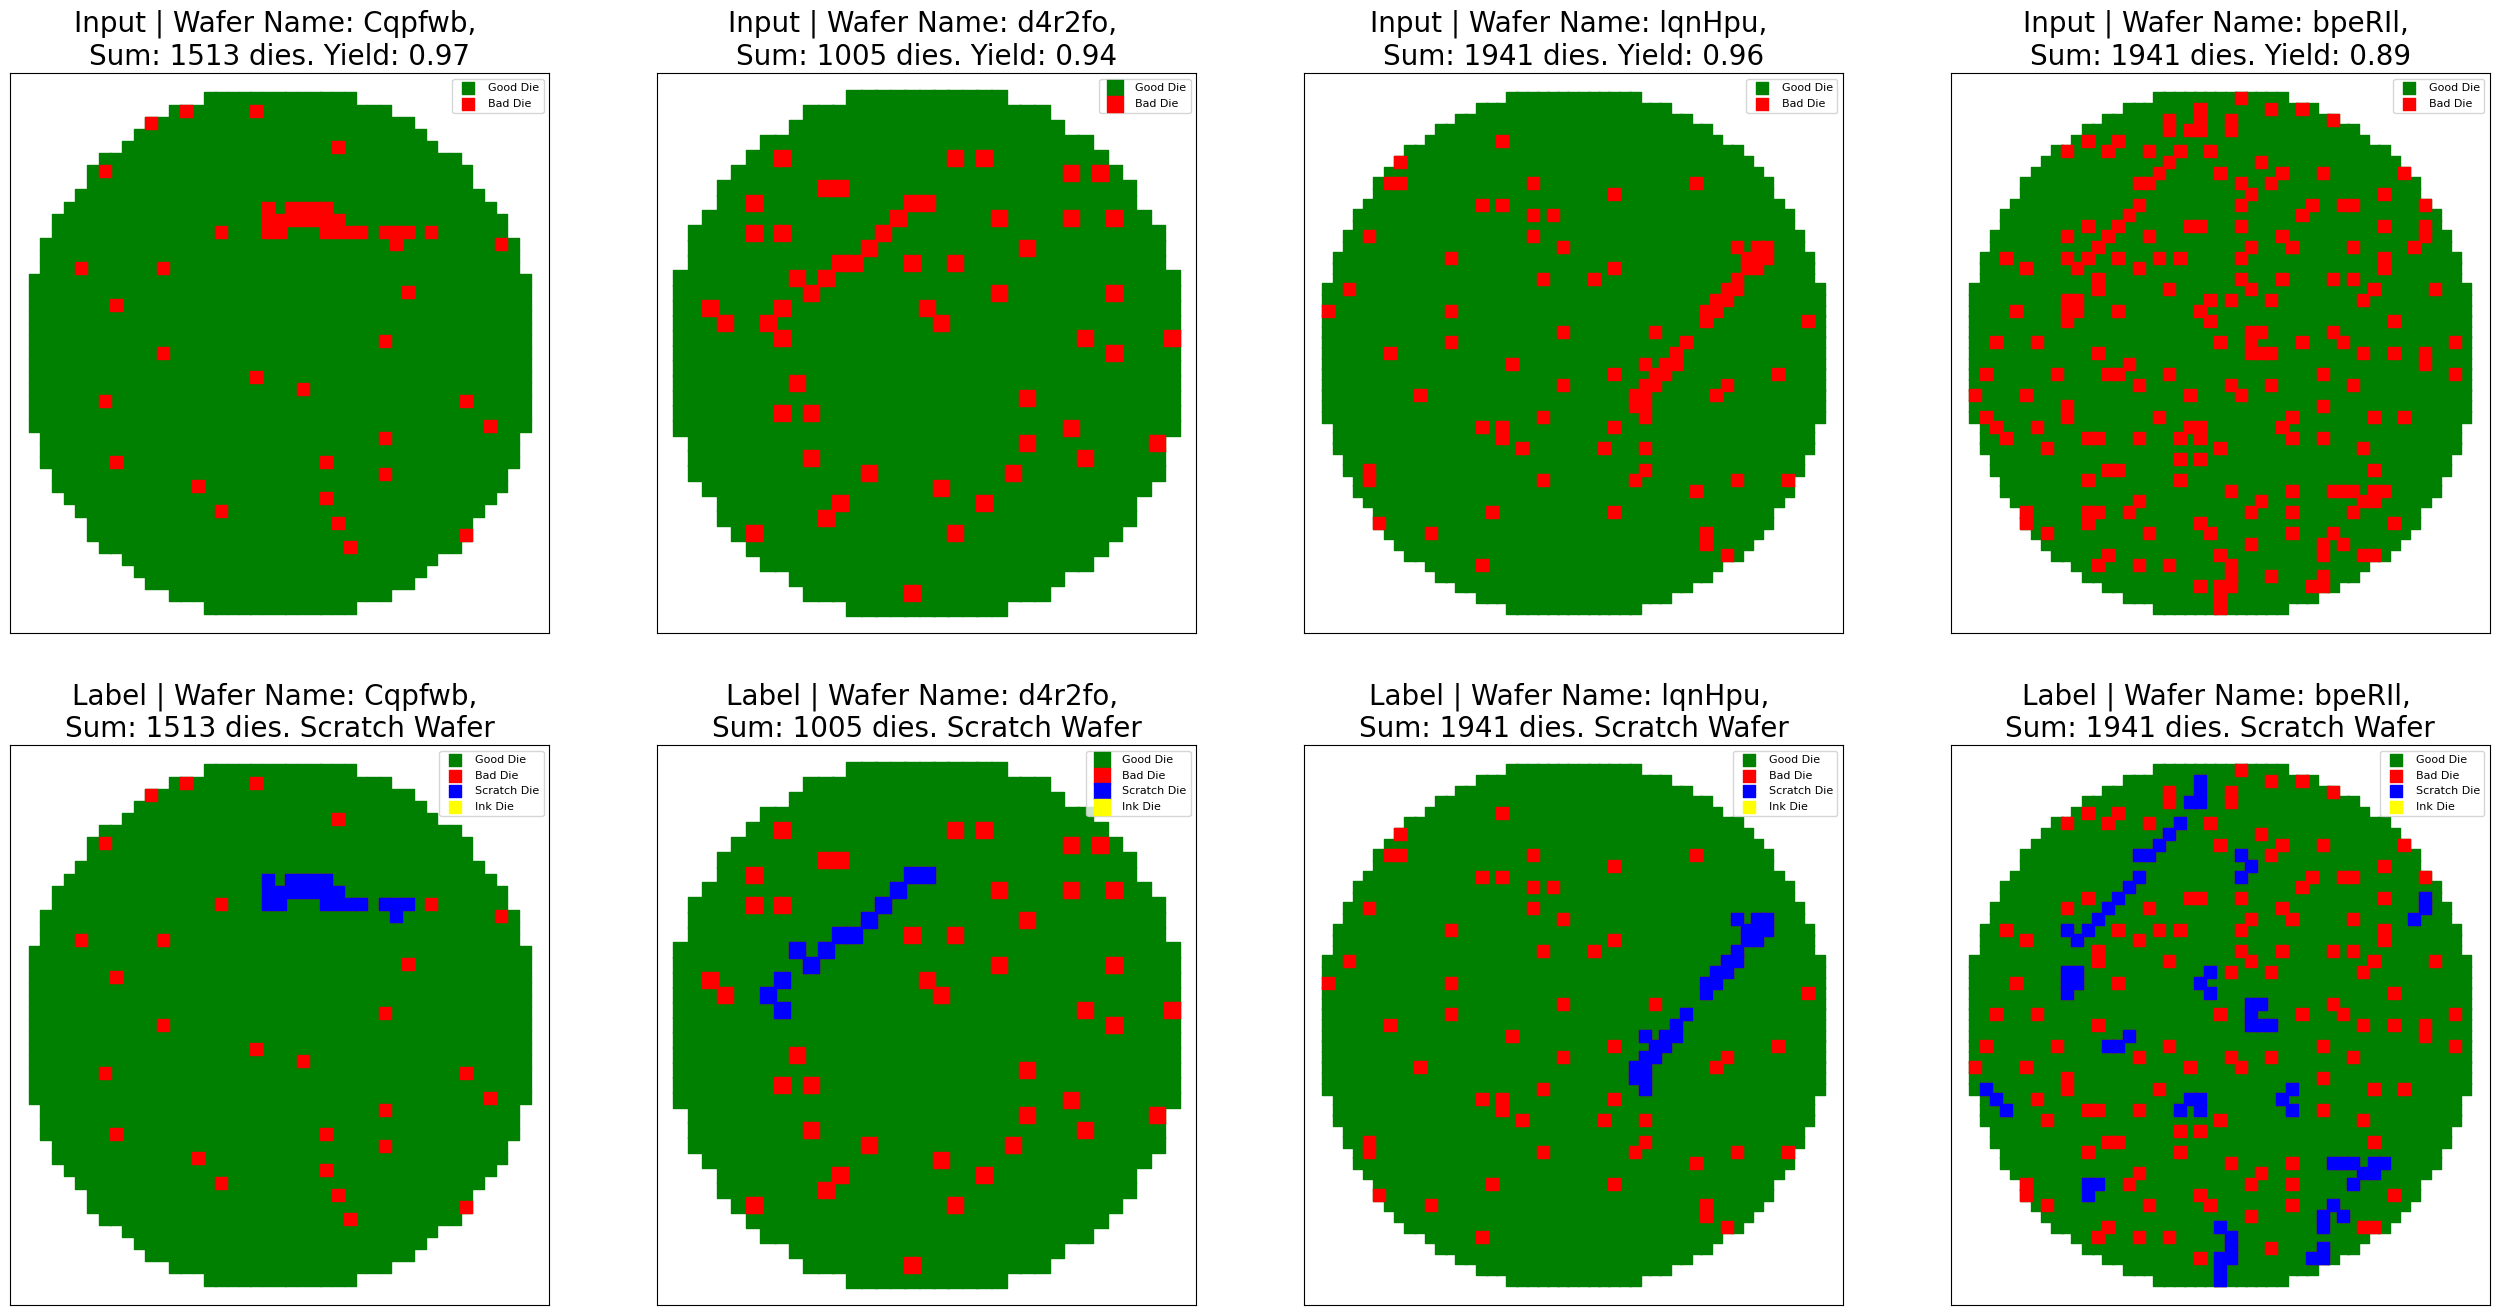

In [273]:
# plot 16 wafers from the test set 
df_wafers_sam = df_wafers_test[df_wafers_test['WaferName'].isin(predicted_level_wafers(df_wafers_test))]
list_sample_test = [df_wafers_sam.groupby('WaferName').get_group(group) for group in df_wafers_sam['WaferName'].value_counts().sample(4).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = True)


In [230]:
# check id 5ISkdX is in the list of scratched wafers
df_wafers_test[df_wafers_test['WaferName'] == '5ISkdX']['IsScratchDie'].value_counts()


IsScratchDie
False    2786
True      211
Name: count, dtype: int64

In [276]:
# what is the distribution of the amount of total dies in each wafer 
df_wafers.groupby('WaferName').size().value_counts()



1941    600
1005    600
2449    600
2997    600
4049    600
1513    600
3405    600
Name: count, dtype: int64

# NOTES TO MYSELF
- there are 6 types of wafers! add feaures that refelect this! 
- cinnecting between connected compunnets using bfs/a* 
- add explantions for each parts and the results 


In [10]:
#TODO build your solution

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [11]:
#TODO add your thoughts

# Submission

In [ ]:
#TODO

#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'FirstName LastName'
email = 'my_email@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)